# IBM HR Attrition

Attrition: When an employee leaves the company due to resignation or retirement, then it is called Attrition. Employees leave the company for personal and professional reasons like retirement, lower growth potential, lower work satisfaction, lower pay rate, bad work environment, etc. Attrition is part and parcel of any business. Attrition is a cause of concern when it crosses a limit.

The attrition rate, also known as churn rate, can be defined as the rate at which employees leave an organization from a specific group over a particular period of time.

The dataset for the analysis is taken from Kaggle. To get insights about what factors contribute to employee attrition, we use Python and libraries like pandas, matplotlib, and seaborn. In this blog, we mostly talk about absolute and percentage values.

In [1]:
#importing packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#calling data
HR_data=pd.read_excel('HR dataset-team 7.xlsx')
HR_data.head()

Age              Attrition BusinessTravel  DailyRate Department  \
0  41.0  Voluntary Resignation  Travel_Rarely     1102.0      Sales   
1  41.0  Voluntary Resignation  Travel_Rarely     1102.0      Sales   
2  41.0  Voluntary Resignation  Travel_Rarely     1102.0      Sales   
3  41.0  Voluntary Resignation  Travel_Rarely     1102.0      Sales   
4  41.0  Voluntary Resignation  Travel_Rarely     1102.0      Sales   

   DistanceFromHome  Education EducationField  EmployeeCount EmployeeNumber  \
0               1.0        2.0  Life Sciences            1.0              1   
1               1.0        2.0  Life Sciences            1.0              1   
2               1.0        2.0  Life Sciences            1.0              7   
3               1.0        2.0  Life Sciences            1.0              8   
4               1.0        2.0  Life Sciences            1.0              9   

   ... StandardHours  StockOptionLevel TotalWorkingYears  \
0  ...          80.0               0.0               8.0   
1  ...          80.0               0.0               8.0   
2  ...          80.0               0.0               8.0   
3  ...          80.0               0.0               8.0   
4  ...          80.0               0.0               8.0   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                    0.0              1.0             6.0                4.0   
1                    0.0              1.0             6.0                4.0   
2                    0.0              1.0             6.0                4.0   
3                    0.0              1.0             6.0                4.0   
4                    0.0              1.0             6.0                4.0   

   YearsSinceLastPromotion YearsWithCurrManager  Employee Source  
0                      0.0                  5.0         Referral  
1                      0.0                  5.0         Referral  
2                      0.0                  5.0         Referral  
3                      0.0                  5.0         Referral  
4                      0.0                  5.0         Referral  

[5 rows x 37 columns]

In [3]:
#basic informations
HR_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23436 entries, 0 to 23435
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23433 non-null  float64
 1   Attrition                 23423 non-null  object 
 2   BusinessTravel            23428 non-null  object 
 3   DailyRate                 23425 non-null  float64
 4   Department                23425 non-null  object 
 5   DistanceFromHome          23427 non-null  float64
 6   Education                 23424 non-null  float64
 7   EducationField            23427 non-null  object 
 8   EmployeeCount             23431 non-null  float64
 9   EmployeeNumber            23436 non-null  object 
 10  Application ID            23433 non-null  object 
 11  EnvironmentSatisfaction   23427 non-null  float64
 12  Gender                    23426 non-null  object 
 13  HourlyRate                23427 non-null  float64
 14  JobInv

In [4]:
#data types
HR_data.dtypes

Age                         float64
Attrition                    object
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome            float64
Education                   float64
EducationField               object
EmployeeCount               float64
EmployeeNumber               object
Application ID               object
EnvironmentSatisfaction     float64
Gender                       object
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobRole                      object
JobSatisfaction             float64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                       object
OverTime                     object
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               

The data types are float and object.

In [5]:
#shape
HR_data.shape

(23436, 37)

There are 23436 rows and 37 columns

In [6]:
#features & target
HR_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'Application ID', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Employee Source'],
      dtype='object')

In all we have 36 features consisting of both the categorical as well as the numerical features. The target variable is the 'Attrition' of the employee which can be either a Voluntary resignation or Currently working.

In [7]:
#numerical columns
num_cols=[features for features in HR_data.columns if HR_data[features].dtypes !='O']
num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [8]:
#categorical columns
cat_cols=HR_data.select_dtypes(include='object')
cat_cols.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'EmployeeNumber', 'Application ID', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime', 'Employee Source'],
      dtype='object')

There are 25 numerical columns and 12 categorical columns.

In [9]:
#checking unique values
HR_data.nunique()

Age                            43
Attrition                       2
BusinessTravel                  3
DailyRate                     883
Department                      3
DistanceFromHome               29
Education                       5
EducationField                  7
EmployeeCount                   1
EmployeeNumber              23368
Application ID              23419
EnvironmentSatisfaction         4
Gender                          2
HourlyRate                     71
JobInvolvement                  4
JobLevel                        5
JobRole                         9
JobSatisfaction                 4
MaritalStatus                   3
MonthlyIncome                1349
MonthlyRate                  1427
NumCompaniesWorked             10
Over18                          1
OverTime                        2
PercentSalaryHike              15
PerformanceRating               2
RelationshipSatisfaction        4
StandardHours                   1
StockOptionLevel                4
TotalWorkingYe

Dropping two columns.

In [10]:
HR_data=HR_data.drop(['EmployeeNumber'],axis=1)

In [11]:
HR_data=HR_data.drop(['Application ID'],axis=1)

In [12]:
HR_data.head()

Age              Attrition BusinessTravel  DailyRate Department  \
0  41.0  Voluntary Resignation  Travel_Rarely     1102.0      Sales   
1  41.0  Voluntary Resignation  Travel_Rarely     1102.0      Sales   
2  41.0  Voluntary Resignation  Travel_Rarely     1102.0      Sales   
3  41.0  Voluntary Resignation  Travel_Rarely     1102.0      Sales   
4  41.0  Voluntary Resignation  Travel_Rarely     1102.0      Sales   

   DistanceFromHome  Education EducationField  EmployeeCount  \
0               1.0        2.0  Life Sciences            1.0   
1               1.0        2.0  Life Sciences            1.0   
2               1.0        2.0  Life Sciences            1.0   
3               1.0        2.0  Life Sciences            1.0   
4               1.0        2.0  Life Sciences            1.0   

   EnvironmentSatisfaction  ... StandardHours  StockOptionLevel  \
0                      2.0  ...          80.0               0.0   
1                      2.0  ...          80.0               0.0   
2                      2.0  ...          80.0               0.0   
3                      2.0  ...          80.0               0.0   
4                      2.0  ...          80.0               0.0   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                8.0                    0.0             1.0             6.0   
1                8.0                    0.0             1.0             6.0   
2                8.0                    0.0             1.0             6.0   
3                8.0                    0.0             1.0             6.0   
4                8.0                    0.0             1.0             6.0   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                4.0                      0.0                   5.0   
1                4.0                      0.0                   5.0   
2                4.0                      0.0                   5.0   
3                4.0                      0.0                   5.0   
4                4.0                      0.0                   5.0   

   Employee Source  
0         Referral  
1         Referral  
2         Referral  
3         Referral  
4         Referral  

[5 rows x 35 columns]

In [13]:
#descriptive statistics
HR_data.describe().T

count          mean          std     min     25%  \
Age                       23433.0     36.936671     9.137432    18.0    30.0   
DailyRate                 23425.0    801.849861   403.210487   102.0   465.0   
DistanceFromHome          23427.0      9.165322     8.095706     1.0     2.0   
Education                 23424.0      2.909921     1.024732     1.0     2.0   
EmployeeCount             23431.0      1.000000     0.000000     1.0     1.0   
EnvironmentSatisfaction   23427.0      2.718615     1.095599     1.0     2.0   
HourlyRate                23427.0     65.864131    20.353313    30.0    48.0   
JobInvolvement            23427.0      2.729756     0.710272     1.0     2.0   
JobLevel                  23429.0      2.064151     1.105626     1.0     1.0   
JobSatisfaction           23427.0      2.727323     1.101293     1.0     2.0   
MonthlyIncome             23423.0   6505.955770  4705.177681  1009.0  2911.0   
MonthlyRate               23425.0  14304.015112  7103.051499  2094.0  8053.0   
NumCompaniesWorked        23427.0      2.684509     2.496743     0.0     1.0   
PercentSalaryHike         23422.0     15.210358     3.658239    11.0    12.0   
PerformanceRating         23426.0      3.155084     0.361993     3.0     3.0   
RelationshipSatisfaction  23428.0      2.713377     1.080061     1.0     2.0   
StandardHours             23426.0     80.000000     0.000000    80.0    80.0   
StockOptionLevel          23427.0      0.793017     0.851105     0.0     0.0   
TotalWorkingYears         23428.0     11.261439     7.772954     0.0     6.0   
TrainingTimesLastYear     23425.0      2.798164     1.290328     0.0     2.0   
WorkLifeBalance           23426.0      2.761846     0.705772     1.0     2.0   
YearsAtCompany            23423.0      7.011783     6.139078     0.0     3.0   
YearsInCurrentRole        23421.0      4.227189     3.626382     0.0     2.0   
YearsSinceLastPromotion   23425.0      2.183436     3.217662     0.0     0.0   
YearsWithCurrManager      23429.0      4.127790     3.572772     0.0     2.0   

                              50%      75%      max  
Age                          36.0     43.0     60.0  
DailyRate                   802.0   1157.0   1499.0  
DistanceFromHome              7.0     14.0     29.0  
Education                     3.0      4.0      5.0  
EmployeeCount                 1.0      1.0      1.0  
EnvironmentSatisfaction       3.0      4.0      4.0  
HourlyRate                   66.0     83.0    100.0  
JobInvolvement                3.0      3.0      4.0  
JobLevel                      2.0      3.0      5.0  
JobSatisfaction               3.0      4.0      4.0  
MonthlyIncome              4936.0   8380.0  19999.0  
MonthlyRate               14218.0  20460.0  26999.0  
NumCompaniesWorked            2.0      4.0      9.0  
PercentSalaryHike            14.0     18.0     25.0  
PerformanceRating             3.0      3.0      4.0  
RelationshipSatisfaction      3.0      4.0      4.0  
StandardHours                80.0     80.0     80.0  
StockOptionLevel              1.0      1.0      3.0  
TotalWorkingYears            10.0     15.0     40.0  
TrainingTimesLastYear         3.0      3.0      6.0  
WorkLifeBalance               3.0      3.0      4.0  
YearsAtCompany                5.0     10.0     40.0  
YearsInCurrentRole            3.0      7.0     18.0  
YearsSinceLastPromotion       1.0      3.0     15.0  
YearsWithCurrManager          3.0      7.0     17.0

In [14]:
#null values
HR_data.isna().sum()

Age                          3
Attrition                   13
BusinessTravel               8
DailyRate                   11
Department                  11
DistanceFromHome             9
Education                   12
EducationField               9
EmployeeCount                5
EnvironmentSatisfaction      9
Gender                      10
HourlyRate                   9
JobInvolvement               9
JobLevel                     7
JobRole                      9
JobSatisfaction              9
MaritalStatus               11
MonthlyIncome               13
MonthlyRate                 11
NumCompaniesWorked           9
Over18                      10
OverTime                    12
PercentSalaryHike           14
PerformanceRating           10
RelationshipSatisfaction     8
StandardHours               10
StockOptionLevel             9
TotalWorkingYears            8
TrainingTimesLastYear       11
WorkLifeBalance             10
YearsAtCompany              13
YearsInCurrentRole          15
YearsSin

In [15]:
#null value percentage
Nullvalue_percentage=(HR_data.isna().sum()/len(HR_data))*100
Nullvalue_percentage

Age                         0.012801
Attrition                   0.055470
BusinessTravel              0.034136
DailyRate                   0.046936
Department                  0.046936
DistanceFromHome            0.038402
Education                   0.051203
EducationField              0.038402
EmployeeCount               0.021335
EnvironmentSatisfaction     0.038402
Gender                      0.042669
HourlyRate                  0.038402
JobInvolvement              0.038402
JobLevel                    0.029869
JobRole                     0.038402
JobSatisfaction             0.038402
MaritalStatus               0.046936
MonthlyIncome               0.055470
MonthlyRate                 0.046936
NumCompaniesWorked          0.038402
Over18                      0.042669
OverTime                    0.051203
PercentSalaryHike           0.059737
PerformanceRating           0.042669
RelationshipSatisfaction    0.034136
StandardHours               0.042669
StockOptionLevel            0.038402
T

In [16]:
Total_nullvalue_percentage=Nullvalue_percentage.sum()
Total_nullvalue_percentage

1.4806280935313196

The total percentage of null values present in the dataset is 1.5%.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>],
       [<AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>],
       [<AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'PerformanceRating'}>],
       [<AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'center':'StandardHours'}>,
        <AxesSubplot:title={'cent

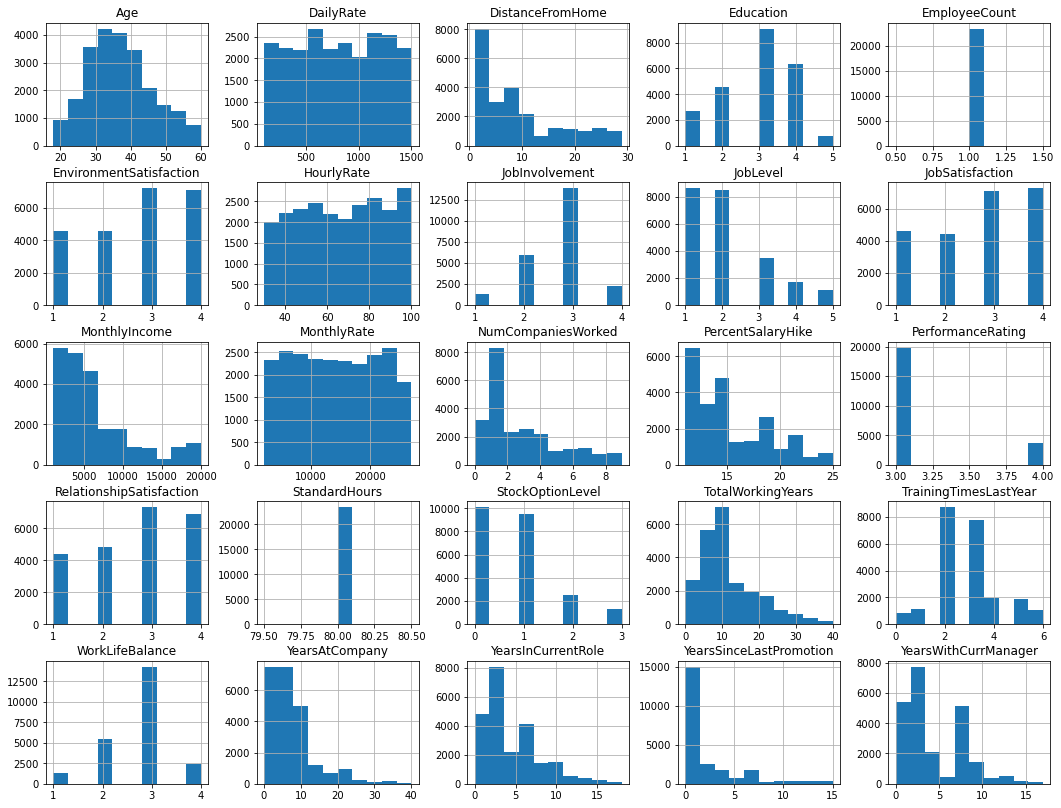

In [17]:
#histogram for numerical features
HR_data.hist(figsize=(18, 14))

# Inference from histogram
1)The age graph is almost normally distibuted.The minimum & maximum age of workforce is 18 & 60.Most of the employees are in between the age group 30-40.
2)The daily rate is between 100 and 1500.
3)Majority of the employees living space distance from company is less than 10km.
4)Most of the employees education level is 3.
5)The higest rating for the environment satisfaction is 3 & 4.
6)The hourly rate is between 20-100.
7)The higest rating for job involvement is 3.
8)Majority of the employees joblevel is 1 & 2.
9)3 & 4 has the higest rating for job satisfaction.
10)Monthly salary is between 1000-20000.
11)Major number of employees worked for more than one company before joining IBM.
12)Many of them have salary hike percentage less than 15%.
13)3 is the highest performance rating of employees.
14)Most of the employees relationship satisfaction rating is 3 & 4.
15)The satandared working hours of employees is 80hr.
16)Only few employees have taken stock option plan.
17)Most of the employees working years is 20 and below.
18)Many employees got 2 time training for last year.
19)3 is the higest rating for work life balance.
20)Many of the employees are working for IBM for less than 13 years.
21)Emloyees are working in the current role for less than 10 years.
22)Majority of them got promotions & working with the current manager.

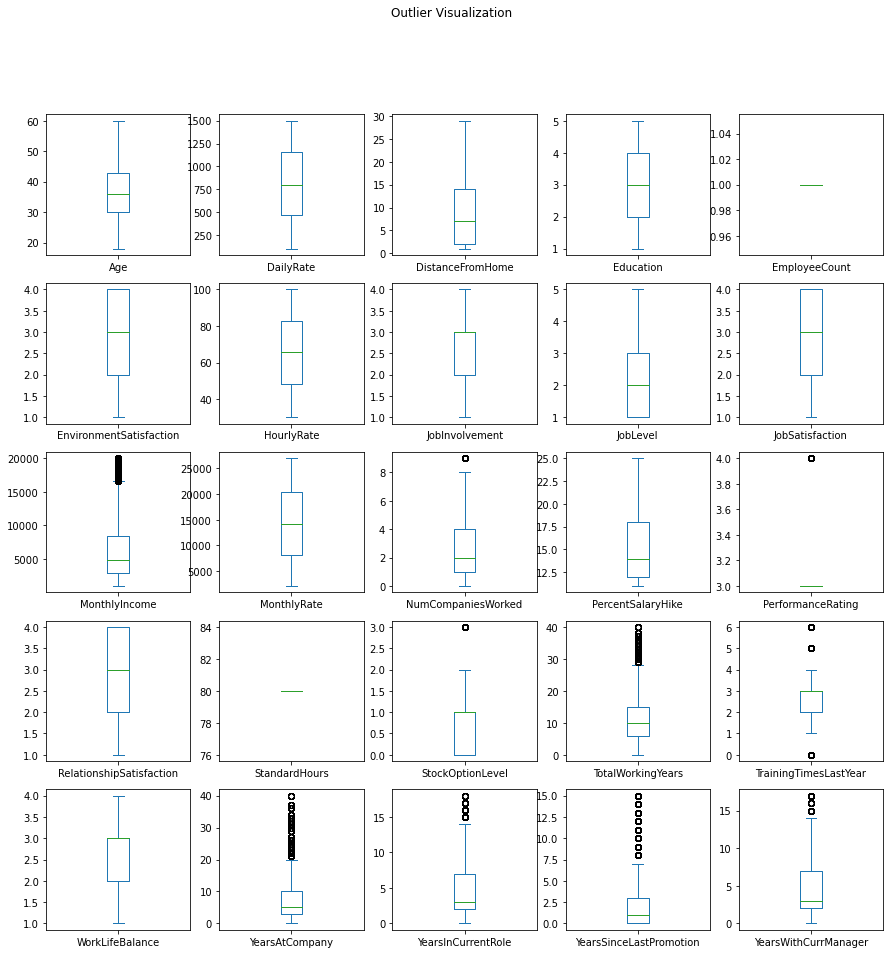

In [18]:
#outlier visualization 
HR_data.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,15),title='Outlier Visualization')
plt.show()

Some columns in the dataset contain outliers.It will be handelled during data pre-processing.

# 1) Exploratory Data Visualization

# 1.1) Univariate Visualization

# a)Target Column

<AxesSubplot:xlabel='Attrition', ylabel='count'>

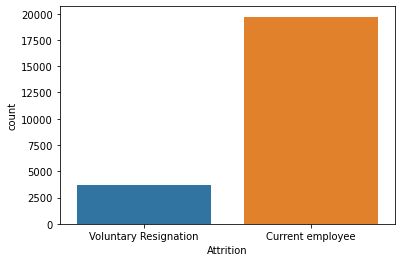

In [19]:
#count plot of target.
sns.countplot(x='Attrition', data=HR_data)

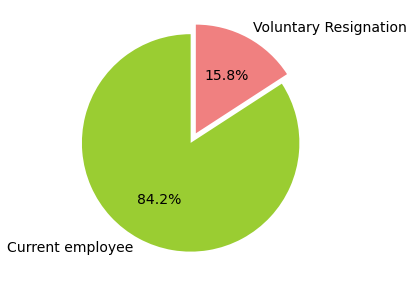

In [20]:
#pie chart
plt.rcParams['figure.figsize'] =5,5
labels = HR_data['Attrition'].value_counts().index.tolist()
sizes = HR_data['Attrition'].value_counts().tolist()
explode = (0, 0.1)
colors = ['yellowgreen', 'lightcoral']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

# Inference
The figure showing is the figure of employee attrition. In this dataset, 3709 employees left the company while 19714 stay(ie only 15.8% of the employees left, rest are still working in IBM).The data is very imbalanced.

# *I) Visualization for Numerical Features

# b)Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

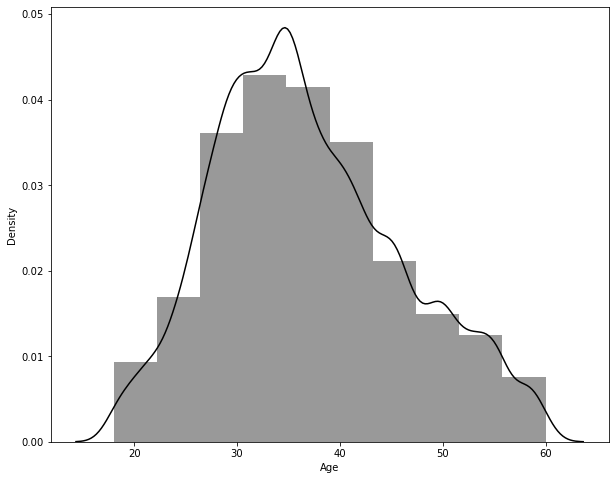

In [21]:
#distplot of Age column
plt.figure(figsize=[10,8])
sns.distplot(HR_data['Age'],hist=True,kde=True,color='k',bins=10)

# Inference
The graph is normally distributed.
The minimum age of workforce is 18.
The maximum age of workforce is 60.
Majority of the employees lie between the age range 30-40.

# * distplot of all numerical features

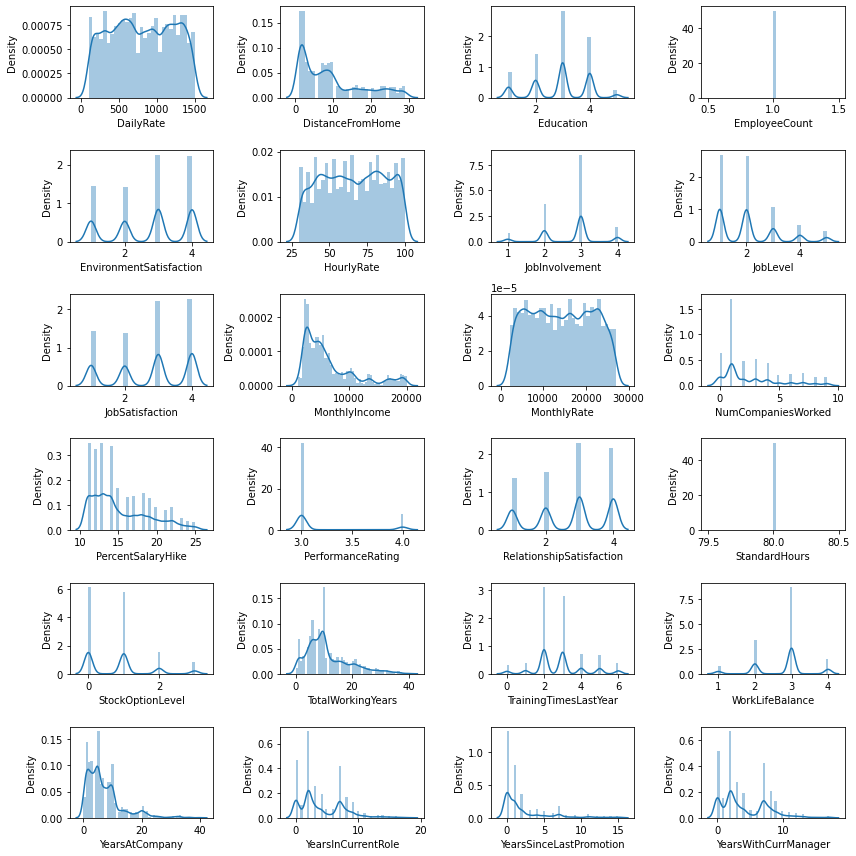

In [22]:
fig,ax = plt.subplots(6,4, figsize=(12,12))                
sns.distplot(HR_data['DailyRate'], ax = ax[0,0]) 
sns.distplot(HR_data['DistanceFromHome'], ax = ax[0,1]) 
sns.distplot(HR_data['Education'], ax = ax[0,2]) 
sns.distplot(HR_data['EmployeeCount'], ax = ax[0,3]) 
sns.distplot(HR_data['EnvironmentSatisfaction'], ax = ax[1,0]) 
sns.distplot(HR_data['HourlyRate'], ax = ax[1,1]) 
sns.distplot(HR_data['JobInvolvement'], ax = ax[1,2]) 
sns.distplot(HR_data['JobLevel'], ax = ax[1,3]) 
sns.distplot(HR_data['JobSatisfaction'], ax = ax[2,0]) 
sns.distplot(HR_data['MonthlyIncome'], ax = ax[2,1])
sns.distplot(HR_data['MonthlyRate'], ax = ax[2,2])
sns.distplot(HR_data['NumCompaniesWorked'], ax = ax[2,3])
sns.distplot(HR_data['PercentSalaryHike'], ax = ax[3,0])
sns.distplot(HR_data['PerformanceRating'], ax = ax[3,1])
sns.distplot(HR_data['RelationshipSatisfaction'], ax = ax[3,2])
sns.distplot(HR_data['StandardHours'], ax = ax[3,3])
sns.distplot(HR_data['StockOptionLevel'], ax = ax[4,0])
sns.distplot(HR_data['TotalWorkingYears'], ax = ax[4,1])
sns.distplot(HR_data['TrainingTimesLastYear'], ax = ax[4,2])
sns.distplot(HR_data['WorkLifeBalance'], ax = ax[4,3])
sns.distplot(HR_data['YearsAtCompany'], ax = ax[5,0])
sns.distplot(HR_data['YearsInCurrentRole'], ax = ax[5,1])
sns.distplot(HR_data['YearsSinceLastPromotion'], ax = ax[5,2])
sns.distplot(HR_data['YearsWithCurrManager'], ax = ax[5,3])
plt.tight_layout()
plt.show()

# Inference
Using distplot we find out the distribution of all numerical features.Here we can see that EmployeeCount and StandardHours does not have much influence.

# b) Distance from home

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

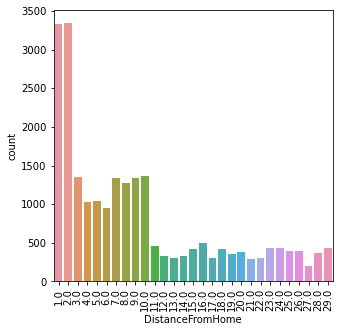

In [23]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['DistanceFromHome'])

In [24]:
print('Distance count')
print(HR_data.DistanceFromHome.value_counts())
print('Distance in percentage')
print(HR_data.DistanceFromHome.value_counts()*100/len(HR_data))

Distance count
2.0     3351
1.0     3335
10.0    1371
3.0     1358
9.0     1337
7.0     1336
8.0     1277
5.0     1036
4.0     1025
6.0      949
16.0     503
11.0     464
24.0     432
29.0     430
23.0     430
18.0     421
15.0     419
26.0     400
25.0     398
20.0     378
28.0     364
19.0     352
14.0     335
12.0     331
22.0     306
13.0     304
17.0     302
21.0     289
27.0     194
Name: DistanceFromHome, dtype: int64
Distance in percentage
2.0     14.298515
1.0     14.230244
10.0     5.849974
3.0      5.794504
9.0      5.704898
7.0      5.700632
8.0      5.448882
5.0      4.420550
4.0      4.373613
6.0      4.049326
16.0     2.146271
11.0     1.979860
24.0     1.843318
29.0     1.834784
23.0     1.834784
18.0     1.796382
15.0     1.787848
26.0     1.706776
25.0     1.698242
20.0     1.612903
28.0     1.553166
19.0     1.501963
14.0     1.429425
12.0     1.412357
22.0     1.305684
13.0     1.297150
17.0     1.288616
21.0     1.233146
27.0     0.827786
Name: DistanceFromHome, dt

# Inference
From this graph we can see that 28% employees live near to the company,ie within 1 or 2km.

# c)Education

<AxesSubplot:xlabel='Education', ylabel='count'>

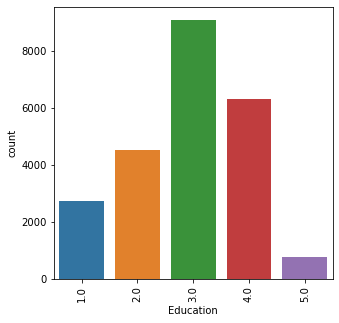

In [25]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['Education'])

In [26]:
print('Education count')
print(HR_data.Education.value_counts())
print('Education in percentage')
print(HR_data.Education.value_counts()*100/len(HR_data))

Education count
3.0    9099
4.0    6321
2.0    4517
1.0    2722
5.0     765
Name: Education, dtype: int64
Education in percentage
3.0    38.824885
4.0    26.971326
2.0    19.273767
1.0    11.614610
5.0     3.264209
Name: Education, dtype: float64


# Inference
This feature have five levels.They are:
1:'Below College',2:'College',3:'Bachelor',4:'Master',5:'Doctor'.
Around 39% of employees have Bachelors level of education.

# d) Environment satisfaction

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

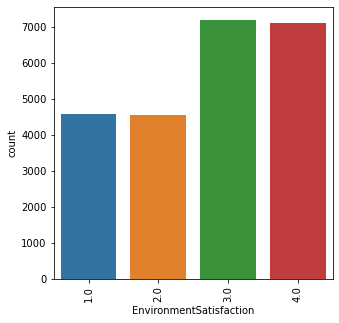

In [27]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['EnvironmentSatisfaction'])

In [28]:
print('Environment satisfaction count')
print(HR_data.EnvironmentSatisfaction.value_counts())
print('Environment satisfaction in percentage')
print(HR_data.EnvironmentSatisfaction.value_counts()*100/len(HR_data))

Environment satisfaction count
3.0    7196
4.0    7110
1.0    4581
2.0    4540
Name: EnvironmentSatisfaction, dtype: int64
Environment satisfaction in percentage
3.0    30.704898
4.0    30.337942
1.0    19.546851
2.0    19.371906
Name: EnvironmentSatisfaction, dtype: float64


# Inference
It is the satisfaction of the employee with the working environment.This has four levels:
    1:'Low',2:'Medium',3:'High',4:'Very High'.
60% employees vote for level 3 & 4 ie they are satisfied with the working environment.Rest of them vote for level 1 & 2.                    

# e)Hourly rate

<AxesSubplot:xlabel='HourlyRate', ylabel='count'>

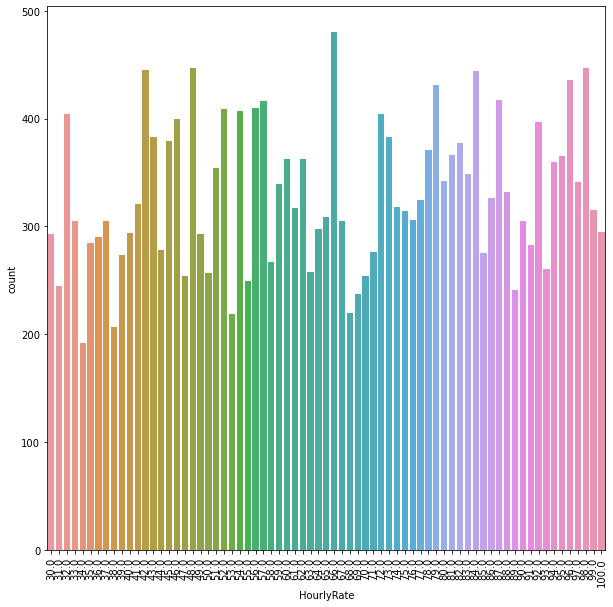

In [29]:
plt.figure(figsize=[10,10])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['HourlyRate'])

Hourly rate is between 20 to 100.

# f)Job involvement

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

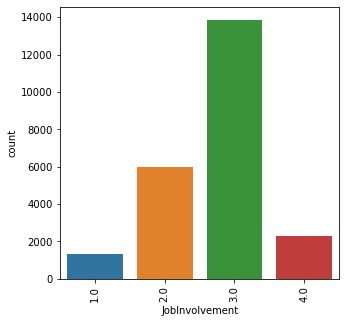

In [30]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['JobInvolvement'])

In [31]:
print('Involvement count')
print(HR_data.JobInvolvement.value_counts())
print('Involvement in percentage')
print(HR_data.JobInvolvement.value_counts()*100/len(HR_data))

Involvement count
3.0    13855
2.0     5973
4.0     2280
1.0     1319
Name: JobInvolvement, dtype: int64
Involvement in percentage
3.0    59.118450
2.0    25.486431
4.0     9.728623
1.0     5.628094
Name: JobInvolvement, dtype: float64


# Inference
It contains four level.They are:
     1:'Low',2:'Medium',3:'High',4:'Very High'.
59% are voting for level 3,ie they are highly involved in their job.                        

# g)Job level

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

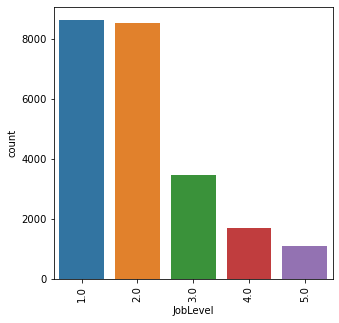

In [32]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['JobLevel'])

In [33]:
print('Job level count')
print(HR_data.JobLevel.value_counts())
print('Job level in percentage')
print(HR_data.JobLevel.value_counts()*100/len(HR_data))

Job level count
1.0    8641
2.0    8526
3.0    3473
4.0    1696
5.0    1093
Name: JobLevel, dtype: int64
Job level in percentage
1.0    36.870626
2.0    36.379928
3.0    14.819082
4.0     7.236730
5.0     4.663765
Name: JobLevel, dtype: float64


# Inference
It's the position of employees in the company.72% of employees are at 1st and 2nd level.

# h) Job satisfaction

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

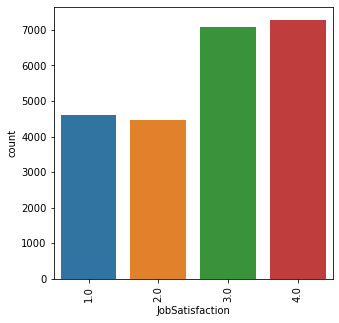

In [34]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['JobSatisfaction'])

In [35]:
print('Job satisfaction count')
print(HR_data.JobSatisfaction.value_counts())
print('Job satisfaction in percentage')
print(HR_data.JobSatisfaction.value_counts()*100/len(HR_data))

Job satisfaction count
4.0    7278
3.0    7088
1.0    4605
2.0    4456
Name: JobSatisfaction, dtype: int64
Job satisfaction in percentage
4.0    31.054788
3.0    30.244069
1.0    19.649258
2.0    19.013484
Name: JobSatisfaction, dtype: float64


# Inference
It is the satisfaction level of employees in their job.There are four level:
    1:'Low',2:'Medium',3:'High',4:'Very High'.
61% of employees are satisfied in their job, ie they are rating 3 & 4.                    

# i)Monthly income

<AxesSubplot:xlabel='MonthlyIncome', ylabel='count'>

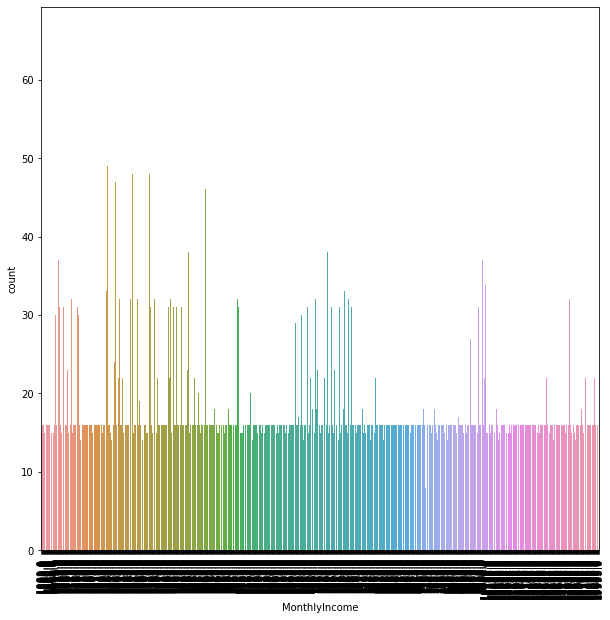

In [36]:
plt.figure(figsize=[10,10])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['MonthlyIncome'])

# j)Number of companies worked

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

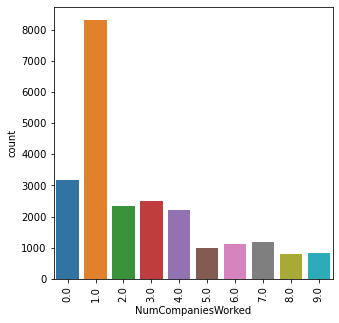

In [37]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['NumCompaniesWorked'])

In [38]:
print('No of companies worked count')
print(HR_data.NumCompaniesWorked.value_counts())
print('No of companies worked in percentage')
print(HR_data.NumCompaniesWorked.value_counts()*100/len(HR_data))

No of companies worked count
1.0    8313
0.0    3176
3.0    2508
2.0    2330
4.0    2208
7.0    1171
6.0    1108
5.0    1002
9.0     818
8.0     793
Name: NumCompaniesWorked, dtype: int64
No of companies worked in percentage
1.0    35.471070
0.0    13.551801
3.0    10.701485
2.0     9.941970
4.0     9.421403
7.0     4.996586
6.0     4.727769
5.0     4.275474
9.0     3.490357
8.0     3.383683
Name: NumCompaniesWorked, dtype: float64


# Inference
The number of companies in which the emloyees worked before they joined IBM.Different employees worked for nine different companies.35% of employees worked for only 1 company before joining IBM.

# k)Percentage salary hike

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

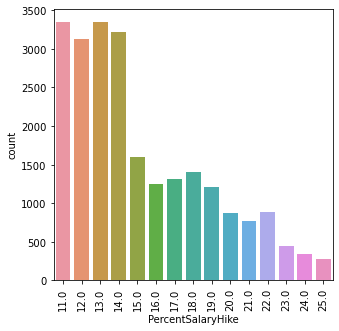

In [39]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['PercentSalaryHike'])

In [40]:
print('Salary hike count')
print(HR_data.PercentSalaryHike.value_counts())
print('Salary hike in percentage')
print(HR_data.PercentSalaryHike.value_counts()*100/len(HR_data))

Salary hike count
11.0    3354
13.0    3346
14.0    3216
12.0    3125
15.0    1596
18.0    1408
17.0    1312
16.0    1247
19.0    1214
22.0     889
20.0     880
21.0     767
23.0     445
24.0     340
25.0     283
Name: PercentSalaryHike, dtype: int64
Salary hike in percentage
11.0    14.311316
13.0    14.277180
14.0    13.722478
12.0    13.334187
15.0     6.810036
18.0     6.007851
17.0     5.598225
16.0     5.320874
19.0     5.180065
22.0     3.793309
20.0     3.754907
21.0     3.272743
23.0     1.898788
24.0     1.450760
25.0     1.207544
Name: PercentSalaryHike, dtype: float64


# Inference
It's the percentage of salary hike.The many employees got upto 14% of salary hike every year.

# l)Performance rating

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

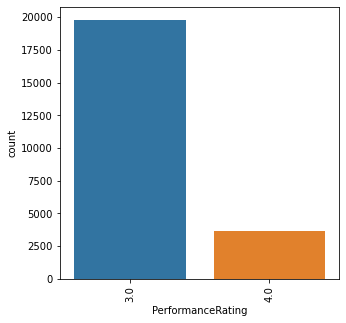

In [41]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['PerformanceRating'])

In [42]:
print('Performance rating count')
print(HR_data.PerformanceRating.value_counts())
print('Performance rating in percentage')
print(HR_data.PerformanceRating.value_counts()*100/len(HR_data))

Performance rating count
3.0    19793
4.0     3633
Name: PerformanceRating, dtype: int64
Performance rating in percentage
3.0    84.455538
4.0    15.501792
Name: PerformanceRating, dtype: float64


# Inference
It's the performance of the employee in the company.
1:'Low',2:'Good',3:'Excellent',4:'Outstanding'.
All the employees have performance rating 3 and 4,ie all are performing their maximum.                

# m)Relationship satisfaction

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

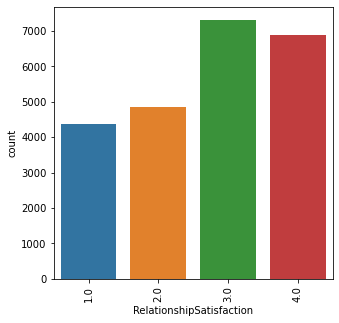

In [43]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['RelationshipSatisfaction'])

In [44]:
print('Relationship satisfaction count')
print(HR_data.RelationshipSatisfaction.value_counts())
print('Relationship satisfaction in percentage')
print(HR_data.RelationshipSatisfaction.value_counts()*100/len(HR_data))

Relationship satisfaction count
3.0    7315
4.0    6889
2.0    4844
1.0    4380
Name: RelationshipSatisfaction, dtype: int64
Relationship satisfaction in percentage
3.0    31.212664
4.0    29.394948
2.0    20.669056
1.0    18.689196
Name: RelationshipSatisfaction, dtype: float64


# Inference
Contain four levels.
1:'Low',2:'Medium',3:'High',4:'Very High'.
60% of them are rating 3 & 4.                

# n)Stock option level

<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

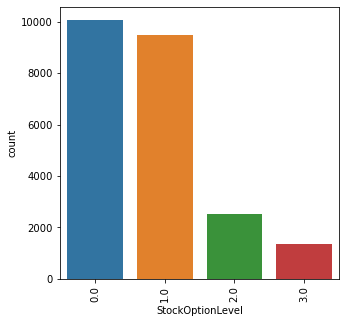

In [45]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['StockOptionLevel'])

In [46]:
print('Stock option level count')
print(HR_data.StockOptionLevel.value_counts())
print('Stock option level in percentage')
print(HR_data.StockOptionLevel.value_counts()*100/len(HR_data))

Stock option level count
0.0    10068
1.0     9483
2.0     2533
3.0     1343
Name: StockOptionLevel, dtype: int64
Stock option level in percentage
0.0    42.959549
1.0    40.463390
2.0    10.808158
3.0     5.730500
Name: StockOptionLevel, dtype: float64


# Inference
Stock option plan is an employee benefit plan isssued by the company to encourage employee ownership in the company.But 43% of the employees doesnt take that plan.

# o)Total working years

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

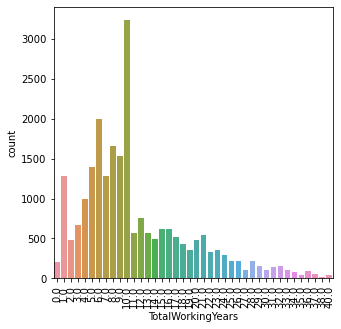

In [47]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['TotalWorkingYears'])

In [48]:
print('Total working years count')
print(HR_data.TotalWorkingYears.value_counts())
print('Total working years in percentage')
print(HR_data.TotalWorkingYears.value_counts()*100/len(HR_data))

Total working years count
10.0    3241
6.0     1992
8.0     1653
9.0     1538
5.0     1396
7.0     1285
1.0     1284
4.0      992
12.0     757
3.0      670
15.0     621
16.0     614
11.0     571
13.0     569
21.0     540
17.0     517
14.0     495
2.0      485
20.0     480
18.0     425
23.0     354
19.0     350
22.0     331
24.0     288
26.0     223
28.0     221
25.0     220
0.0      209
29.0     160
32.0     150
31.0     148
33.0     110
30.0     106
27.0     104
36.0      92
34.0      82
37.0      56
35.0      46
40.0      37
38.0      16
Name: TotalWorkingYears, dtype: int64
Total working years in percentage
10.0    13.829152
6.0      8.499744
8.0      7.053251
9.0      6.562553
5.0      5.956648
7.0      5.483018
1.0      5.478751
4.0      4.232804
12.0     3.230073
3.0      2.858850
15.0     2.649770
16.0     2.619901
11.0     2.436423
13.0     2.427889
21.0     2.304147
17.0     2.206008
14.0     2.112135
2.0      2.069466
20.0     2.048131
18.0     1.813449
23.0     1.510497
19.0

# Inference
13% of the employees have work experience of 10 years.

# p)Training times last year

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

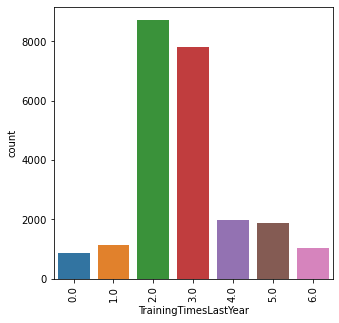

In [49]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['TrainingTimesLastYear'])

In [50]:
print('Training times last year count')
print(HR_data.TrainingTimesLastYear.value_counts())
print('Training times last year in percentage')
print(HR_data.TrainingTimesLastYear.value_counts()*100/len(HR_data))

Training times last year count
2.0    8726
3.0    7807
4.0    1970
5.0    1882
1.0    1126
6.0    1043
0.0     871
Name: TrainingTimesLastYear, dtype: int64
Training times last year in percentage
2.0    37.233316
3.0    33.311999
4.0     8.405871
5.0     8.030381
1.0     4.804574
6.0     4.450418
0.0     3.716505
Name: TrainingTimesLastYear, dtype: float64


# Inference
How much time does the employee got training for last year.
70% of them got training for 2 to 3 times.

# q)Work life balance

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

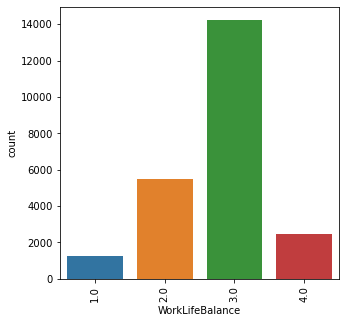

In [51]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['WorkLifeBalance'])

In [52]:
print('Work life balance count')
print(HR_data.WorkLifeBalance.value_counts())
print('Work life balance in percentage')
print(HR_data.WorkLifeBalance.value_counts()*100/len(HR_data))

Work life balance count
3.0    14239
2.0     5478
4.0     2439
1.0     1270
Name: WorkLifeBalance, dtype: int64
Work life balance in percentage
3.0    60.756955
2.0    23.374296
4.0    10.407066
1.0     5.419013
Name: WorkLifeBalance, dtype: float64


# Inference 
It's the rating given by employees that how their work and personal life is balanced.
It has four level;1:'Low',2:'Good',3:'Better',4:'Best'.
60% of them are rating as 3.               

# r)Years at company

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

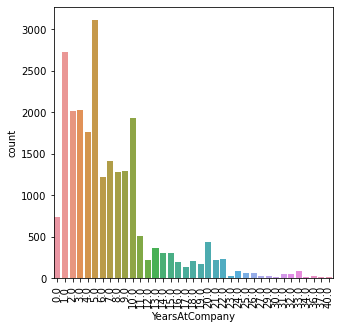

In [53]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['YearsAtCompany'])

In [54]:
print('Years at company count')
print(HR_data.YearsAtCompany.value_counts())
print('Years at company in percentage')
print(HR_data.YearsAtCompany.value_counts()*100/len(HR_data))

Years at company count
5.0     3113
1.0     2718
3.0     2028
2.0     2008
10.0    1928
4.0     1755
7.0     1413
9.0     1295
8.0     1275
6.0     1219
0.0      740
11.0     514
20.0     437
13.0     371
15.0     311
14.0     304
22.0     239
12.0     221
21.0     220
18.0     204
16.0     198
19.0     176
17.0     143
24.0      95
33.0      85
26.0      64
25.0      64
32.0      48
31.0      48
23.0      32
27.0      32
36.0      32
29.0      30
34.0      16
30.0      16
37.0      16
40.0      15
Name: YearsAtCompany, dtype: int64
Years at company in percentage
5.0     13.282983
1.0     11.597542
3.0      8.653354
2.0      8.568015
10.0     8.226660
4.0      7.488479
7.0      6.029186
9.0      5.525687
8.0      5.440348
6.0      5.201400
0.0      3.157535
11.0     2.193207
20.0     1.864653
13.0     1.583035
15.0     1.327018
14.0     1.297150
22.0     1.019799
12.0     0.942994
21.0     0.938727
18.0     0.870456
16.0     0.844854
19.0     0.750981
17.0     0.610172
24.0     0.40535

# Inference
How many years in which the employee is working for IBM.
13% of the employees are working for 5 years.

# s)Years in current role

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='count'>

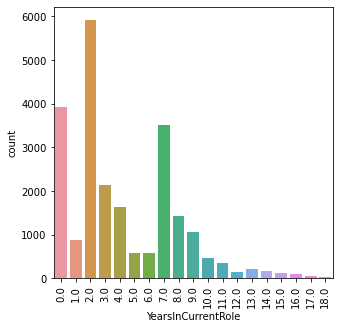

In [55]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['YearsInCurrentRole'])

In [56]:
print('Years in current in role count')
print(HR_data.YearsInCurrentRole.value_counts())
print('Years in current role in percentage')
print(HR_data.YearsInCurrentRole.value_counts()*100/len(HR_data))

Years in current in role count
2.0     5928
0.0     3925
7.0     3516
3.0     2141
4.0     1636
8.0     1426
9.0     1074
1.0      887
5.0      593
6.0      591
10.0     459
11.0     359
13.0     221
14.0     176
12.0     149
15.0     134
16.0     110
17.0      64
18.0      32
Name: YearsInCurrentRole, dtype: int64
Years in current role in percentage
2.0     25.294419
0.0     16.747739
7.0     15.002560
3.0      9.135518
4.0      6.980713
8.0      6.084656
9.0      4.582693
1.0      3.784776
5.0      2.530295
6.0      2.521761
10.0     1.958525
11.0     1.531831
13.0     0.942994
14.0     0.750981
12.0     0.635774
15.0     0.571770
16.0     0.469363
17.0     0.273084
18.0     0.136542
Name: YearsInCurrentRole, dtype: float64


# Inference
25% of employees are working in the same role  for 2 years.

# s)Years since last promotion

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

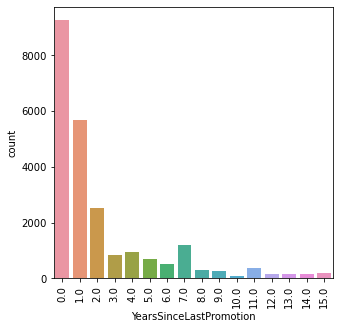

In [57]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['YearsSinceLastPromotion'])

In [58]:
print('Years since last promotion count')
print(HR_data.YearsSinceLastPromotion.value_counts())
print('Years since last promotion in percentage')
print(HR_data.YearsSinceLastPromotion.value_counts()*100/len(HR_data))

Years since last promotion count
0.0     9271
1.0     5685
2.0     2533
7.0     1215
4.0      960
3.0      843
5.0      713
6.0      508
11.0     378
8.0      284
9.0      271
15.0     206
12.0     160
13.0     158
14.0     144
10.0      96
Name: YearsSinceLastPromotion, dtype: int64
Years since last promotion in percentage
0.0     39.558798
1.0     24.257552
2.0     10.808158
7.0      5.184332
4.0      4.096262
3.0      3.597030
5.0      3.042328
6.0      2.167605
11.0     1.612903
8.0      1.211811
9.0      1.156341
15.0     0.878990
12.0     0.682710
13.0     0.674176
14.0     0.614439
10.0     0.409626
Name: YearsSinceLastPromotion, dtype: float64


# Inference
It's the years passed since their last promotion.
The higest count is for 0 years.

# t)Years with current manager

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

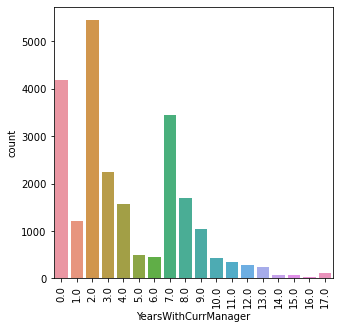

In [59]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['YearsWithCurrManager'])

In [60]:
print('Years with current manager count')
print(HR_data.YearsWithCurrManager.value_counts())
print('Years with current manager in percentage')
print(HR_data.YearsWithCurrManager.value_counts()*100/len(HR_data))

Years with current manager count
2.0     5462
0.0     4197
7.0     3439
3.0     2254
8.0     1696
4.0     1572
1.0     1218
9.0     1035
5.0      496
6.0      457
10.0     435
11.0     350
12.0     277
13.0     238
17.0     112
15.0      80
14.0      79
16.0      32
Name: YearsWithCurrManager, dtype: int64
Years with current manager in percentage
2.0     23.306025
0.0     17.908346
7.0     14.674006
3.0      9.617682
8.0      7.236730
4.0      6.707629
1.0      5.197133
9.0      4.416283
5.0      2.116402
6.0      1.949991
10.0     1.856119
11.0     1.493429
12.0     1.181942
13.0     1.015532
17.0     0.477897
15.0     0.341355
14.0     0.337088
16.0     0.136542
Name: YearsWithCurrManager, dtype: float64


# Inference
23% of the employees are working under the current manager for 2 years.

# *II)Visualization for Categorical Features

# a)Business travel

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

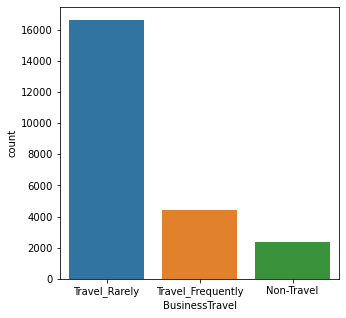

In [61]:
sns.countplot(x='BusinessTravel', data=HR_data)

In [62]:
print('Business travel count')
print(HR_data.BusinessTravel.value_counts())
print('Business travel in percentage')
print(HR_data.BusinessTravel.value_counts()*100/len(HR_data))

Business travel count
Travel_Rarely        16620
Travel_Frequently     4413
Non-Travel            2395
Name: BusinessTravel, dtype: int64
Business travel in percentage
Travel_Rarely        70.916539
Travel_Frequently    18.830005
Non-Travel           10.219321
Name: BusinessTravel, dtype: float64


# Inference
70% of the employees belong to travel rarely group. This indicates that most of them did not have a job which asked them for frequent travelling.

# b)Department

<AxesSubplot:xlabel='Department', ylabel='count'>

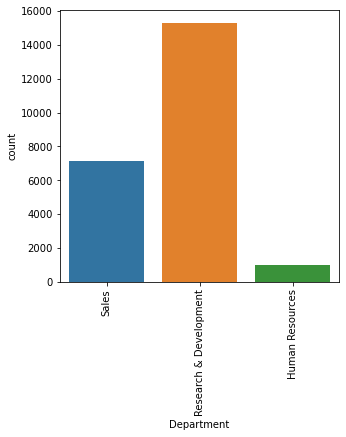

In [63]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['Department'])

In [64]:
print('Department count')
print(HR_data.Department.value_counts())
print('Department in percentage')
print(HR_data.Department.value_counts()*100/len(HR_data))

Department count
Research & Development    15287
Sales                      7119
Human Resources            1019
Name: Department, dtype: int64
Department in percentage
Research & Development    65.228708
Sales                     30.376344
Human Resources            4.348012
Name: Department, dtype: float64


# Inference
65% of employees work under Research & Development department.

# c)Education field

<AxesSubplot:xlabel='EducationField', ylabel='count'>

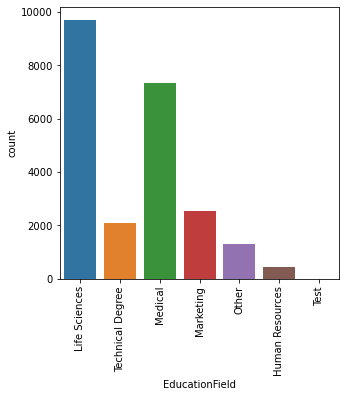

In [65]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['EducationField'])

In [66]:
print('Education field count')
print(HR_data.EducationField.value_counts())
print('Education field in percentage')
print(HR_data.EducationField.value_counts()*100/len(HR_data))

Education field count
Life Sciences       9701
Medical             7337
Marketing           2542
Technical Degree    2089
Other               1311
Human Resources      446
Test                   1
Name: EducationField, dtype: int64
Education field in percentage
Life Sciences       41.393583
Medical             31.306537
Marketing           10.846561
Technical Degree     8.913637
Other                5.593958
Human Resources      1.903055
Test                 0.004267
Name: EducationField, dtype: float64


# Inference
72% of the employees education field are Life science and Medical.

# d)Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

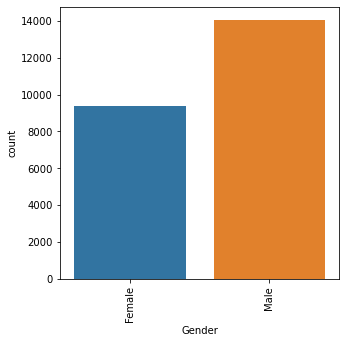

In [67]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['Gender'])

In [68]:
print('Gender count')
print(HR_data.Gender.value_counts())
print('Gender in percentage')
print(HR_data.Gender.value_counts()*100/len(HR_data))

Gender count
Male      14057
Female     9369
Name: Gender, dtype: int64
Gender in percentage
Male      59.980372
Female    39.976959
Name: Gender, dtype: float64


# Inference
Majority(59%) of the employees working in IBM are males.

# e)Job role

<AxesSubplot:xlabel='JobRole', ylabel='count'>

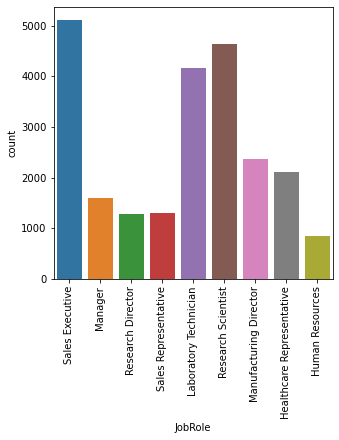

In [69]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['JobRole'])

In [70]:
print('Job role count')
print(HR_data.JobRole.value_counts())
print('Job role in percentage')
print(HR_data.JobRole.value_counts()*100/len(HR_data))

Job role count
Sales Executive              5111
Research Scientist           4634
Laboratory Technician        4162
Manufacturing Director       2376
Healthcare Representative    2104
Manager                      1602
Sales Representative         1306
Research Director            1287
Human Resources               845
Name: JobRole, dtype: int64
Job role in percentage
Sales Executive              21.808329
Research Scientist           19.772999
Laboratory Technician        17.759003
Manufacturing Director       10.138249
Healthcare Representative     8.977641
Manager                       6.835637
Sales Representative          5.572623
Research Director             5.491551
Human Resources               3.605564
Name: JobRole, dtype: float64


# Inference
Around 22% of the employees are Sales executive, 20% areResearch scientist and 18% areLaboratory technician.

# f)Marital status

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

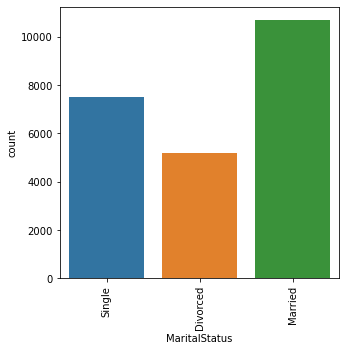

In [71]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['MaritalStatus'])

In [72]:
print('Marital status count')
print(HR_data.MaritalStatus.value_counts())
print('Marital status in percentage')
print(HR_data.MaritalStatus.value_counts()*100/len(HR_data))

Marital status count
Married     10710
Single       7505
Divorced     5210
Name: MaritalStatus, dtype: int64
Marital status in percentage
Married     45.698925
Single      32.023383
Divorced    22.230756
Name: MaritalStatus, dtype: float64


# Inference
45% of the employees are married.

# g)Over 18

<AxesSubplot:xlabel='Over18', ylabel='count'>

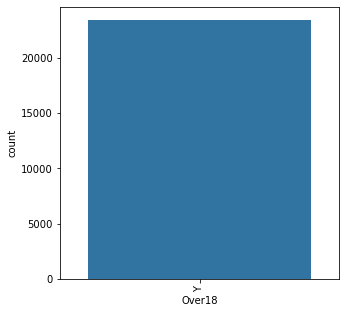

In [73]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['Over18'])

# Inference 
All the employees working in the company are above the age of 18.

# h)Over time

<AxesSubplot:xlabel='OverTime', ylabel='count'>

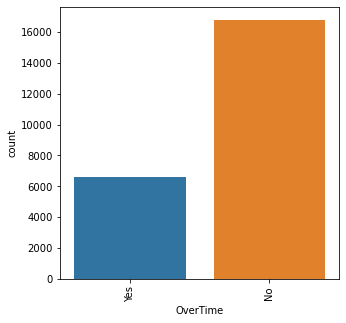

In [74]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['OverTime'])

In [75]:
print('Over time count')
print(HR_data.OverTime.value_counts())
print('Over time in percentage')
print(HR_data.OverTime.value_counts()*100/len(HR_data))

Over time count
No     16791
Yes     6633
Name: OverTime, dtype: int64
Over time in percentage
No     71.646185
Yes    28.302611
Name: OverTime, dtype: float64


# Inference
Only around 28% of the employees are working over time.

# i)Employee source

<AxesSubplot:xlabel='Employee Source', ylabel='count'>

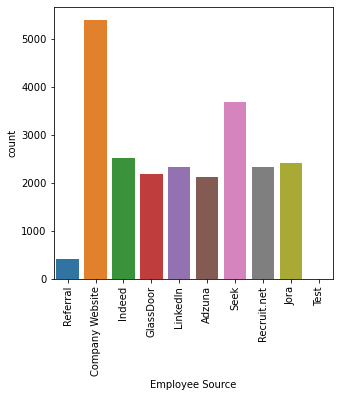

In [76]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['Employee Source'])

# Inference
The major source of employees are from company website.

# >*Cor-relation between features

<AxesSubplot:>

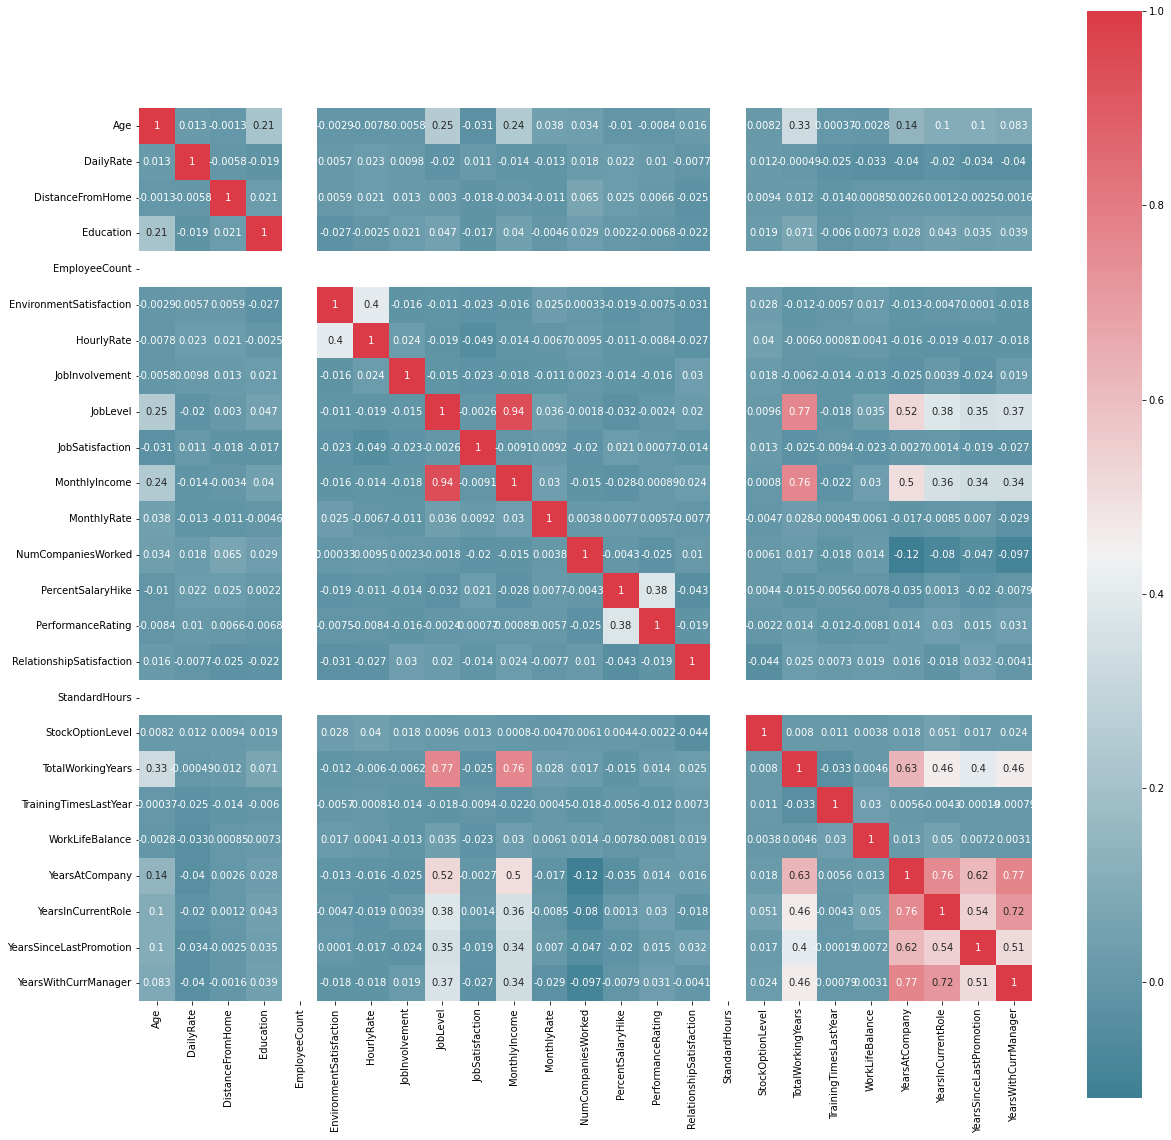

In [77]:
f, ax = plt.subplots(figsize=(20, 20))
corr = HR_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)

<AxesSubplot:>

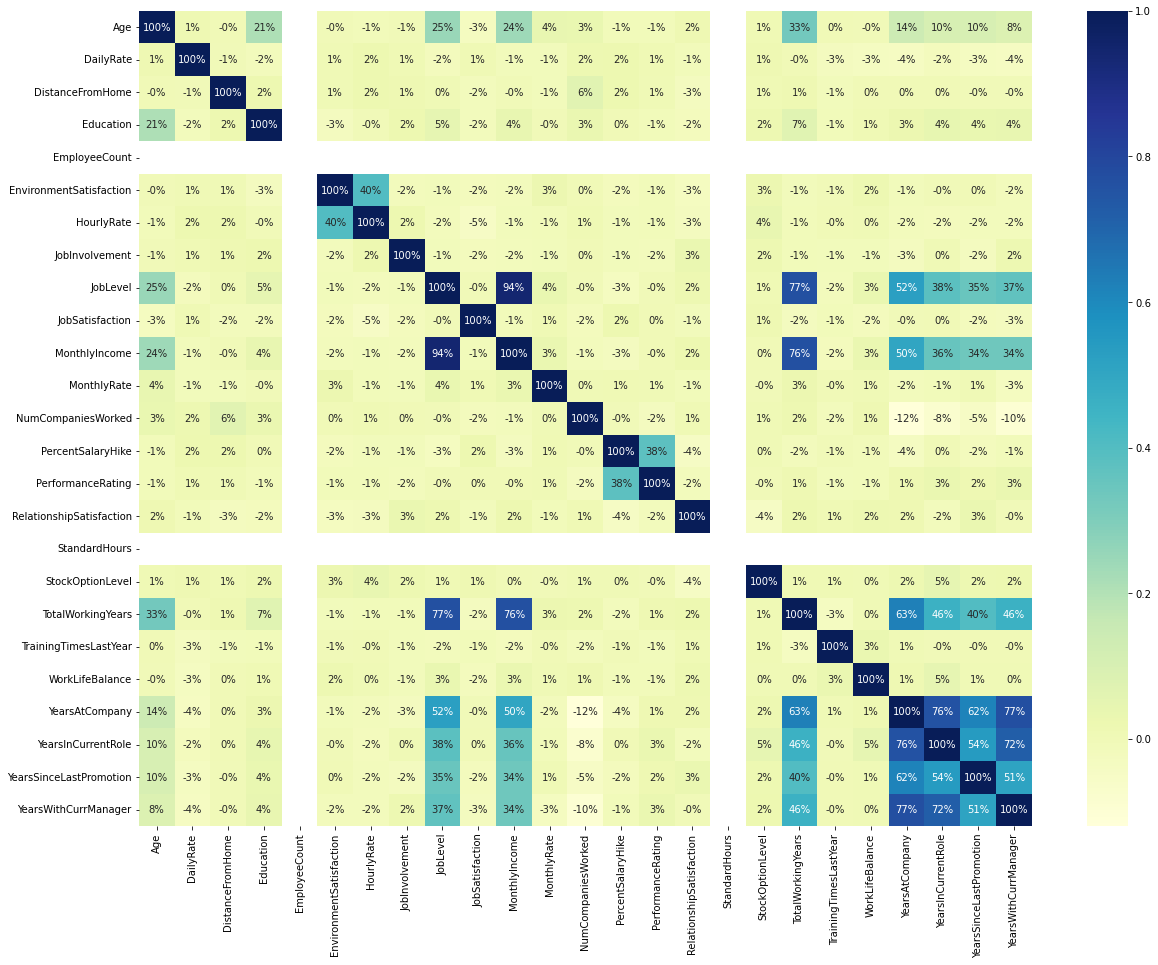

In [78]:
#cor-relation in percentage values
corr=HR_data.corr()
import  seaborn as sns 
plt.figure(figsize=[20,15])
sns.heatmap(corr,annot=True,cmap='YlGnBu',fmt='.0%')

# Inference
From the correlation table we see that monthly income is highly correlated with job level as expected as senior employees will definately earn more. However, daily rate, hourly rate and monthly rate are barely correlated with anything. We will be using monthly income in later analysis as a measurement of salary and get rid of other income related variables.Employee count and Standard hours also does not have any effect.

SOME OTHER INFERENCES FROM THE ABOVE HEATMAP:
1)Job level and total working years are highly correlated which is expected as senior employees must have worked for a larger span of time
2)Monthly Income and total working years are highly correlated which is expected as the employee with more work experince will earn more salary.
3)Years in current role and years at company are highly correlated.
4)Years with current manager and years at company are highly correlated.
5)Self relation ie of a feature to itself is equal to 1 as expected.

# 1.2)Bivariate Visulaization

# >I)Plotting the Features against the 'Target' variable.

# a)Age vs Attririon

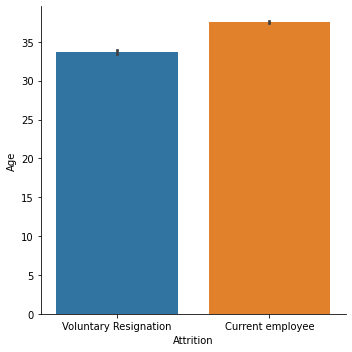

In [79]:
sns.factorplot(data=HR_data,y='Age',x='Attrition',aspect=1,kind='bar')

# Inference
This graph shows that younger age group are leaving the company(ie below 35) and that the people with higher age have lesser tendency to leave the company which makes sense as they may have settled in the organisation.

# b)Bussines travel vs Attrition

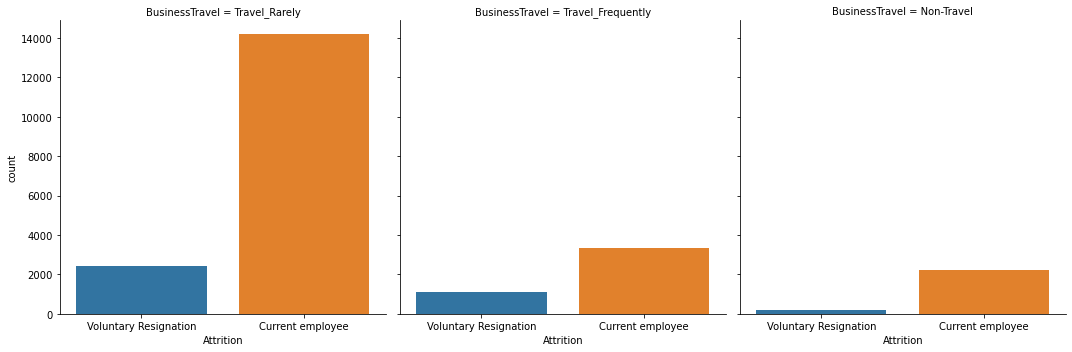

In [80]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='BusinessTravel')

In [81]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.BusinessTravel],margins=True,normalize='index')

Attrition          Current employee  Voluntary Resignation
BusinessTravel                                            
Non-Travel                 0.920217               0.079783
Travel_Frequently          0.753117               0.246883
Travel_Rarely              0.853883               0.146117
All                        0.841683               0.158317

# Inference
The employees who travel frequently have higher percentage(24%) of leaving the company. 

# c)Department vs Attrition

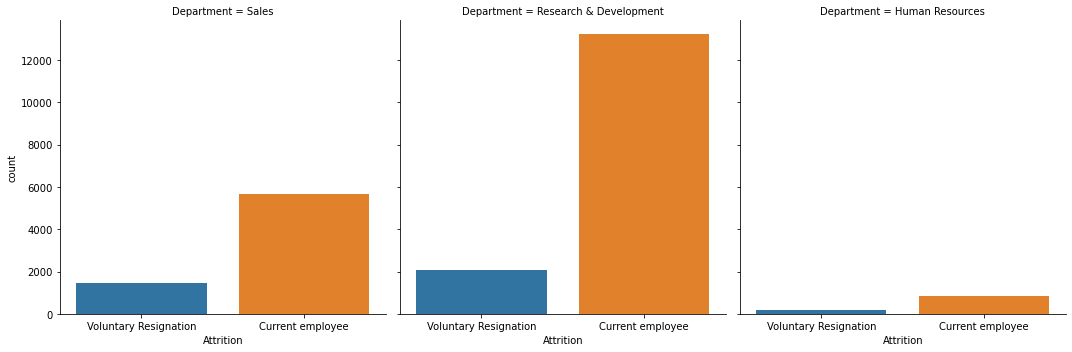

In [82]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='Department')

In [83]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.Department],margins=True,normalize='index')

Attrition               Current employee  Voluntary Resignation
Department                                                     
Human Resources                 0.808636               0.191364
Research & Development          0.864952               0.135048
Sales                           0.796543               0.203457
All                             0.841705               0.158295

# Inference
The higest percentage of voluntary resignation happens in sales department(20%).They may be leaving the company due to reasons like greater workfoce,lower salary,etc.
The currently working employee percent is higher in research & development department(86%).

# d)Distance from home vs Attrition

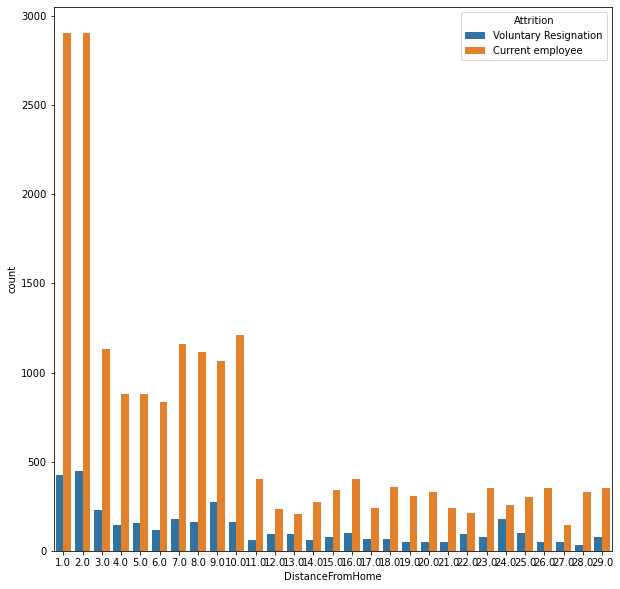

In [84]:
plt.figure(figsize=[10,10])
sns.countplot(x='DistanceFromHome',hue='Attrition',data=HR_data)
plt.show()

In [85]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.DistanceFromHome],margins=True,normalize='index')

Attrition         Current employee  Voluntary Resignation
DistanceFromHome                                         
1.0                       0.872596               0.127404
2.0                       0.866826               0.133174
3.0                       0.832842               0.167158
4.0                       0.858398               0.141602
5.0                       0.847490               0.152510
6.0                       0.878692               0.121308
7.0                       0.868263               0.131737
8.0                       0.873923               0.126077
9.0                       0.797156               0.202844
10.0                      0.883942               0.116058
11.0                      0.864224               0.135776
12.0                      0.712991               0.287009
13.0                      0.684211               0.315789
14.0                      0.811940               0.188060
15.0                      0.811456               0.188544
16.0                      0.805169               0.194831
17.0                      0.788079               0.211921
18.0                      0.847981               0.152019
19.0                      0.866477               0.133523
20.0                      0.875661               0.124339
21.0                      0.833910               0.166090
22.0                      0.686275               0.313725
23.0                      0.813953               0.186047
24.0                      0.592593               0.407407
25.0                      0.751256               0.248744
26.0                      0.877500               0.122500
27.0                      0.747423               0.252577
28.0                      0.912088               0.087912
29.0                      0.813953               0.186047
All                       0.841676               0.158324

# Inference
The employees with greater distance are leaving company.

# e)Education vs Attrition

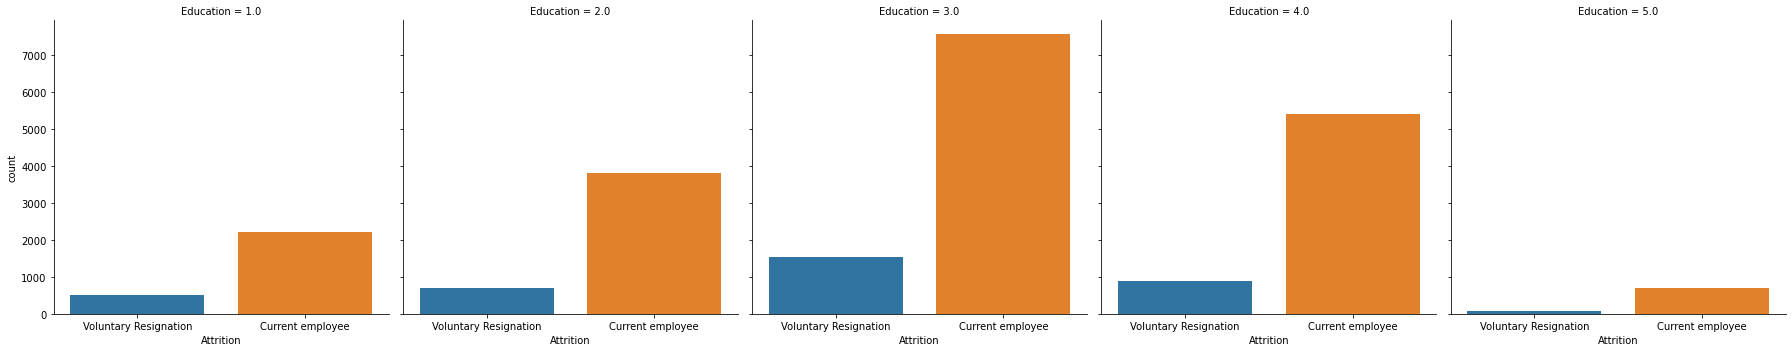

In [86]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='Education')

In [87]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.Education],margins=True,normalize='index')

Attrition  Current employee  Voluntary Resignation
Education                                         
1.0                0.816244               0.183756
2.0                0.845438               0.154562
3.0                0.831757               0.168243
4.0                0.857324               0.142676
5.0                0.896732               0.103268
All                0.841613               0.158387

# Inference
From this graph we can observe that the employees with education level 1 have the higher percentage(18%) of voluntary resignation(ie they are leaving the company)

# f)Education field vs Attrition

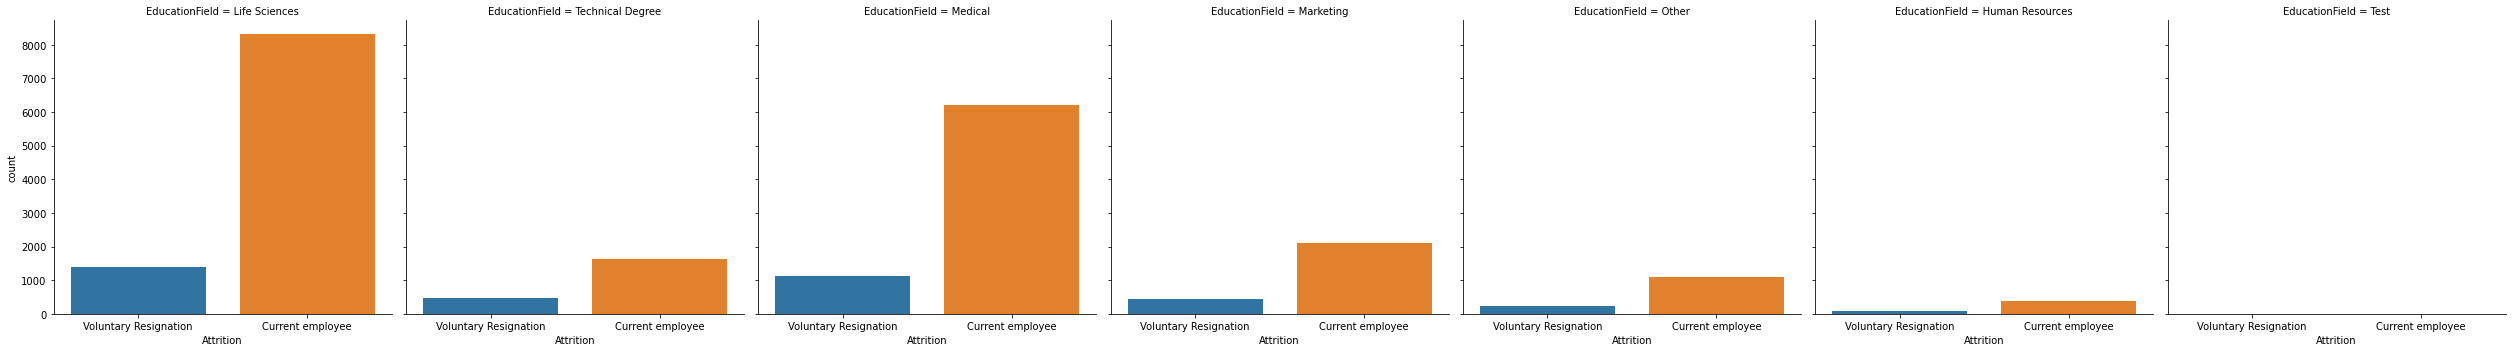

In [88]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='EducationField')

In [89]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.EducationField],margins=True,normalize='index')

Attrition         Current employee  Voluntary Resignation
EducationField                                           
Human Resources           0.825112               0.174888
Life Sciences             0.857408               0.142592
Marketing                 0.826908               0.173092
Medical                   0.848534               0.151466
Other                     0.824561               0.175439
Technical Degree          0.776234               0.223766
Test                      1.000000               0.000000
All                       0.841633               0.158367

# Inference
The employees having technical degree have higher ratio(22%) of voluntary resignation.The employee with life science as the education field have lesser chance of leaving the company.

# g)Environment satisfaction vs Attrition

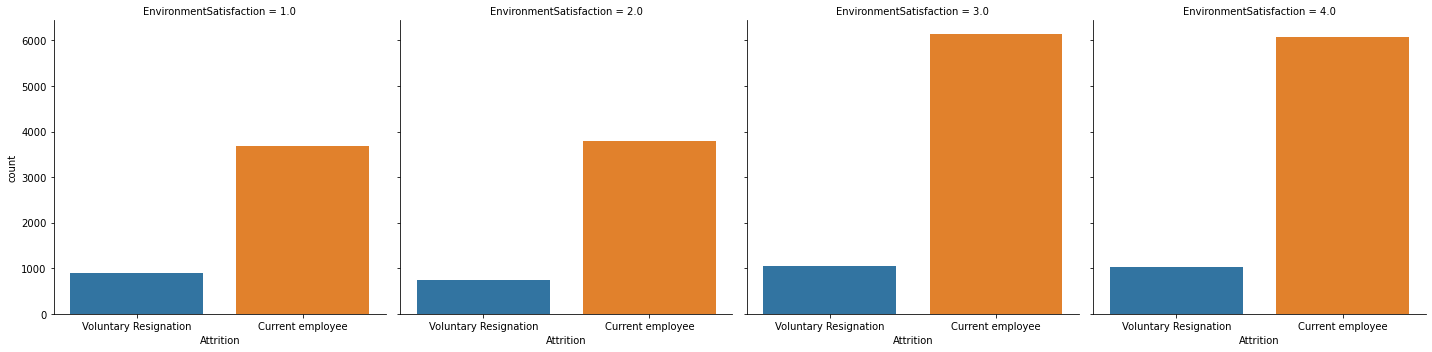

In [90]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='EnvironmentSatisfaction')

In [91]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.EnvironmentSatisfaction],margins=True,normalize='index')

Attrition                Current employee  Voluntary Resignation
EnvironmentSatisfaction                                         
1.0                              0.806114               0.193886
2.0                              0.836897               0.163103
3.0                              0.853011               0.146989
4.0                              0.856037               0.143963
All                              0.841633               0.158367

# Inference
Again we can notice that the relatively high percent of 'current employee' in employees with higher grade of environment satisfacftion.This means that they are satisfied with their working environment.

# h)Gender vs Attrition

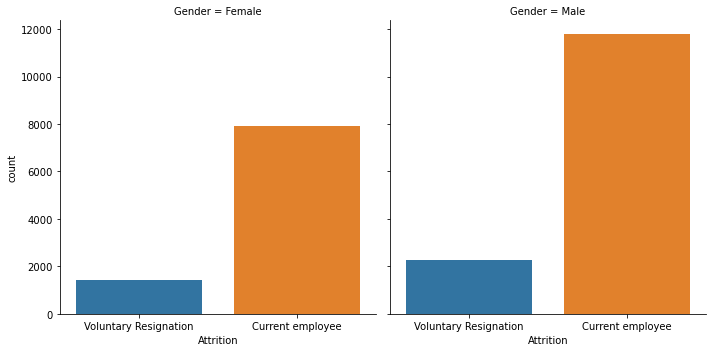

In [92]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='Gender')

In [93]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.Gender],margins=True,normalize='index')

Attrition  Current employee  Voluntary Resignation
Gender                                            
Female             0.846433               0.153567
Male               0.838363               0.161637
All                0.841591               0.158409

# Inference
About 85 % of females want to stay in the company while only 15 % want to leave. All in all 84 % of employees want to be in the company with only being 16% wanting to leave the company.

# i)Job involvement vs Attrition

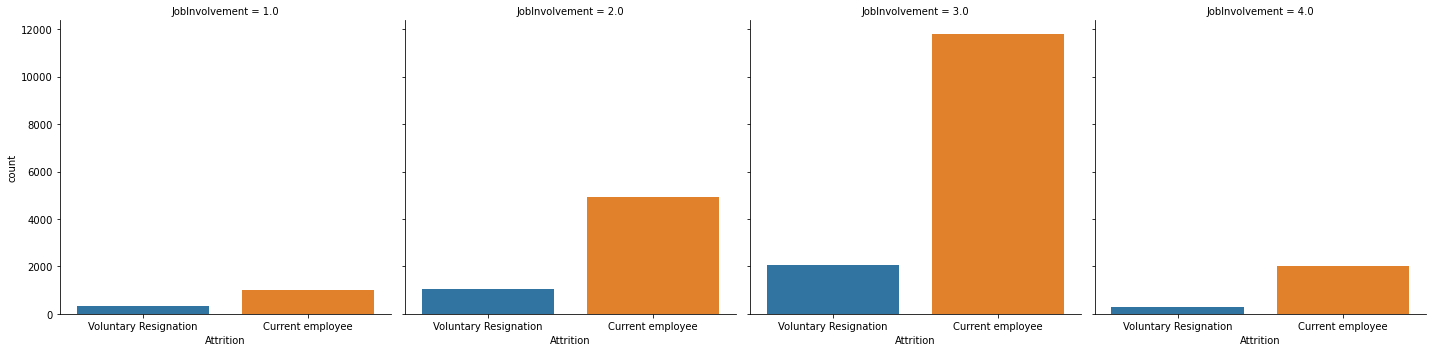

In [94]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='JobInvolvement')

In [95]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.JobInvolvement],margins=True,normalize='index')

Attrition       Current employee  Voluntary Resignation
JobInvolvement                                         
1.0                     0.758908               0.241092
2.0                     0.824170               0.175830
3.0                     0.850903               0.149097
4.0                     0.878455               0.121545
All                     0.841591               0.158409

# Inference
Again we can notice that the relatively high percent of 'current employee' in employees with higher grade of job involvement.This means that they are doing  their maximum.

# j)Job level vs Attrition

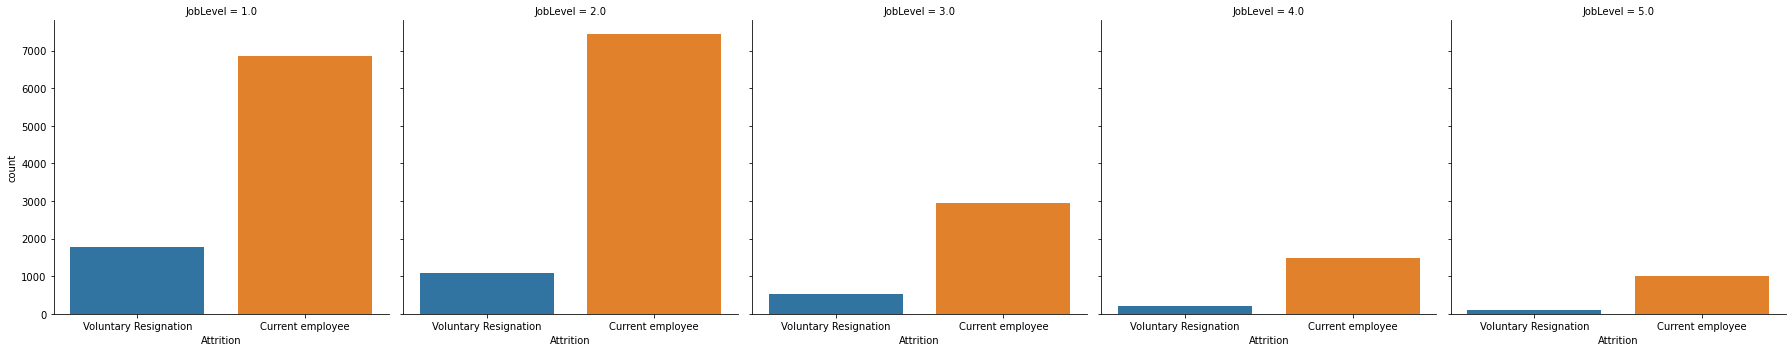

In [96]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='JobLevel')

In [97]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.JobLevel],margins=True,normalize='index')

Attrition  Current employee  Voluntary Resignation
JobLevel                                          
1.0                0.794046               0.205954
2.0                0.871993               0.128007
3.0                0.846818               0.153182
4.0                0.870720               0.129280
5.0                0.918573               0.081427
All                0.841604               0.158396

# Inference
There is a higher rate of voluntary resignation in employees having job level 1(20%).

# k)Job role vs Attrition

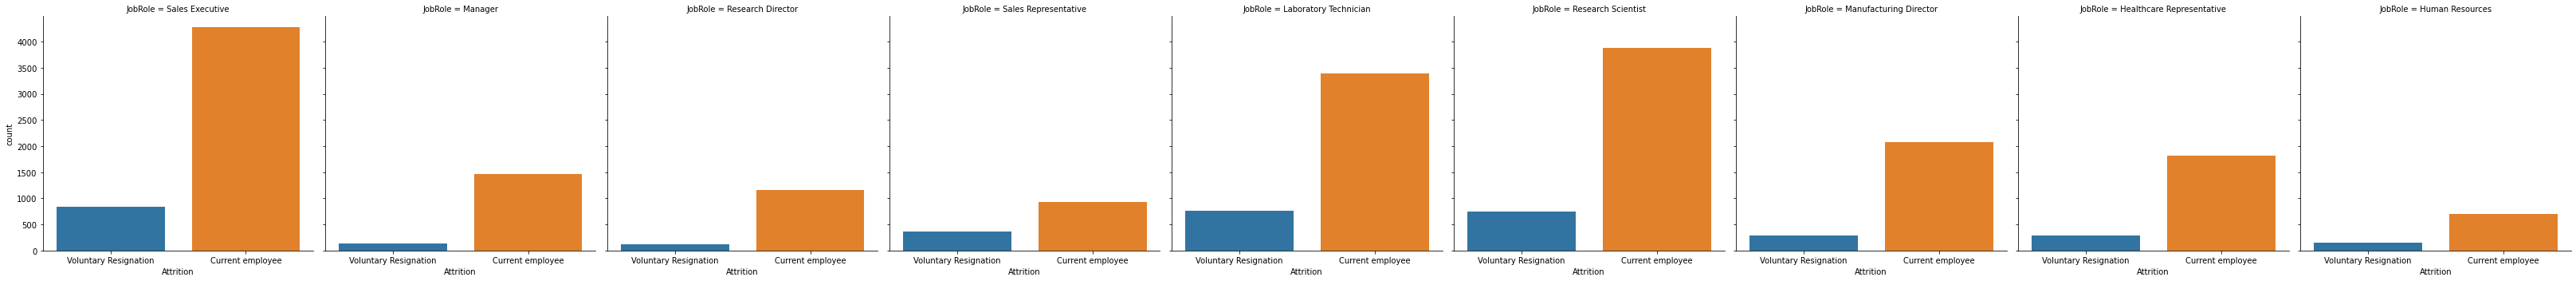

In [98]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='JobRole')

In [99]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.JobRole],margins=True,normalize='index')

Attrition                  Current employee  Voluntary Resignation
JobRole                                                           
Healthcare Representative          0.860675               0.139325
Human Resources                    0.822485               0.177515
Laboratory Technician              0.817460               0.182540
Manager                            0.913179               0.086821
Manufacturing Director             0.877104               0.122896
Research Director                  0.902875               0.097125
Research Scientist                 0.838299               0.161701
Sales Executive                    0.836727               0.163273
Sales Representative               0.718558               0.281442
All                                0.841633               0.158367

# Inference
The lower ratio of voluntary resignation happens in manager role.The higher is in sales representatives,this may due to workforce,low salary,etc.

# l)Job satisfaction vs Attrition

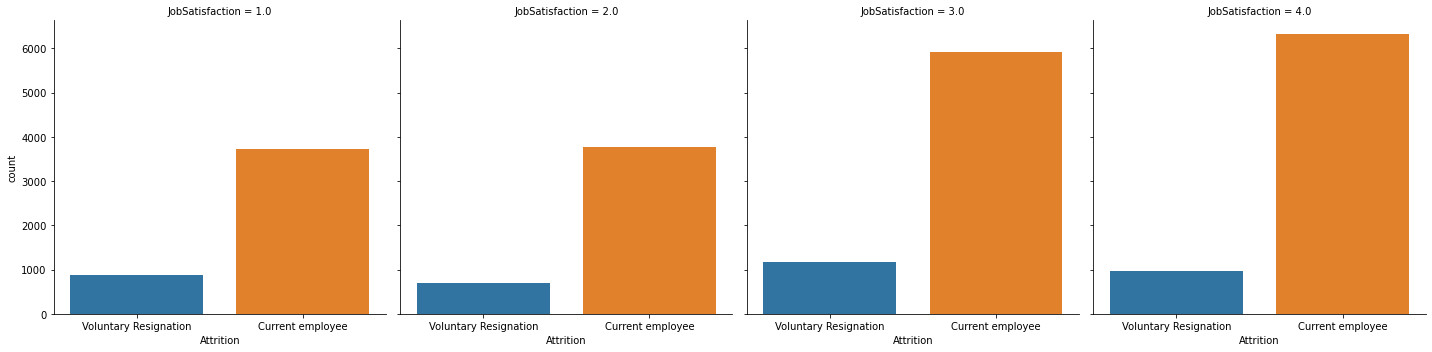

In [100]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='JobSatisfaction')

In [101]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.JobSatisfaction],margins=True,normalize='index')

Attrition        Current employee  Voluntary Resignation
JobSatisfaction                                         
1.0                      0.807868               0.192132
2.0                      0.844634               0.155366
3.0                      0.834721               0.165279
4.0                      0.868161               0.131839
All                      0.841719               0.158281

# Inference
 Note that for higher values of job satisfaction( ie more a person is satisfied with his job) lesser percent of voluntary resignation which is quite obvious as highly contented workers will obvioulsy not like to leave the company.

# m)Marital status vs Attrition

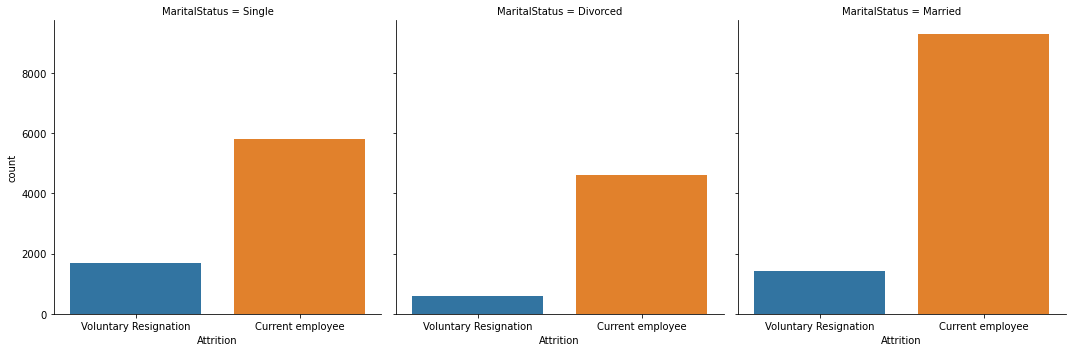

In [102]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='MaritalStatus')

In [103]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.MaritalStatus],margins=True,normalize='index')

Attrition      Current employee  Voluntary Resignation
MaritalStatus                                         
Divorced               0.884217               0.115783
Married                0.867657               0.132343
Single                 0.774710               0.225290
All                    0.841577               0.158423

# Inference
Single peopel are more likely to quit compared to married and divorced people.

# n)Over time vs Attrition

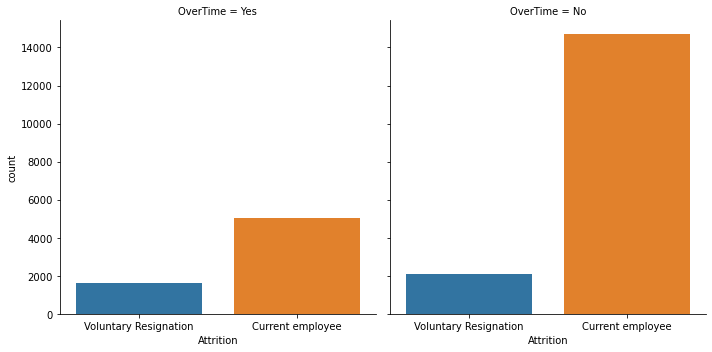

In [104]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='OverTime')

In [105]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.OverTime],margins=True,normalize='index')

Attrition  Current employee  Voluntary Resignation
OverTime                                          
No                 0.875335               0.124665
Yes                0.756182               0.243818
All                0.841584               0.158416

# Inference
The over time working employees are more likely to quit.

# o)Performance rating vs Attrition

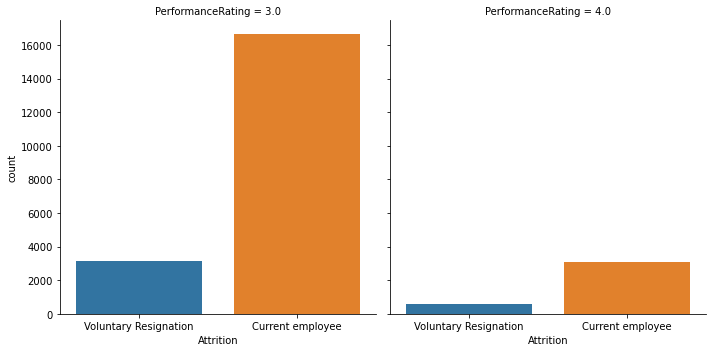

In [106]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='PerformanceRating')

In [107]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.PerformanceRating],margins=True,normalize='index')

Attrition          Current employee  Voluntary Resignation
PerformanceRating                                         
3.0                        0.840730               0.159270
4.0                        0.847341               0.152659
All                        0.841755               0.158245

# Inference
Attrition ratio for both performance level is equal .

# p)Relationship satisfaction vs Attrition

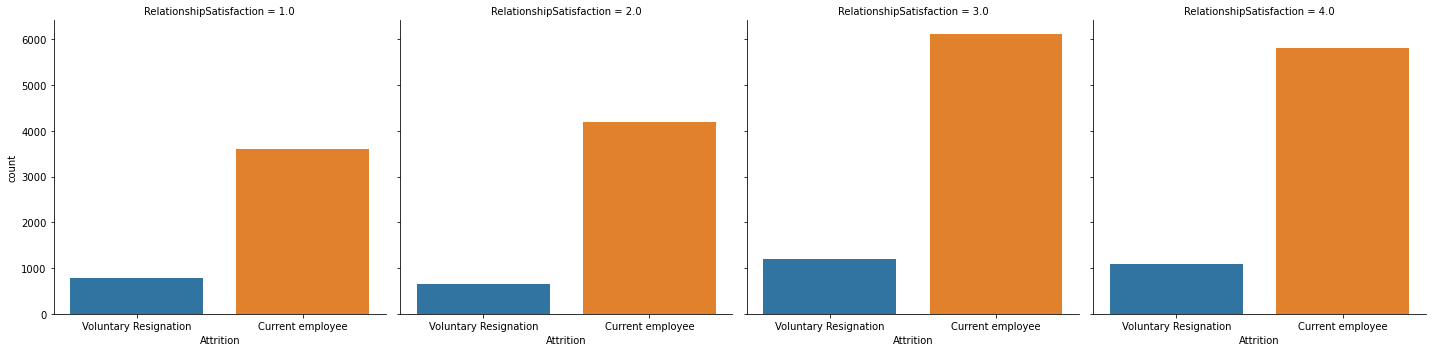

In [108]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='RelationshipSatisfaction')

In [109]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.RelationshipSatisfaction],margins=True,normalize='index')

Attrition                 Current employee  Voluntary Resignation
RelationshipSatisfaction                                         
1.0                               0.822106               0.177894
2.0                               0.866143               0.133857
3.0                               0.835590               0.164410
4.0                               0.843282               0.156718
All                               0.841647               0.158353

# Inference
The lower ratio of voluntary resignation is with level 2.

# q)Stock option level vs Attrition

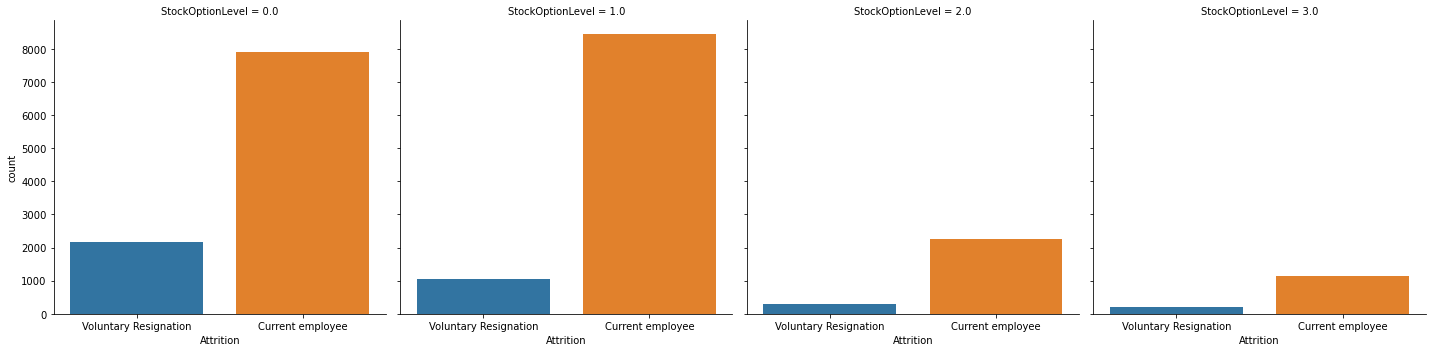

In [110]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='StockOptionLevel')

In [111]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.StockOptionLevel],margins=True,normalize='index')

Attrition         Current employee  Voluntary Resignation
StockOptionLevel                                         
0.0                       0.784770               0.215230
1.0                       0.889674               0.110326
2.0                       0.887485               0.112515
3.0                       0.841909               0.158091
All                       0.841633               0.158367

# Inference
The level 0 has higher ratio of voluntary resignation.

# r)Training times last year vs Attrition

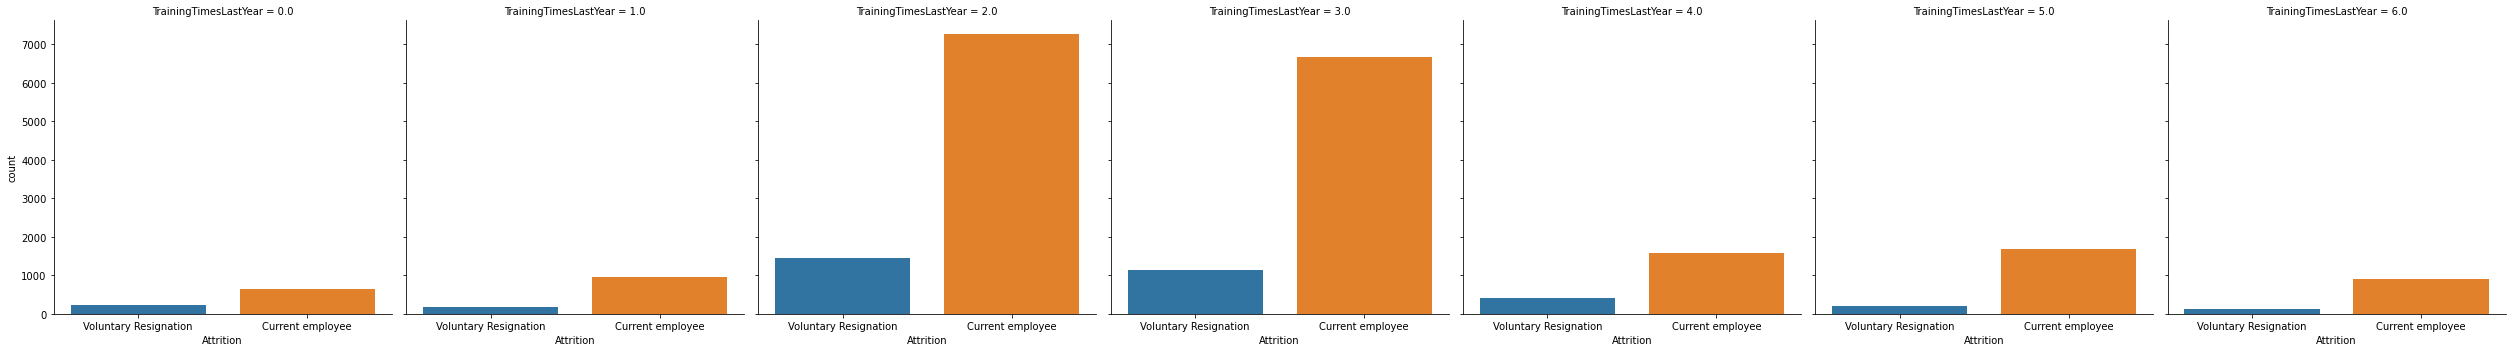

In [112]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='TrainingTimesLastYear')

In [113]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.TrainingTimesLastYear],margins=True,normalize='index')

Attrition              Current employee  Voluntary Resignation
TrainingTimesLastYear                                         
0.0                            0.750288               0.249712
1.0                            0.842667               0.157333
2.0                            0.832626               0.167374
3.0                            0.855312               0.144688
4.0                            0.797256               0.202744
5.0                            0.898512               0.101488
6.0                            0.871401               0.128599
All                            0.841662               0.158338

# Inference
The employees who does not get any training during last year are most likely to resing.

# s)Work life balance vs Attrition

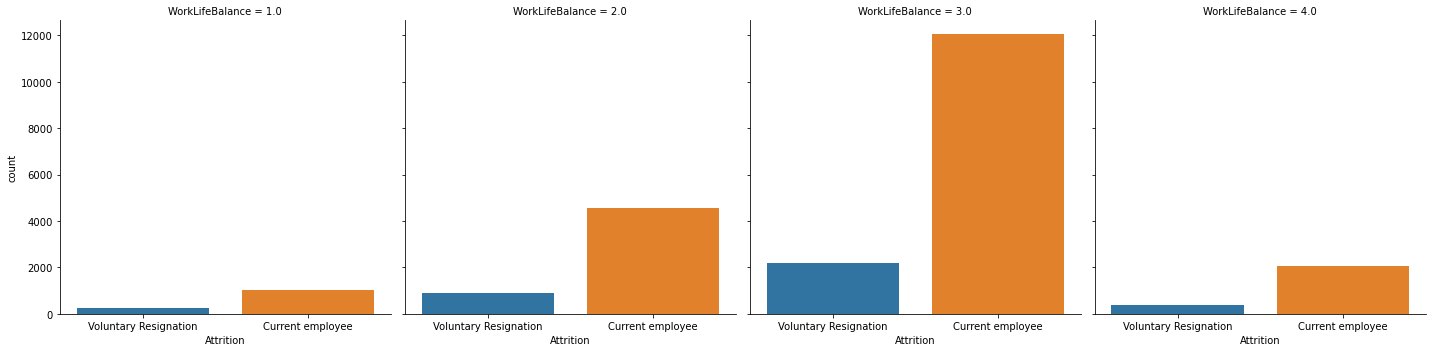

In [114]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='WorkLifeBalance')

In [115]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.WorkLifeBalance],margins=True,normalize='index')

Attrition        Current employee  Voluntary Resignation
WorkLifeBalance                                         
1.0                      0.799685               0.200315
2.0                      0.835799               0.164201
3.0                      0.846132               0.153868
4.0                      0.849815               0.150185
All                      0.841584               0.158416

# Inference
The lower rating employees are likely to quit the company.They have bad level of work-life balance.

# t)Number of companies worked vs Attrition

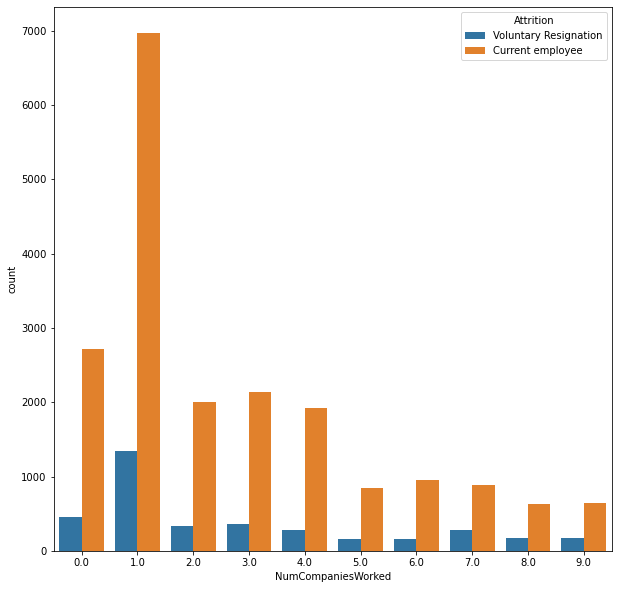

In [116]:
plt.figure(figsize=[10,10])
sns.countplot(x='NumCompaniesWorked',hue='Attrition',data=HR_data)
plt.show()

In [117]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.NumCompaniesWorked],margins=True,normalize='index')

Attrition           Current employee  Voluntary Resignation
NumCompaniesWorked                                         
0.0                         0.857278               0.142722
1.0                         0.838912               0.161088
2.0                         0.857940               0.142060
3.0                         0.854466               0.145534
4.0                         0.872678               0.127322
5.0                         0.837325               0.162675
6.0                         0.856498               0.143502
7.0                         0.761538               0.238462
8.0                         0.786885               0.213115
9.0                         0.791667               0.208333
All                         0.841633               0.158367

# Inference
The employees who have worked for many companies have higher chance of leaving the company.

# u)Years with current manager vs Attrition

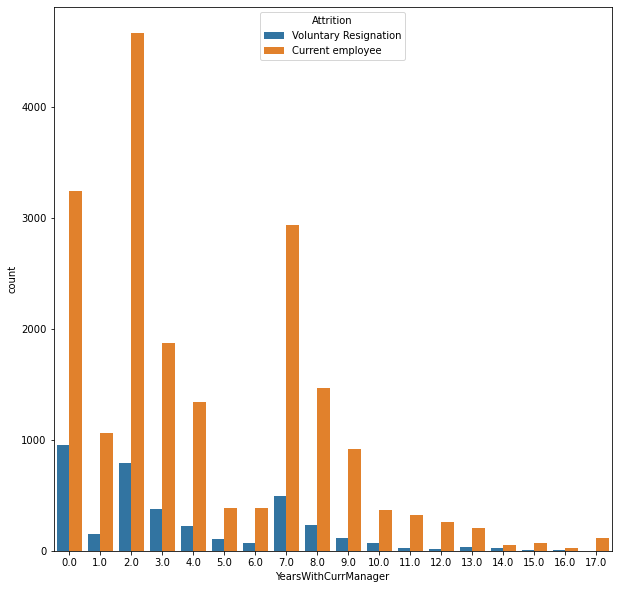

In [118]:
plt.figure(figsize=[10,10])
sns.countplot(x='YearsWithCurrManager',hue='Attrition',data=HR_data)
plt.show()

In [119]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.YearsWithCurrManager],margins=True,normalize='index')

Attrition             Current employee  Voluntary Resignation
YearsWithCurrManager                                         
0.0                           0.773009               0.226991
1.0                           0.874384               0.125616
2.0                           0.854918               0.145082
3.0                           0.833481               0.166519
4.0                           0.856688               0.143312
5.0                           0.778226               0.221774
6.0                           0.838074               0.161926
7.0                           0.855064               0.144936
8.0                           0.863208               0.136792
9.0                           0.885990               0.114010
10.0                          0.841379               0.158621
11.0                          0.931429               0.068571
12.0                          0.942238               0.057762
13.0                          0.873950               0.126050
14.0                          0.696203               0.303797
15.0                          0.900000               0.100000
16.0                          0.750000               0.250000
17.0                          1.000000               0.000000
All                           0.841647               0.158353

# Inference
The greater ratio of attrition happens in the employee who had worked 14 years with the current manager.

# v)Years since last promotion vs Attrition

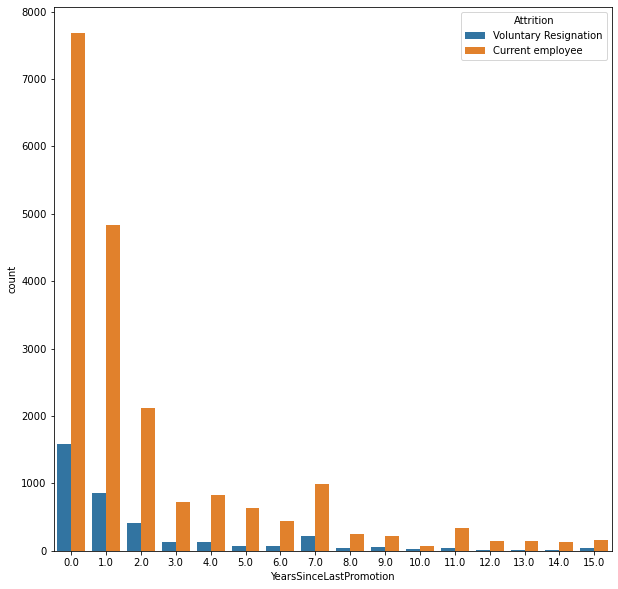

In [120]:
plt.figure(figsize=[10,10])
sns.countplot(x='YearsSinceLastPromotion',hue='Attrition',data=HR_data)
plt.show()

In [121]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.YearsSinceLastPromotion],margins=True,normalize='index')

Attrition                Current employee  Voluntary Resignation
YearsSinceLastPromotion                                         
0.0                              0.829016               0.170984
1.0                              0.850053               0.149947
2.0                              0.837347               0.162653
3.0                              0.852906               0.147094
4.0                              0.859375               0.140625
5.0                              0.897616               0.102384
6.0                              0.866142               0.133858
7.0                              0.819605               0.180395
8.0                              0.859155               0.140845
9.0                              0.797048               0.202952
10.0                             0.750000               0.250000
11.0                             0.891534               0.108466
12.0                             0.950000               0.050000
13.0                             0.898734               0.101266
14.0                             0.888889               0.111111
15.0                             0.800000               0.200000
All                              0.841626               0.158374

25% of attrition happens in the employees who doesnt got promotion for last 10 years.

# w)Years in current role vs Attrition

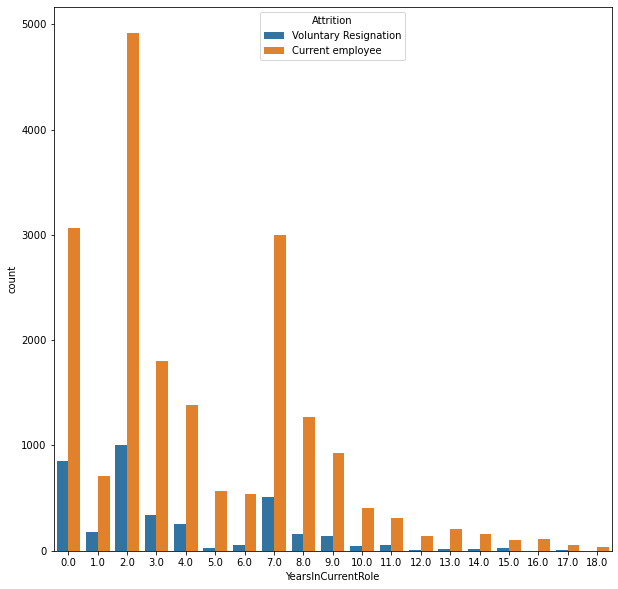

In [122]:
plt.figure(figsize=[10,10])
sns.countplot(x='YearsInCurrentRole',hue='Attrition',data=HR_data)
plt.show()

In [123]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.YearsInCurrentRole],margins=True,normalize='index')

Attrition           Current employee  Voluntary Resignation
YearsInCurrentRole                                         
0.0                         0.782254               0.217746
1.0                         0.803612               0.196388
2.0                         0.829705               0.170295
3.0                         0.840187               0.159813
4.0                         0.844553               0.155447
5.0                         0.962838               0.037162
6.0                         0.905245               0.094755
7.0                         0.853485               0.146515
8.0                         0.887798               0.112202
9.0                         0.865922               0.134078
10.0                        0.893013               0.106987
11.0                        0.855153               0.144847
12.0                        0.946309               0.053691
13.0                        0.927602               0.072398
14.0                        0.909091               0.090909
15.0                        0.791045               0.208955
16.0                        1.000000               0.000000
17.0                        0.875000               0.125000
18.0                        1.000000               0.000000
All                         0.841635               0.158365

# x)Years at company vs Attrition

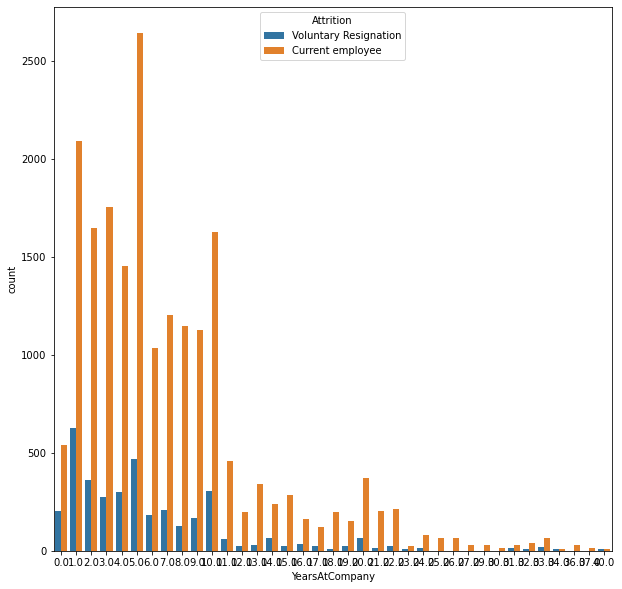

In [124]:
plt.figure(figsize=[10,10])
sns.countplot(x='YearsAtCompany',hue='Attrition',data=HR_data)
plt.show()

In [125]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.YearsAtCompany],margins=True,normalize='index')

Attrition       Current employee  Voluntary Resignation
YearsAtCompany                                         
0.0                     0.727027               0.272973
1.0                     0.769429               0.230571
2.0                     0.820040               0.179960
3.0                     0.864825               0.135175
4.0                     0.828962               0.171038
5.0                     0.849245               0.150755
6.0                     0.851396               0.148604
7.0                     0.851878               0.148122
8.0                     0.898824               0.101176
9.0                     0.869498               0.130502
10.0                    0.842842               0.157158
11.0                    0.887160               0.112840
12.0                    0.891403               0.108597
13.0                    0.916442               0.083558
14.0                    0.789474               0.210526
15.0                    0.922830               0.077170
16.0                    0.818182               0.181818
17.0                    0.832168               0.167832
18.0                    0.960784               0.039216
19.0                    0.863636               0.136364
20.0                    0.848970               0.151030
21.0                    0.927273               0.072727
22.0                    0.899582               0.100418
23.0                    0.750000               0.250000
24.0                    0.831579               0.168421
25.0                    1.000000               0.000000
26.0                    1.000000               0.000000
27.0                    0.967742               0.032258
29.0                    0.966667               0.033333
30.0                    1.000000               0.000000
31.0                    0.666667               0.333333
32.0                    0.833333               0.166667
33.0                    0.788235               0.211765
34.0                    0.500000               0.500000
36.0                    1.000000               0.000000
37.0                    1.000000               0.000000
40.0                    0.466667               0.533333
All                     0.841692               0.158308

# y)Total working years vs Attrition

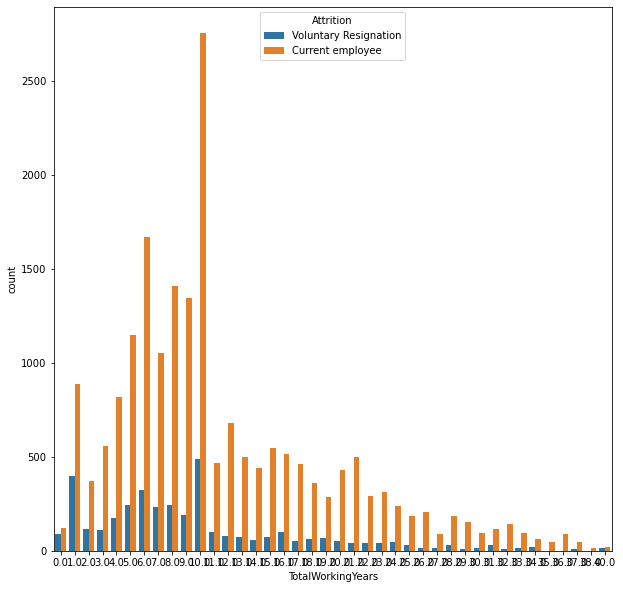

In [126]:
plt.figure(figsize=[10,10])
sns.countplot(x='TotalWorkingYears',hue='Attrition',data=HR_data)
plt.show()

In [127]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.TotalWorkingYears],margins=True,normalize='index')

Attrition          Current employee  Voluntary Resignation
TotalWorkingYears                                         
0.0                        0.578947               0.421053
1.0                        0.690328               0.309672
2.0                        0.763975               0.236025
3.0                        0.834328               0.165672
4.0                        0.825605               0.174395
5.0                        0.824838               0.175162
6.0                        0.837770               0.162230
7.0                        0.819315               0.180685
8.0                        0.852390               0.147610
9.0                        0.874512               0.125488
10.0                       0.849429               0.150571
11.0                       0.821366               0.178634
12.0                       0.896962               0.103038
13.0                       0.875220               0.124780
14.0                       0.886869               0.113131
15.0                       0.884058               0.115942
16.0                       0.838762               0.161238
17.0                       0.897485               0.102515
18.0                       0.849412               0.150588
19.0                       0.811429               0.188571
20.0                       0.895397               0.104603
21.0                       0.924074               0.075926
22.0                       0.879154               0.120846
23.0                       0.887006               0.112994
24.0                       0.833333               0.166667
25.0                       0.850000               0.150000
26.0                       0.928251               0.071749
27.0                       0.846154               0.153846
28.0                       0.850000               0.150000
29.0                       0.950000               0.050000
30.0                       0.867925               0.132075
31.0                       0.783784               0.216216
32.0                       0.933333               0.066667
33.0                       0.845455               0.154545
34.0                       0.780488               0.219512
35.0                       1.000000               0.000000
36.0                       1.000000               0.000000
37.0                       0.857143               0.142857
38.0                       1.000000               0.000000
40.0                       0.567568               0.432432
All                        0.841640               0.158360

# z)Employee Source vs Attrition

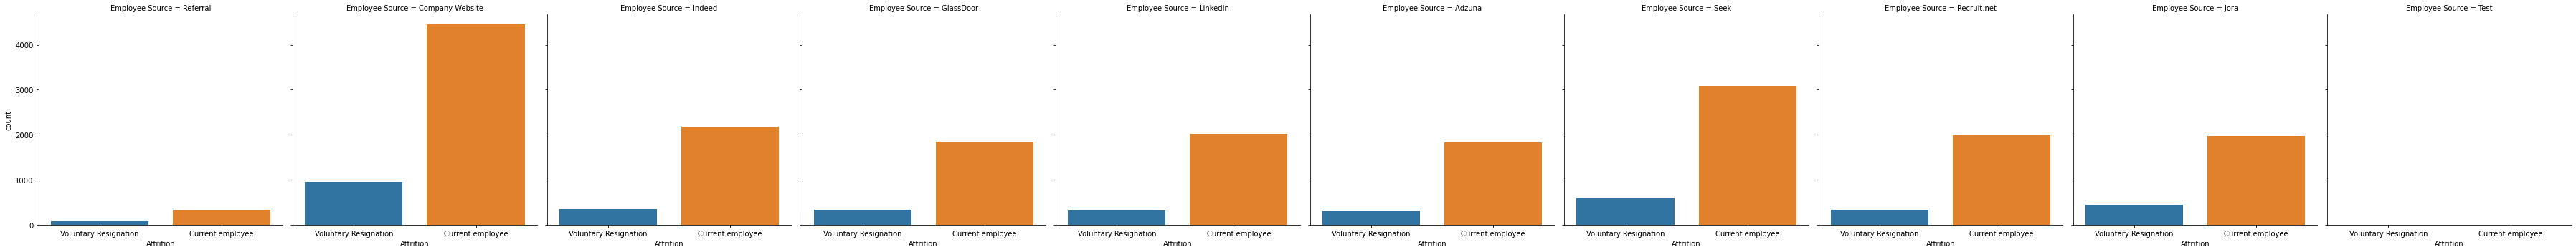

In [128]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='Employee Source')

# Inference
The higest ratio of voluntary resignation is by employees who have  entered by referal(20%).

# >II)Age vs Joblevel

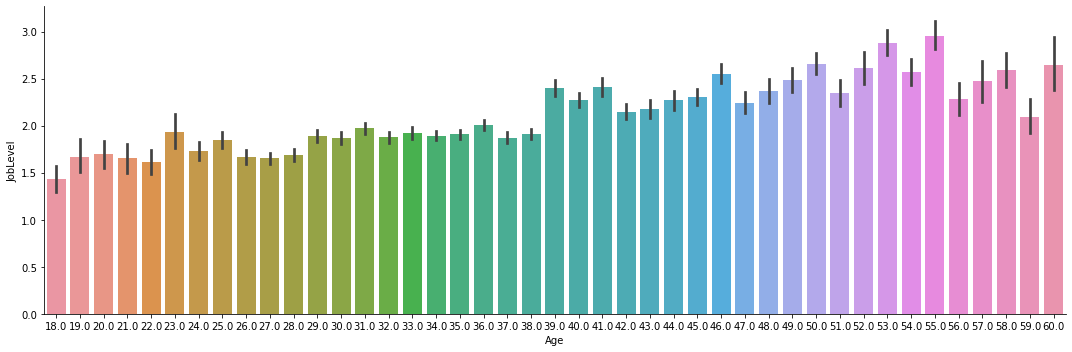

In [129]:
sns.factorplot(x = 'Age', y='JobLevel', kind = 'bar', data=HR_data, aspect = 3)

In [130]:
pd.crosstab(columns=[HR_data.JobLevel],index=[HR_data.Age],margins=True,normalize='index')

JobLevel       1.0       2.0       3.0       4.0       5.0
Age                                                       
18.0      0.692913  0.244094  0.000000  0.062992  0.000000
19.0      0.608392  0.223776  0.111888  0.000000  0.055944
20.0      0.628571  0.137143  0.142857  0.091429  0.000000
21.0      0.690141  0.117371  0.117371  0.000000  0.075117
22.0      0.677043  0.159533  0.038911  0.124514  0.000000
23.0      0.569507  0.179372  0.071749  0.107623  0.071749
24.0      0.557692  0.252404  0.112981  0.057692  0.019231
25.0      0.406250  0.439904  0.076923  0.057692  0.019231
26.0      0.522876  0.352941  0.084967  0.013072  0.026144
27.0      0.517464  0.353169  0.098318  0.020699  0.010349
28.0      0.500664  0.371846  0.084993  0.022576  0.019920
29.0      0.431628  0.391628  0.080000  0.052093  0.044651
30.0      0.419118  0.375000  0.139706  0.049370  0.016807
31.0      0.386175  0.356682  0.183410  0.044240  0.029493
32.0      0.394309  0.408537  0.148374  0.024390  0.024390
33.0      0.399137  0.412082  0.102481  0.043150  0.043150
34.0      0.382927  0.418699  0.131707  0.053659  0.013008
35.0      0.378158  0.389568  0.199674  0.013040  0.019560
36.0      0.321267  0.431674  0.188235  0.037104  0.021719
37.0      0.401985  0.373449  0.183623  0.031017  0.009926
38.0      0.364021  0.417989  0.172487  0.033862  0.011640
39.0      0.211800  0.420575  0.192133  0.107413  0.068079
40.0      0.260674  0.416854  0.165169  0.105618  0.051685
41.0      0.246914  0.371914  0.199074  0.089506  0.092593
42.0      0.327001  0.423338  0.099050  0.074627  0.075984
43.0      0.341797  0.345703  0.158203  0.107422  0.046875
44.0      0.339015  0.289773  0.204545  0.092803  0.073864
45.0      0.234206  0.428351  0.212635  0.050847  0.073960
46.0      0.215385  0.334615  0.238462  0.103846  0.107692
47.0      0.274151  0.443864  0.112272  0.107050  0.062663
48.0      0.289474  0.315789  0.210526  0.105263  0.078947
49.0      0.257143  0.353247  0.142857  0.145455  0.101299
50.0      0.239583  0.318750  0.116667  0.193750  0.131250
51.0      0.317881  0.258278  0.238411  0.132450  0.052980
52.0      0.305556  0.250000  0.111111  0.194444  0.138889
53.0      0.158576  0.284790  0.155340  0.323625  0.077670
54.0      0.202091  0.355401  0.191638  0.167247  0.083624
55.0      0.183908  0.272989  0.132184  0.227011  0.183908
56.0      0.394619  0.215247  0.174888  0.143498  0.071749
57.0      0.126984  0.380952  0.380952  0.111111  0.000000
58.0      0.366071  0.174107  0.107143  0.209821  0.142857
59.0      0.403727  0.298137  0.149068  0.099379  0.049689
60.0      0.200000  0.325000  0.187500  0.200000  0.087500
All       0.368864  0.363869  0.148211  0.072398  0.046658

# Inference
Younger age group employees (ie between 18 to 28)are in job level 1.

# >III)Job level vs Monthly income

Text(0.5, 1.0, 'Job level vs Monthly income')

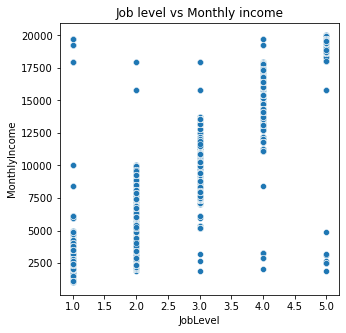

In [131]:
sns.scatterplot(data=HR_data,x='JobLevel',y='MonthlyIncome')
plt.title("Job level vs Monthly income")  

In [132]:
HR_data.groupby(['JobLevel'])['MonthlyIncome'].mean().to_frame()

MonthlyIncome
JobLevel               
1.0         2817.804423
2.0         5506.260620
3.0         9811.337846
4.0        15459.941627
5.0        19051.022894

# Inference
The employees with job level 5 have highest salary which make a sense that job level 5 is the highest position in the company.

# >IV)Job level vs Total working years

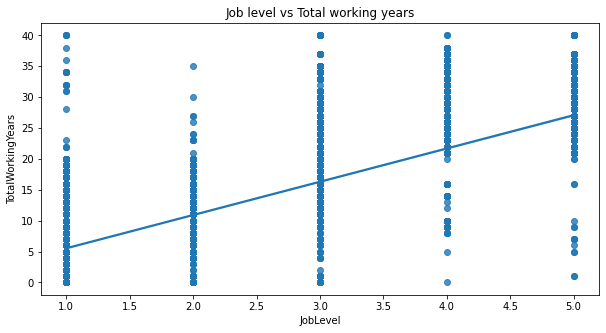

In [133]:
plt.figure(figsize=(10,5))
sns.regplot(data=HR_data,x='JobLevel',y='TotalWorkingYears')
plt.title("Job level vs Total working years")
plt.show()

In [134]:
HR_data.groupby(['JobLevel'])['TotalWorkingYears'].mean().to_frame()

TotalWorkingYears
JobLevel                   
1.0                6.015976
2.0               10.387188
3.0               14.954506
4.0               25.253538
5.0               26.073193

# Inference
The employees with greater working years are in job level 5.

# >V)Age vs Monthly income

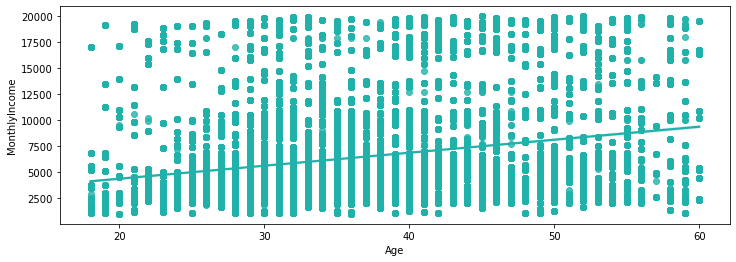

In [135]:
plt.figure(figsize = (12,4))
sns.regplot(x= 'Age', y = 'MonthlyIncome' , data =HR_data,color='lightseagreen')
plt.show()

In [136]:
HR_data.groupby(['Age'])['MonthlyIncome'].mean().to_frame()

MonthlyIncome
Age                
18.0    3677.409449
19.0    5135.928571
20.0    5151.172414
21.0    5320.370892
22.0    5129.976654
23.0    5945.497758
24.0    5033.247596
25.0    5538.845783
26.0    4822.352941
27.0    4770.452781
28.0    5050.309429
29.0    5840.417674
30.0    5601.017857
31.0    6186.592627
32.0    5699.667683
33.0    5970.408846
34.0    5761.904801
35.0    5623.625102
36.0    6120.104167
37.0    6005.581886
38.0    6015.064550
39.0    7657.720121
40.0    7261.960806
41.0    8010.725309
42.0    6760.880597
43.0    7097.855186
44.0    7320.301136
45.0    7211.679507
46.0    8625.409615
47.0    7094.610966
48.0    7638.157895
49.0    8184.093750
50.0    9064.514583
51.0    7898.688742
52.0    8764.361111
53.0    9738.268608
54.0    8865.477352
55.0   10255.626437
56.0    7406.313901
57.0    8632.253968
58.0    9004.379464
59.0    6574.931677
60.0    9136.825000

# Inference
The monthly salary is low for younger age employees.

# >VI)Performance rating vs Percentage salary hike

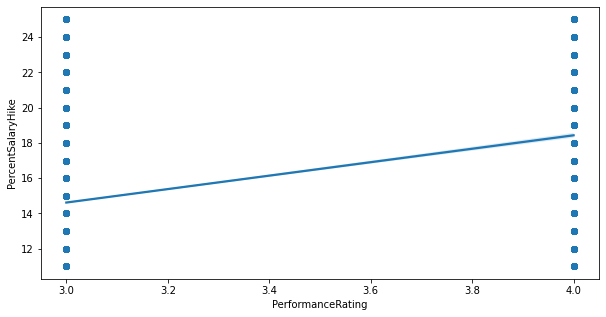

In [137]:
plt.figure(figsize = (10,5))
sns.regplot(x= 'PerformanceRating', y = 'PercentSalaryHike' , data = HR_data)
plt.show()

In [138]:
HR_data.groupby(['PerformanceRating'])['PercentSalaryHike'].mean().to_frame()

PercentSalaryHike
PerformanceRating                   
3.0                        14.620521
4.0                        18.430579

# Inference
There is a linear relationship between performance rating and percentage salary hike.
The employees with performance rating 4 has 18% salary hike.

# >VII)Age vs Education

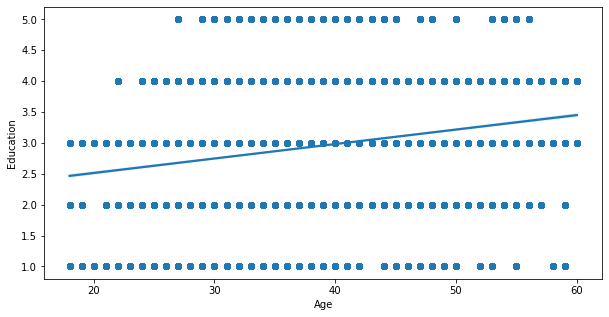

In [139]:
plt.figure(figsize = (10,5))
sns.regplot(x= 'Age',y = 'Education',data = HR_data)
plt.show()

In [140]:
HR_data.groupby(['Education'])['Age'].mean().to_frame()

Age
Education           
1.0        32.186627
2.0        36.849867
3.0        36.502913
4.0        39.307072
5.0        39.922876

# >VIII)Job level vs Years at company

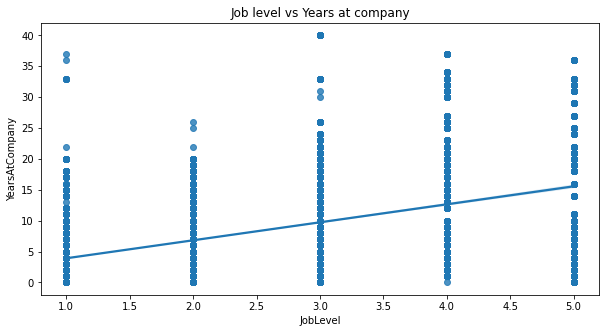

In [141]:
plt.figure(figsize=(10,5))
sns.regplot(data=HR_data,x='JobLevel',y='YearsAtCompany')
plt.title("Job level vs Years at company")
plt.show()

In [142]:
HR_data.groupby(['JobLevel'])['YearsAtCompany'].mean().to_frame()

YearsAtCompany
JobLevel                
1.0             4.006600
2.0             6.744778
3.0             9.287813
4.0            13.778302
5.0            15.101555

# Inference
The employees who are working in the company for more years are at job level 5. 

# >IX)Total working years vs Monthly income

Text(0.5, 1.0, 'Total working years vs Monthly income')

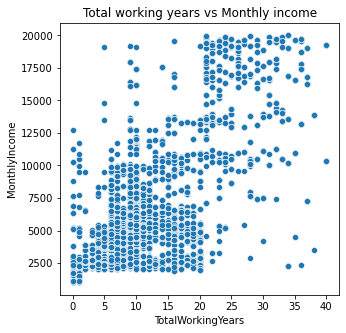

In [143]:
sns.scatterplot(data=HR_data,x='TotalWorkingYears',y='MonthlyIncome')
plt.title("Total working years vs Monthly income") 

# Inference
The employees who are working for more years have higher salary.

# >X)Job level vs Years since last promotion

Text(0.5, 1.0, 'Job level vs Years since last promotion')

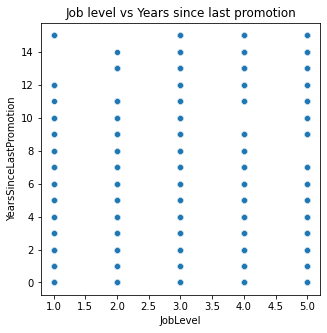

In [144]:
sns.scatterplot(data=HR_data,x='JobLevel',y='YearsSinceLastPromotion')
plt.title("Job level vs Years since last promotion") 

In [145]:
HR_data.groupby(['JobLevel'])['YearsSinceLastPromotion'].mean().to_frame()

YearsSinceLastPromotion
JobLevel                         
1.0                      1.212111
2.0                      1.879723
3.0                      3.307227
4.0                      4.792920
5.0                      4.588289

# Inference
The employees who are in job level 4 & 5 have higher number of promotion since last year.

# >XI)Years since last promotion vs Monthly income

Text(0.5, 1.0, 'Years since last promotion vs Monthly income')

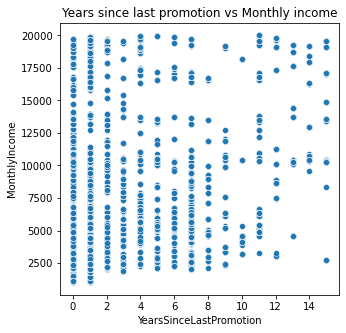

In [146]:
sns.scatterplot(data=HR_data,x='YearsSinceLastPromotion',y='MonthlyIncome')
plt.title("Years since last promotion vs Monthly income") 

In [147]:
HR_data.groupby(['YearsSinceLastPromotion'])['MonthlyIncome'].mean().to_frame()

MonthlyIncome
YearsSinceLastPromotion               
0.0                        5532.101673
1.0                        5984.224001
2.0                        5890.785545
3.0                        6822.169632
4.0                        9629.603754
5.0                        7217.628331
6.0                        8406.468504
7.0                        7028.004115
8.0                        7958.491166
9.0                        8880.579336
10.0                       7439.927083
11.0                      12252.240741
12.0                      12482.281250
13.0                      13892.329114
14.0                      14619.118056
15.0                      14209.830097

# Inference
The employees getting more promotion have high salary.

# 1.3)Multivariate Visualization

# a)Gender & Monthly income vs Attrition

<AxesSubplot:xlabel='Gender', ylabel='MonthlyIncome'>

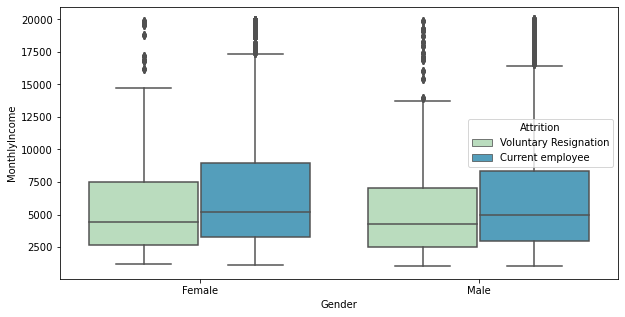

In [148]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Gender", y="MonthlyIncome", data=HR_data,hue='Attrition',palette='GnBu')

In [149]:
HR_data.groupby(['Gender','Attrition'])['MonthlyIncome'].median().to_frame()

MonthlyIncome
Gender Attrition                           
Female Current employee              5204.0
       Voluntary Resignation         4448.0
Male   Current employee              4941.0
       Voluntary Resignation         4284.0

In [150]:
HR_data.groupby(['Gender','Attrition'])['MonthlyIncome'].mean().to_frame()

MonthlyIncome
Gender Attrition                           
Female Current employee         6863.720631
       Voluntary Resignation    5716.209464
Male   Current employee         6529.131901
       Voluntary Resignation    5641.251653

# Inference
Monthly income rate of male and female for attrition is almost same .

# b)Gender & Age vs Attrition

<AxesSubplot:xlabel='Gender', ylabel='Age'>

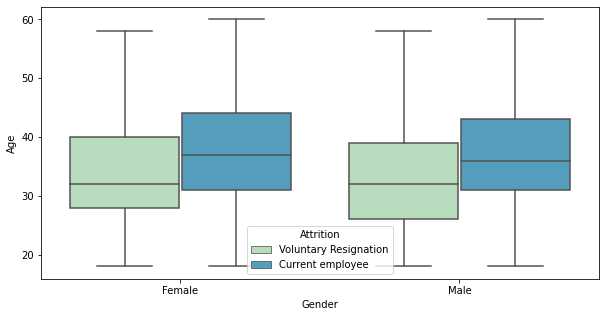

In [151]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Gender", y="Age", data=HR_data,hue='Attrition',palette='GnBu')

In [152]:
HR_data.groupby(['Gender','Attrition'])['Age'].mean().to_frame()

Age
Gender Attrition                       
Female Current employee       37.948644
       Voluntary Resignation  33.785814
Male   Current employee       37.279759
       Voluntary Resignation  33.607489

In [153]:
HR_data.groupby(['Gender','Attrition'])['Age'].median().to_frame()

Age
Gender Attrition                  
Female Current employee       37.0
       Voluntary Resignation  32.0
Male   Current employee       36.0
       Voluntary Resignation  32.0

# Inference
The attrition age for both the genders are equal.

From these we can conclude that gender does not have much effect in employee attrition.

# c)Department & Distance from home vs Attrition

<AxesSubplot:xlabel='Department', ylabel='DistanceFromHome'>

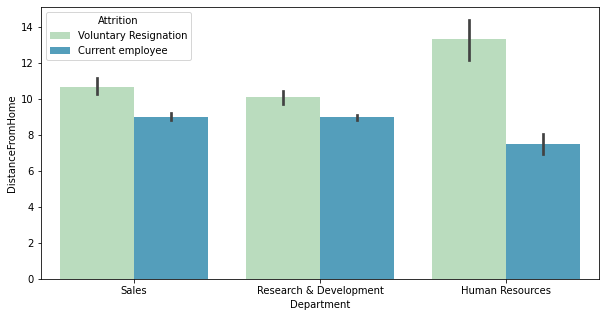

In [154]:
plt.figure(figsize=(10,5))
sns.barplot( x="Department", y='DistanceFromHome',data=HR_data,hue='Attrition',palette='GnBu')

In [155]:
HR_data.groupby(['Department','Attrition'])['DistanceFromHome'].mean().to_frame()

DistanceFromHome
Department             Attrition                              
Human Resources        Current employee               7.515188
                       Voluntary Resignation         13.323077
Research & Development Current employee               8.972742
                       Voluntary Resignation         10.079049
Sales                  Current employee               9.007056
                       Voluntary Resignation         10.682101

In [156]:
HR_data.groupby(['Department','Attrition'])['DistanceFromHome'].median().to_frame()

DistanceFromHome
Department             Attrition                              
Human Resources        Current employee                    5.0
                       Voluntary Resignation              13.0
Research & Development Current employee                    7.0
                       Voluntary Resignation               8.0
Sales                  Current employee                    7.0
                       Voluntary Resignation               9.0

# Inference
The employees whoes distance from home is large is leaving the company.

# d)Age & Monthly income vs Attrition

<Figure size 1152x432 with 0 Axes>

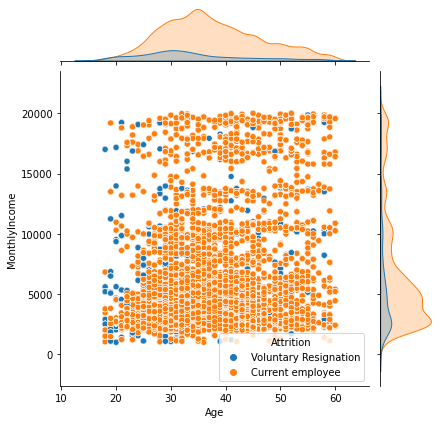

In [157]:
plt.figure(figsize = (16,6))
sns.jointplot(x='Age',y='MonthlyIncome',data=HR_data,hue='Attrition')
plt.show()

In [158]:
HR_data.groupby(['Attrition'])['Age'].mean().to_frame()

Age
Attrition                       
Current employee       37.548295
Voluntary Resignation  33.676645

In [159]:
HR_data.groupby(['Attrition'])['MonthlyIncome'].mean().to_frame()

MonthlyIncome
Attrition                           
Current employee         6663.573103
Voluntary Resignation    5670.316514

# Inference
Younger age employees with lower salary is leaving the company.

# e)Business travel & Monthly income vs Attrition

<AxesSubplot:xlabel='BusinessTravel', ylabel='MonthlyIncome'>

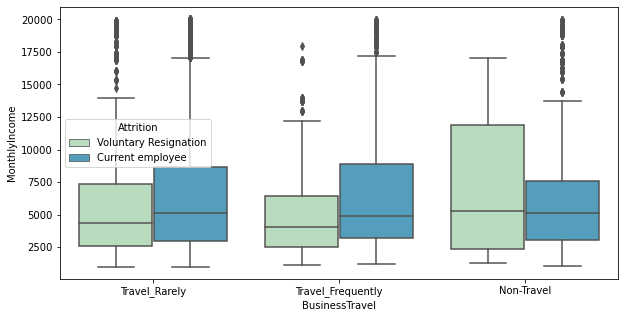

In [160]:
plt.figure(figsize=(10,5))
sns.boxplot(x='BusinessTravel',y='MonthlyIncome',data=HR_data,hue='Attrition',palette='GnBu')

In [161]:
HR_data.groupby(['BusinessTravel','Attrition'])['MonthlyIncome'].mean().to_frame()

MonthlyIncome
BusinessTravel    Attrition                           
Non-Travel        Current employee         6372.973660
                  Voluntary Resignation    7523.141361
Travel_Frequently Current employee         6634.292771
                  Voluntary Resignation    5062.560147
Travel_Rarely     Current employee         6715.806377
                  Voluntary Resignation    5799.047855

In [162]:
HR_data.groupby(['BusinessTravel','Attrition'])['MonthlyIncome'].median().to_frame()

MonthlyIncome
BusinessTravel    Attrition                           
Non-Travel        Current employee              5093.0
                  Voluntary Resignation         5304.0
Travel_Frequently Current employee              4898.0
                  Voluntary Resignation         4084.0
Travel_Rarely     Current employee              5087.0
                  Voluntary Resignation         4382.0

# Inference
The employees who travel frequently with lower salary have chance of leaving the company.

# f)Job stisfaction & Monthly income vs Attrition

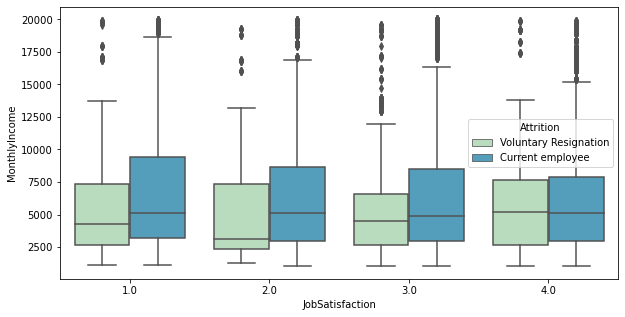

In [163]:
plt.subplots(figsize=(10,5))
sns.boxplot(x='JobSatisfaction',y='MonthlyIncome',data=HR_data,hue='Attrition',palette='GnBu')
plt.show()

In [164]:
HR_data.groupby(['JobSatisfaction','Attrition'])['MonthlyIncome'].mean().to_frame()

MonthlyIncome
JobSatisfaction Attrition                           
1.0             Current employee         6829.714747
                Voluntary Resignation    5528.544118
2.0             Current employee         6781.204678
                Voluntary Resignation    5259.923410
3.0             Current employee         6618.245516
                Voluntary Resignation    5733.739539
4.0             Current employee         6538.307461
                Voluntary Resignation    6027.187043

# Inference
The employees with low job satisfaction & low payment have chance of leaving the company.

# g)Years since last promotion & Monthly income vs Job level

<Figure size 1152x432 with 0 Axes>

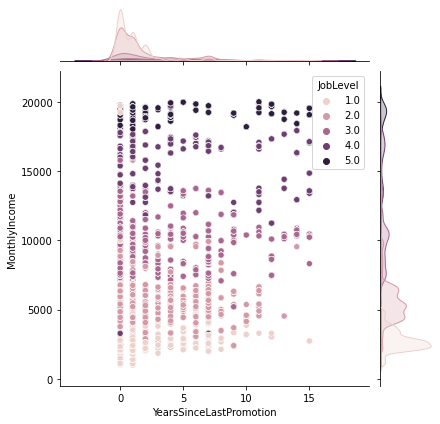

In [165]:
plt.figure(figsize = (16,6))
sns.jointplot(x='YearsSinceLastPromotion',y='MonthlyIncome',data=HR_data,hue='JobLevel')
plt.show()

In [166]:
HR_data.groupby(['JobLevel'])['MonthlyIncome'].mean().to_frame()

MonthlyIncome
JobLevel               
1.0         2817.804423
2.0         5506.260620
3.0         9811.337846
4.0        15459.941627
5.0        19051.022894

In [167]:
HR_data.groupby(['JobLevel'])['YearsSinceLastPromotion'].mean().to_frame()

YearsSinceLastPromotion
JobLevel                         
1.0                      1.212111
2.0                      1.879723
3.0                      3.307227
4.0                      4.792920
5.0                      4.588289

# Inference
The employees with high job level & higher number of promotions have greater salary.

# h)Education field & Performance rating vs Attrition

<AxesSubplot:xlabel='EducationField', ylabel='PerformanceRating'>

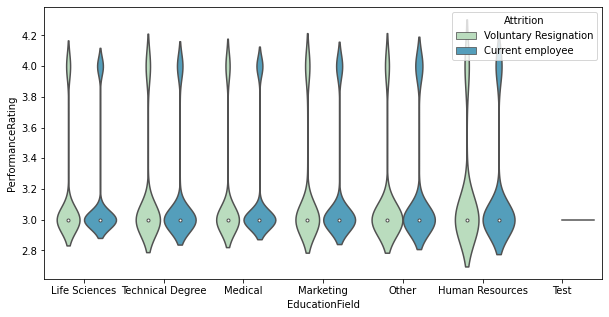

In [168]:
plt.figure(figsize=(10,5))
sns.violinplot( x="EducationField", y='PerformanceRating',data=HR_data,hue='Attrition',palette='GnBu')

In [169]:
HR_data.groupby(['EducationField','Attrition'])['PerformanceRating'].mean().to_frame()

PerformanceRating
EducationField   Attrition                               
Human Resources  Current employee                3.157609
                 Voluntary Resignation           3.153846
Life Sciences    Current employee                3.152985
                 Voluntary Resignation           3.147612
Marketing        Current employee                3.158896
                 Voluntary Resignation           3.154545
Medical          Current employee                3.156863
                 Voluntary Resignation           3.154955
Other            Current employee                3.182239
                 Voluntary Resignation           3.113537
Technical Degree Current employee                3.147004
                 Voluntary Resignation           3.152688
Test             Current employee                3.000000

In [170]:
HR_data.groupby(['EducationField','Attrition'])['PerformanceRating'].median().to_frame()

PerformanceRating
EducationField   Attrition                               
Human Resources  Current employee                     3.0
                 Voluntary Resignation                3.0
Life Sciences    Current employee                     3.0
                 Voluntary Resignation                3.0
Marketing        Current employee                     3.0
                 Voluntary Resignation                3.0
Medical          Current employee                     3.0
                 Voluntary Resignation                3.0
Other            Current employee                     3.0
                 Voluntary Resignation                3.0
Technical Degree Current employee                     3.0
                 Voluntary Resignation                3.0
Test             Current employee                     3.0

# Inference 
The performance rating for the currently working & resigned employees in each education field is almost same.

# 2)Data Pre-Processing

The steps of preprocessing include checking for null value and filling it.We have checked it & a total of 1.5% of null values are present in our dataset.Now for filling the null values we need to check, if there is any outliers present in numerical columns.If there is outlier we need to fill the missing values by using median if not fill it with mean.For the categorical columns & discrete columns we use mode to fill missing values.

# 2.1)Droping not useful column

We notice that 'EmployeeCount', 'Over18' and 'StandardHours' have only one unique values. This features aren't useful for us, So we are going to drop those columns.

In [171]:
HR_data.drop(['EmployeeCount','Over18','StandardHours'], axis="columns", inplace=True)

In [172]:
HR_data.shape

(23436, 32)

# 2.2)Feature Engineering

Adding some columns to our data.

In [173]:
HR_data['TotalSatisfaction_mean'] = (HR_data['RelationshipSatisfaction']  + HR_data['EnvironmentSatisfaction'] +HR_data['JobSatisfaction'] + HR_data['JobInvolvement'] + HR_data['WorkLifeBalance'])/5
HR_data['Stability'] = HR_data['YearsInCurrentRole'] / HR_data['YearsAtCompany']
HR_data['Income_YearsComp'] = HR_data['MonthlyIncome'] /HR_data['YearsAtCompany']
HR_data['Fidelity'] = (HR_data['NumCompaniesWorked']) / HR_data['TotalWorkingYears']

In [174]:
HR_data.shape

(23436, 36)

# 2.3)Feature Reduction

From the correlation heat map we observed that the columns 'DailyRate','HourlyRate'& 'MonthlyRate' are barely correlated with anything.So we can drop these columns.And from the multivariate graph we can notice that 'Gender' doesnot have much influence in employeee attrition,so we can drop that column.

In [175]:
HR_data.drop(['DailyRate','HourlyRate','MonthlyRate','Gender'], axis="columns", inplace=True)

In [176]:
HR_data.shape

(23436, 32)

In [177]:
HR_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Employee Source',
       'TotalSatisfaction_mean', 'Stability', 'Income_YearsComp', 'Fidelity'],
      dtype='object')

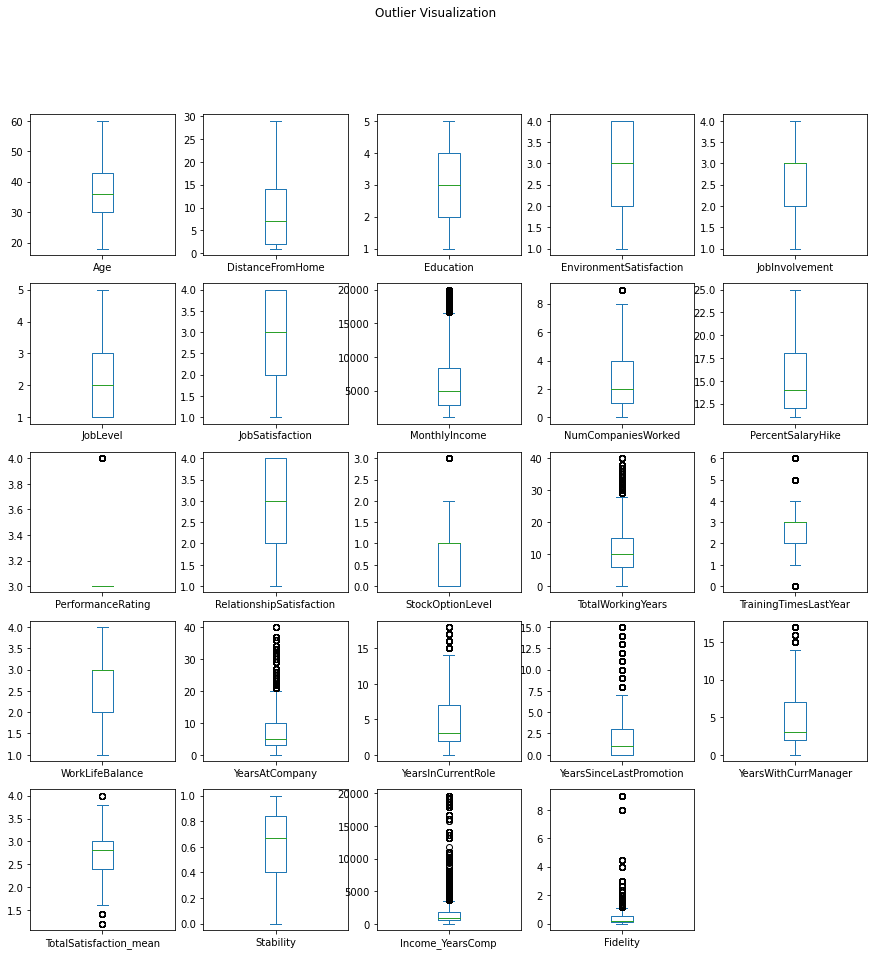

In [178]:
#outlier visualization 
HR_data.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,15),title='Outlier Visualization')
plt.show()

# 2.4)Null value Handling

We have checked for the outliers and the continues columns:'Monthly income', 'NumCompaniesWorked', 'TotalWorkingYears','YearsAtCompany', 'Income_YearsComp' are having outliers, so we are filling null vaues in these columns using median.

In [179]:
for i in ['MonthlyIncome','NumCompaniesWorked','TotalWorkingYears','YearsAtCompany','Fidelity', 'Income_YearsComp']:
 HR_data[i]=HR_data[i].fillna(HR_data[i].median())

The other numerical columns which doesnot contain outliers are:'Age', 'DistanceFromHome' ,'Stability','PercentSalaryHike' can be filled using mean.

In [180]:
for i in ['Age','DistanceFromHome','Stability','PercentSalaryHike']:
 HR_data[i]=HR_data[i].fillna(HR_data[i].mean()) 

The categorical columns:'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'JobRole','MaritalStatus', 'OverTime','EnvironmentSatisfaction', 'Employee Source' & the discrete columns:'PerformanceRating','StockOptionLevel','Education','JobLevel','WorkLifeBalance','RelationshipSatisfaction','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','TotalSatisfaction_mean','YearsWithCurrManager','YearsSinceLastPromotion','YearsInCurrentRole','TrainngTimesLastYear','NumCompaniesWorked' can filled by mode.

In [181]:
for i in ['BusinessTravel','Department','EnvironmentSatisfaction','TotalSatisfaction_mean','EducationField','JobRole','MaritalStatus','OverTime','Employee Source','Attrition','PerformanceRating','StockOptionLevel','Education','JobLevel','WorkLifeBalance','RelationshipSatisfaction','JobInvolvement','JobSatisfaction','YearsWithCurrManager','YearsSinceLastPromotion','YearsInCurrentRole','TrainingTimesLastYear']:
 HR_data[i]=HR_data[i].fillna(HR_data[i].mode()[0])

In [182]:
HR_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Employee Source             0
TotalSatisfaction_mean      0
Stability                   0
Income_YearsComp            0
Fidelity                    0
dtype: int64

Hence the null values are filled.

# 2.5)Outlier Handling

In [183]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [184]:
lr,ur=remove_outlier(HR_data["MonthlyIncome"])
HR_data["MonthlyIncome"]=np.where(HR_data["MonthlyIncome"]>ur,ur,HR_data["MonthlyIncome"])
HR_data["MonthlyIncome"]=np.where(HR_data["MonthlyIncome"]<lr,lr,HR_data["MonthlyIncome"])

Text(0.5, 1.0, 'Box plot of Monthly income')

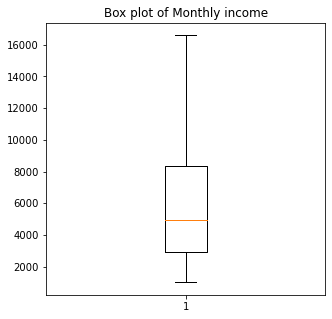

In [185]:
plt.boxplot(HR_data['MonthlyIncome'])
plt.title('Box plot of Monthly income')

In [186]:
lr,ur=remove_outlier(HR_data["TotalWorkingYears"])
HR_data["TotalWorkingYears"]=np.where(HR_data["TotalWorkingYears"]>ur,ur,HR_data["TotalWorkingYears"])
HR_data["TotalWorkingYears"]=np.where(HR_data["TotalWorkingYears"]<lr,lr,HR_data["TotalWorkingYears"])

Text(0.5, 1.0, 'Box plot of Total working years')

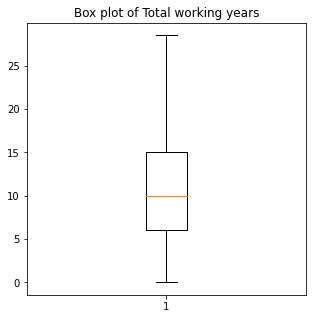

In [187]:
plt.boxplot(HR_data['TotalWorkingYears'])
plt.title('Box plot of Total working years')

In [188]:
lr,ur=remove_outlier(HR_data["YearsAtCompany"])
HR_data["YearsAtCompany"]=np.where(HR_data["YearsAtCompany"]>ur,ur,HR_data["YearsAtCompany"])
HR_data["YearsAtCompany"]=np.where(HR_data["YearsAtCompany"]<lr,lr,HR_data["YearsAtCompany"])

Text(0.5, 1.0, 'Box plot of years at company')

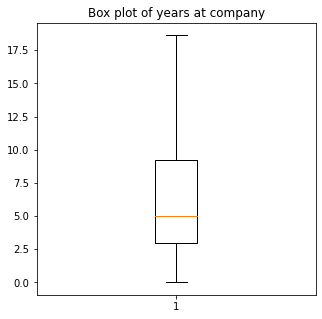

In [189]:
plt.boxplot(HR_data['YearsAtCompany'])
plt.title('Box plot of years at company')

In [190]:
lr,ur=remove_outlier(HR_data["Income_YearsComp"])
HR_data["Income_YearsComp"]=np.where(HR_data["Income_YearsComp"]>ur,ur,HR_data["Income_YearsComp"])
HR_data["Income_YearsComp"]=np.where(HR_data["Income_YearsComp"]<lr,lr,HR_data["Income_YearsComp"])

Text(0.5, 1.0, 'Box plot of income_yearscompany')

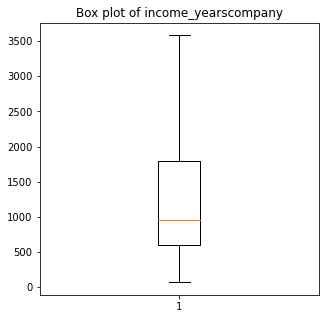

In [191]:
plt.boxplot(HR_data['Income_YearsComp'])
plt.title('Box plot of income_yearscompany')

In [192]:
lr,ur=remove_outlier(HR_data["Fidelity"])
HR_data["Fidelity"]=np.where(HR_data["Fidelity"]>ur,ur,HR_data["Fidelity"])
HR_data["Fidelity"]=np.where(HR_data["Fidelity"]<lr,lr,HR_data["Fidelity"])

Text(0.5, 1.0, 'Box plot of Fidelity')

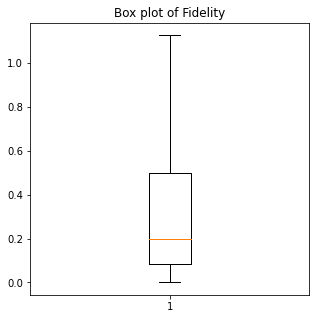

In [193]:
plt.boxplot(HR_data['Fidelity'])
plt.title('Box plot of Fidelity')

Hence the outliers are removed.

Before feeding our data into a ML model we first need to prepare the data. This includes encoding all the categorical features, as the model expects the features to be in numerical form. Also for better performance we will do the feature scaling ie bringing all the features onto the same scale by using the StandardScaler provided in the scikit library.

In [194]:
#Data frame
HR_data=pd.DataFrame(HR_data)

In [195]:
#Dependent column
Target_col=pd.DataFrame(HR_data,columns=['Attrition'])

In [196]:
Target_col

Attrition
0      Voluntary Resignation
1      Voluntary Resignation
2      Voluntary Resignation
3      Voluntary Resignation
4      Voluntary Resignation
...                      ...
23431       Current employee
23432       Current employee
23433  Voluntary Resignation
23434       Current employee
23435       Current employee

[23436 rows x 1 columns]

In [197]:
#Categorical columns
Cat_cols=pd.DataFrame(HR_data,columns=["BusinessTravel","Department","EducationField","JobRole","MaritalStatus","OverTime","Employee Source"])
Cat_cols

BusinessTravel              Department EducationField  \
0          Travel_Rarely                   Sales  Life Sciences   
1          Travel_Rarely                   Sales  Life Sciences   
2          Travel_Rarely                   Sales  Life Sciences   
3          Travel_Rarely                   Sales  Life Sciences   
4          Travel_Rarely                   Sales  Life Sciences   
...                  ...                     ...            ...   
23431      Travel_Rarely  Research & Development        Medical   
23432      Travel_Rarely  Research & Development  Life Sciences   
23433  Travel_Frequently  Research & Development  Life Sciences   
23434      Travel_Rarely  Research & Development        Medical   
23435         Non-Travel  Research & Development  Life Sciences   

                         JobRole MaritalStatus OverTime  Employee Source  
0                Sales Executive        Single      Yes         Referral  
1                Sales Executive        Single      Yes         Referral  
2                Sales Executive        Single      Yes         Referral  
3                Sales Executive        Single      Yes         Referral  
4                Sales Executive        Single      Yes         Referral  
...                          ...           ...      ...              ...  
23431  Healthcare Representative        Single       No  Company Website  
23432  Healthcare Representative      Divorced       No  Company Website  
23433            Sales Executive       Married       No           Adzuna  
23434                    Manager        Single       No           Indeed  
23435  Healthcare Representative      Divorced      Yes      Recruit.net  

[23436 rows x 7 columns]

In [198]:
Cat_cols.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'JobRole',
       'MaritalStatus', 'OverTime', 'Employee Source'],
      dtype='object')

In [199]:
# Continues numeric columns
Continues_numeric_col=pd.DataFrame(HR_data,columns=['Age','DistanceFromHome','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','Stability','Fidelity','Income_YearsComp'])
Continues_numeric_col

Age  DistanceFromHome  MonthlyIncome  PercentSalaryHike  \
0      41.000000               1.0         5993.0               11.0   
1      41.000000               1.0         5993.0               11.0   
2      41.000000               1.0         5993.0               11.0   
3      41.000000               1.0         5993.0               11.0   
4      41.000000               1.0         5993.0               11.0   
...          ...               ...            ...                ...   
23431  60.000000               1.0        10883.0               20.0   
23432  60.000000               1.0        10883.0               20.0   
23433  36.936671               1.0         5301.0               15.0   
23434  36.936671               5.0        11631.0               12.0   
23435  36.936671               8.0         4069.0               18.0   

       TotalWorkingYears  YearsAtCompany  Stability  Fidelity  \
0                    8.0           6.000   0.666667  1.000000   
1                    8.0           6.000   0.666667  0.500000   
2                    8.0           6.000   0.666667  1.000000   
3                    8.0           6.000   0.666667  0.500000   
4                    8.0           6.000   0.666667  1.000000   
...                  ...             ...        ...       ...   
23431               20.0          18.625   0.350000  0.150000   
23432               19.0           1.000   0.000000  0.000000   
23433                4.0           2.000   0.500000  1.000000   
23434               14.0          11.000   0.909091  0.142857   
23435                8.0           2.000   1.000000  0.375000   

       Income_YearsComp  
0            998.833333  
1            998.833333  
2            998.833333  
3            998.833333  
4            998.833333  
...                 ...  
23431        544.150000  
23432       3581.375000  
23433       2650.500000  
23434       1057.363636  
23435       2034.500000  

[23436 rows x 9 columns]

In [200]:
#Discrete numeric columns
Discrete_numeric_col=pd.DataFrame(HR_data,columns=['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','NumCompaniesWorked','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','TotalSatisfaction_mean'])
Discrete_numeric_col

Education  EnvironmentSatisfaction  JobInvolvement  JobLevel  \
0            2.0                      2.0             3.0       2.0   
1            2.0                      2.0             3.0       2.0   
2            2.0                      2.0             3.0       2.0   
3            2.0                      2.0             3.0       2.0   
4            2.0                      2.0             3.0       2.0   
...          ...                      ...             ...       ...   
23431        4.0                      3.0             1.0       3.0   
23432        4.0                      3.0             1.0       3.0   
23433        3.0                      4.0             3.0       2.0   
23434        3.0                      3.0             2.0       3.0   
23435        2.0                      4.0             3.0       2.0   

       JobSatisfaction  NumCompaniesWorked  PerformanceRating  \
0                  4.0                 8.0                3.0   
1                  4.0                 4.0                3.0   
2                  4.0                 8.0                3.0   
3                  4.0                 4.0                3.0   
4                  4.0                 8.0                3.0   
...                ...                 ...                ...   
23431              4.0                 3.0                4.0   
23432              4.0                 0.0                4.0   
23433              3.0                 4.0                3.0   
23434              1.0                 2.0                3.0   
23435              4.0                 3.0                3.0   

       RelationshipSatisfaction  StockOptionLevel  TrainingTimesLastYear  \
0                           1.0               0.0                    0.0   
1                           1.0               0.0                    0.0   
2                           1.0               0.0                    0.0   
3                           1.0               0.0                    0.0   
4                           1.0               0.0                    0.0   
...                         ...               ...                    ...   
23431                       3.0               1.0                    2.0   
23432                       3.0               1.0                    2.0   
23433                       3.0               2.0                    2.0   
23434                       4.0               0.0                    6.0   
23435                       3.0               0.0                    2.0   

       WorkLifeBalance  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  1.0                 4.0                      0.0   
1                  1.0                 4.0                      0.0   
2                  1.0                 4.0                      0.0   
3                  1.0                 4.0                      0.0   
4                  1.0                 4.0                      0.0   
...                ...                 ...                      ...   
23431              3.0                 7.0                      2.0   
23432              4.0                 0.0                      0.0   
23433              2.0                 1.0                      2.0   
23434              3.0                10.0                      5.0   
23435              3.0                 2.0                      2.0   

       YearsWithCurrManager  TotalSatisfaction_mean  
0                       5.0                     2.2  
1                       5.0                     2.2  
2                       5.0                     2.2  
3                       5.0                     2.2  
4                       5.0                     2.2  
...                     ...                     ...  
23431                  13.0                     2.8  
23432                   0.0                     3.0  
23433                   2.0                     3.0  
23434                   8.0                     2.6  
23435        

In [201]:
Discrete_numeric_col.columns

Index(['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'NumCompaniesWorked', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'TotalSatisfaction_mean'],
      dtype='object')

# 2.6)Encoding

We use Ordinal encoder to encode categorical columns & Label encoder to encode target column.

In [202]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
o=OrdinalEncoder()
l=LabelEncoder()

In [203]:
#Ordinal encoding
for i in Cat_cols.columns:
    if Cat_cols[i].dtypes=='O':
     Cat_cols[i]=o.fit_transform(Cat_cols[i].values.reshape(-1,1))

In [204]:
Cat_cols.head()

BusinessTravel  Department  EducationField  JobRole  MaritalStatus  \
0             2.0         2.0             1.0      7.0            2.0   
1             2.0         2.0             1.0      7.0            2.0   
2             2.0         2.0             1.0      7.0            2.0   
3             2.0         2.0             1.0      7.0            2.0   
4             2.0         2.0             1.0      7.0            2.0   

   OverTime  Employee Source  
0       1.0              7.0  
1       1.0              7.0  
2       1.0              7.0  
3       1.0              7.0  
4       1.0              7.0

In [205]:
#Label encoding
Target_col['Attrition']=l.fit_transform(Target_col['Attrition'])

In [206]:
Target_col.head()

Attrition
0          1
1          1
2          1
3          1
4          1

In [207]:
#Model Creation
x=pd.concat([Continues_numeric_col,Discrete_numeric_col,Cat_cols],axis=1)
y=Target_col

In [208]:
x.head(2)

Age  DistanceFromHome  MonthlyIncome  PercentSalaryHike  \
0  41.0               1.0         5993.0               11.0   
1  41.0               1.0         5993.0               11.0   

   TotalWorkingYears  YearsAtCompany  Stability  Fidelity  Income_YearsComp  \
0                8.0             6.0   0.666667       1.0        998.833333   
1                8.0             6.0   0.666667       0.5        998.833333   

   Education  ...  YearsSinceLastPromotion  YearsWithCurrManager  \
0        2.0  ...                      0.0                   5.0   
1        2.0  ...                      0.0                   5.0   

   TotalSatisfaction_mean  BusinessTravel  Department  EducationField  \
0                     2.2             2.0         2.0             1.0   
1                     2.2             2.0         2.0             1.0   

   JobRole  MaritalStatus  OverTime  Employee Source  
0      7.0            2.0       1.0              7.0  
1      7.0            2.0       1.0              7.0  

[2 rows x 31 columns]

In [209]:
y.head(2)

Attrition
0          1
1          1

In [210]:
#imbalanced
y.Attrition.value_counts()

0    19727
1     3709
Name: Attrition, dtype: int64

# 2.7)Balancing Data

The data can be balanced by Over-sampling method or by Under-sampling method.
Oversampling focuses on increasing minority class samples.
We can also duplicate the examples to increase the minority class samples. Although it balances the data, it does not provide additional information to the classification model.
Therefore synthesizing new examples using an appropriate technique is necessary. Here we use SMOTE to balance our data.
SMOTE stands for Synthetic Minority Oversampling Technique.
SMOTE selects the nearest examples in the feature space, then draws a line between them, and at a point along the line, it creates a new sample.

In [211]:
from collections import Counter

In [212]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [213]:
from imblearn.over_sampling import SMOTE

smote_object = SMOTE()
print('Imbalance data:',Counter(y))
x_smote , y_smote = smote_object.fit_resample(x,y)
print('balance data:',Counter(y_smote))

Imbalance data: Counter({'Attrition': 1})
balance data: Counter({'Attrition': 1})


In [214]:
y_smote

Attrition
0              1
1              1
2              1
3              1
4              1
...          ...
39449          1
39450          1
39451          1
39452          1
39453          1

[39454 rows x 1 columns]

In [215]:
y_smote.value_counts()

Attrition
0            19727
1            19727
dtype: int64

Hence we balance our data.

In [216]:
x_smote

Age  DistanceFromHome  MonthlyIncome  PercentSalaryHike  \
0      41.000000          1.000000         5993.0               11.0   
1      41.000000          1.000000         5993.0               11.0   
2      41.000000          1.000000         5993.0               11.0   
3      41.000000          1.000000         5993.0               11.0   
4      41.000000          1.000000         5993.0               11.0   
...          ...               ...            ...                ...   
39449  19.000000         10.000000         1859.0               25.0   
39450  33.251821          7.900728         5204.0               11.0   
39451  53.000000         24.000000         6877.0               24.0   
39452  32.000000          2.000000         9907.0               12.0   
39453  34.000000          6.000000         2313.0               20.0   

       TotalWorkingYears  YearsAtCompany  Stability  Fidelity  \
0                    8.0             6.0   0.666667  1.000000   
1                    8.0             6.0   0.666667  0.500000   
2                    8.0             6.0   0.666667  1.000000   
3                    8.0             6.0   0.666667  0.500000   
4                    8.0             6.0   0.666667  1.000000   
...                  ...             ...        ...       ...   
39449                1.0             1.0   1.000000  1.000000   
39450                1.0             1.0   0.000000  1.125000   
39451               12.0             0.0   0.595603  0.323290   
39452                7.0             2.0   1.000000  1.000000   
39453                5.0             2.0   1.000000  0.674234   

       Income_YearsComp  Education  ...  YearsSinceLastPromotion  \
0            998.833333   2.000000  ...                      0.0   
1            998.833333   2.000000  ...                      0.0   
2            998.833333   2.000000  ...                      0.0   
3            998.833333   2.000000  ...                      0.0   
4            998.833333   2.000000  ...                      0.0   
...                 ...        ...  ...                      ...   
39449       1859.000000   3.000000  ...                      0.0   
39450       3581.375000   2.725182  ...                      0.0   
39451       3581.375000   4.000000  ...                      0.0   
39452       3581.375000   4.000000  ...                      2.0   
39453       1156.500000   1.000000  ...                      2.0   

       YearsWithCurrManager  TotalSatisfaction_mean  BusinessTravel  \
0                       5.0                2.200000        2.000000   
1                       5.0                2.200000        2.000000   
2                       5.0                2.200000        2.000000   
3                       5.0                2.200000        2.000000   
4                       5.0                2.200000        2.000000   
...                     ...                     ...             ...   
39449                   0.0                2.400000        0.000000   
39450                   0.0                3.345036        1.725182   
39451                   0.0                2.600000        2.000000   
39452                   2.0                2.400000        2.000000   
39453                   2.0                2.400000        2.000000   

       Department  EducationField  JobRole  MaritalStatus  OverTime  \
0             2.0        1.000000      7.0            2.0       1.0   
1             2.0        1.000000      7.0            2.0       1.0   
2             2.0        1.000000      7.0            2.0       1.0   
3             2.0        1.000000      7.0            2.0       1.0   
4             2.0        1.000000      7.0            2.0       1.0   
...           ...             ...      ...            ...       ...   
39449         1.0        3.000000      6.0            2.0       1.0   
39450         1.0        3.000000      1.0            1.0       0.0   
39451         2.0        2.120525      4.0            2.0 

In [217]:
x_smote.columns

Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'PercentSalaryHike',
       'TotalWorkingYears', 'YearsAtCompany', 'Stability', 'Fidelity',
       'Income_YearsComp', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'TotalSatisfaction_mean', 'BusinessTravel', 'Department',
       'EducationField', 'JobRole', 'MaritalStatus', 'OverTime',
       'Employee Source'],
      dtype='object')

# 2.8)Standardization

In [218]:
Continues_numeric_col=pd.DataFrame(x_smote,columns=['Age','DistanceFromHome','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','Stability','Fidelity','Income_YearsComp'])
Continues_numeric_col

Age  DistanceFromHome  MonthlyIncome  PercentSalaryHike  \
0      41.000000          1.000000         5993.0               11.0   
1      41.000000          1.000000         5993.0               11.0   
2      41.000000          1.000000         5993.0               11.0   
3      41.000000          1.000000         5993.0               11.0   
4      41.000000          1.000000         5993.0               11.0   
...          ...               ...            ...                ...   
39449  19.000000         10.000000         1859.0               25.0   
39450  33.251821          7.900728         5204.0               11.0   
39451  53.000000         24.000000         6877.0               24.0   
39452  32.000000          2.000000         9907.0               12.0   
39453  34.000000          6.000000         2313.0               20.0   

       TotalWorkingYears  YearsAtCompany  Stability  Fidelity  \
0                    8.0             6.0   0.666667  1.000000   
1                    8.0             6.0   0.666667  0.500000   
2                    8.0             6.0   0.666667  1.000000   
3                    8.0             6.0   0.666667  0.500000   
4                    8.0             6.0   0.666667  1.000000   
...                  ...             ...        ...       ...   
39449                1.0             1.0   1.000000  1.000000   
39450                1.0             1.0   0.000000  1.125000   
39451               12.0             0.0   0.595603  0.323290   
39452                7.0             2.0   1.000000  1.000000   
39453                5.0             2.0   1.000000  0.674234   

       Income_YearsComp  
0            998.833333  
1            998.833333  
2            998.833333  
3            998.833333  
4            998.833333  
...                 ...  
39449       1859.000000  
39450       3581.375000  
39451       3581.375000  
39452       3581.375000  
39453       1156.500000  

[39454 rows x 9 columns]

In [219]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(Continues_numeric_col)
scaled=pd.DataFrame(scaled,columns=Continues_numeric_col.columns)

scaled.describe()

Age  DistanceFromHome  MonthlyIncome  PercentSalaryHike  \
count  3.945400e+04      3.945400e+04   3.945400e+04       3.945400e+04   
mean   1.466350e-14      1.385111e-15  -2.467766e-16      -2.372974e-15   
std    1.000013e+00      1.000013e+00   1.000013e+00       1.000013e+00   
min   -1.853657e+00     -1.052702e+00  -1.197059e+00      -1.124853e+00   
25%   -6.975475e-01     -9.313165e-01  -7.854308e-01      -8.530752e-01   
50%   -1.720430e-01     -3.243879e-01  -3.137094e-01      -3.095199e-01   
75%    6.687641e-01      6.466979e-01   4.055115e-01       7.775907e-01   
max    2.560580e+00      2.346098e+00   2.502249e+00       2.680034e+00   

       TotalWorkingYears  YearsAtCompany     Stability      Fidelity  \
count       3.945400e+04    3.945400e+04  3.945400e+04  3.945400e+04   
mean       -1.332712e-15    1.338143e-15 -2.288904e-15 -3.537386e-15   
std         1.000013e+00    1.000013e+00  1.000013e+00  1.000013e+00   
min        -1.441984e+00   -1.250448e+00 -1.789683e+00 -1.039669e+00   
25%        -6.171029e-01   -8.546560e-01 -5.552861e-01 -7.623976e-01   
50%        -2.046625e-01   -2.609688e-01  2.676449e-01 -3.555452e-01   
75%         4.827381e-01    5.306143e-01  7.352193e-01  5.771833e-01   
max         2.476200e+00    2.435361e+00  1.296309e+00  2.079629e+00   

       Income_YearsComp  
count      3.945400e+04  
mean      -1.362704e-15  
std        1.000013e+00  
min       -1.266405e+00  
25%       -7.375044e-01  
50%       -3.823204e-01  
75%        5.408772e-01  
max        2.128440e+00

Using StandardScaler we standardize continues numeric columns.

In [220]:
Discrete_numeric_col=pd.DataFrame(x_smote,columns=['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','NumCompaniesWorked','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','TotalSatisfaction_mean'])
Discrete_numeric_col

Education  EnvironmentSatisfaction  JobInvolvement  JobLevel  \
0       2.000000                 2.000000             3.0       2.0   
1       2.000000                 2.000000             3.0       2.0   
2       2.000000                 2.000000             3.0       2.0   
3       2.000000                 2.000000             3.0       2.0   
4       2.000000                 2.000000             3.0       2.0   
...          ...                      ...             ...       ...   
39449   3.000000                 2.000000             2.0       1.0   
39450   2.725182                 3.725182             2.0       2.0   
39451   4.000000                 3.000000             2.0       2.0   
39452   4.000000                 3.000000             2.0       2.0   
39453   1.000000                 3.000000             2.0       1.0   

       JobSatisfaction  NumCompaniesWorked  PerformanceRating  \
0                  4.0            8.000000                3.0   
1                  4.0            4.000000                3.0   
2                  4.0            8.000000                3.0   
3                  4.0            4.000000                3.0   
4                  4.0            8.000000                3.0   
...                ...                 ...                ...   
39449              2.0            1.000000                4.0   
39450              4.0            8.000000                3.0   
39451              4.0            3.879475                3.0   
39452              2.0            7.000000                3.0   
39453              2.0            3.371172                4.0   

       RelationshipSatisfaction  StockOptionLevel  TrainingTimesLastYear  \
0                           1.0               0.0                    0.0   
1                           1.0               0.0                    0.0   
2                           1.0               0.0                    0.0   
3                           1.0               0.0                    0.0   
4                           1.0               0.0                    0.0   
...                         ...               ...                    ...   
39449                       2.0               0.0                    2.0   
39450                       4.0               1.0                    2.0   
39451                       2.0               0.0                    4.0   
39452                       3.0               0.0                    3.0   
39453                       2.0               0.0                    0.0   

       WorkLifeBalance  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  1.0                 4.0                      0.0   
1                  1.0                 4.0                      0.0   
2                  1.0                 4.0                      0.0   
3                  1.0                 4.0                      0.0   
4                  1.0                 4.0                      0.0   
...                ...                 ...                      ...   
39449              4.0                 1.0                      0.0   
39450              3.0                 0.0                      0.0   
39451              2.0                 0.0                      0.0   
39452              2.0                 2.0                      2.0   
39453              3.0                 2.0                      2.0   

       YearsWithCurrManager  TotalSatisfaction_mean  
0                       5.0                2.200000  
1                       5.0                2.200000  
2                       5.0                2.200000  
3                       5.0                2.200000  
4                       5.0                2.200000  
...                     ...                     ...  
39449                   0.0                2.400000  
39450                   0.0                3.345036  
39451                   0.0                2.600000  
39452                   2.0                2.400000  
39453        

In [221]:
Cat_cols=pd.DataFrame(x_smote,columns=["BusinessTravel","Department","EducationField","JobRole","MaritalStatus","OverTime","Employee Source"])
Cat_cols

BusinessTravel  Department  EducationField  JobRole  MaritalStatus  \
0            2.000000         2.0        1.000000      7.0            2.0   
1            2.000000         2.0        1.000000      7.0            2.0   
2            2.000000         2.0        1.000000      7.0            2.0   
3            2.000000         2.0        1.000000      7.0            2.0   
4            2.000000         2.0        1.000000      7.0            2.0   
...               ...         ...             ...      ...            ...   
39449        0.000000         1.0        3.000000      6.0            2.0   
39450        1.725182         1.0        3.000000      1.0            1.0   
39451        2.000000         2.0        2.120525      4.0            2.0   
39452        2.000000         2.0        2.000000      7.0            2.0   
39453        2.000000         1.0        2.371172      6.0            2.0   

       OverTime  Employee Source  
0           1.0         7.000000  
1           1.0         7.000000  
2           1.0         7.000000  
3           1.0         7.000000  
4           1.0         7.000000  
...         ...              ...  
39449       1.0         8.000000  
39450       0.0         1.824454  
39451       1.0         0.000000  
39452       1.0         5.000000  
39453       1.0         1.000000  

[39454 rows x 7 columns]

In [222]:
x_smote=pd.concat([scaled,Discrete_numeric_col,Cat_cols],axis=1)

In [223]:
x_smote.head()

Age  DistanceFromHome  MonthlyIncome  PercentSalaryHike  \
0  0.563663         -1.052702      -0.013242          -1.124853   
1  0.563663         -1.052702      -0.013242          -1.124853   
2  0.563663         -1.052702      -0.013242          -1.124853   
3  0.563663         -1.052702      -0.013242          -1.124853   
4  0.563663         -1.052702      -0.013242          -1.124853   

   TotalWorkingYears  YearsAtCompany  Stability  Fidelity  Income_YearsComp  \
0          -0.342143       -0.063073   0.267645  1.733041         -0.365634   
1          -0.342143       -0.063073   0.267645  0.346686         -0.365634   
2          -0.342143       -0.063073   0.267645  1.733041         -0.365634   
3          -0.342143       -0.063073   0.267645  0.346686         -0.365634   
4          -0.342143       -0.063073   0.267645  1.733041         -0.365634   

   Education  ...  YearsSinceLastPromotion  YearsWithCurrManager  \
0        2.0  ...                      0.0                   5.0   
1        2.0  ...                      0.0                   5.0   
2        2.0  ...                      0.0                   5.0   
3        2.0  ...                      0.0                   5.0   
4        2.0  ...                      0.0                   5.0   

   TotalSatisfaction_mean  BusinessTravel  Department  EducationField  \
0                     2.2             2.0         2.0             1.0   
1                     2.2             2.0         2.0             1.0   
2                     2.2             2.0         2.0             1.0   
3                     2.2             2.0         2.0             1.0   
4                     2.2             2.0         2.0             1.0   

   JobRole  MaritalStatus  OverTime  Employee Source  
0      7.0            2.0       1.0              7.0  
1      7.0            2.0       1.0              7.0  
2      7.0            2.0       1.0              7.0  
3      7.0            2.0       1.0              7.0  
4      7.0            2.0       1.0              7.0  

[5 rows x 31 columns]

Here we joined the standardized continues numeric column(scaled),discrete numeric column and categorical columns.

In [224]:
y_smote.head()

Attrition
0          1
1          1
2          1
3          1
4          1

# 3)Modelling

In [225]:
#Splitting the data into train & test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x_smote,y_smote,random_state=42,test_size=0.3)

In [226]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(27617, 31) (27617, 1)
(11837, 31) (11837, 1)


In [227]:
print(y_train.value_counts(),'\n', y_test.value_counts())

Attrition
0            13810
1            13807
dtype: int64 
 Attrition
1            5920
0            5917
dtype: int64


# 3.1)Logistic Regression

In [228]:
from sklearn.linear_model import LogisticRegression
logit_model =LogisticRegression()
logit_model=LogisticRegression().fit(x_train,y_train)
y_pred_lr =logit_model.predict(x_test)



In [229]:
from sklearn.metrics import classification_report,confusion_matrix
print("Test Accuracy of Logistic Regression classifier: {}%".format(round(logit_model.score(x_test, y_test)*100, 2)))

Test Accuracy of Logistic Regression classifier: 68.46%


In [230]:
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.69      0.68      0.68      5917
           1       0.68      0.69      0.69      5920

    accuracy                           0.68     11837
   macro avg       0.68      0.68      0.68     11837
weighted avg       0.68      0.68      0.68     11837



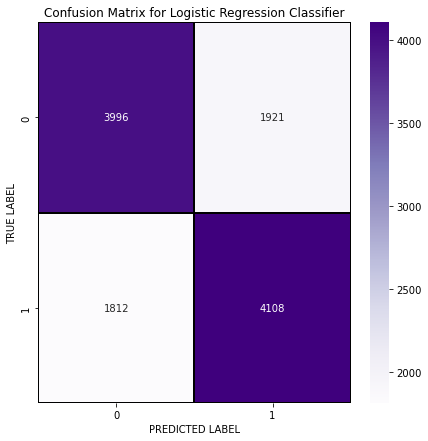

In [231]:
cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["0", "1"]
y_axis_labels = ["0","1"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

# 3.2)K Nearest Neighbourhood

In [232]:
from sklearn.neighbors import KNeighborsClassifier


In [233]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) > best_score:
        best_score = knn.score(x_train,y_train)
        best_Kvalue = i

print("""Best KNN Value of KNN Classifier: {}
Test Accuracy  of KNN Classifier: {}%""".format(best_Kvalue, round(best_score*100,2)))    

Best KNN Value of KNN Classifier: 1
Test Accuracy  of KNN Classifier: 100.0%


Classification report of KNN Classifier

In [234]:
y_pred_knn = knn.predict(x_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       0.99      0.87      0.93      5917
           1       0.89      0.99      0.94      5920

    accuracy                           0.93     11837
   macro avg       0.94      0.93      0.93     11837
weighted avg       0.94      0.93      0.93     11837



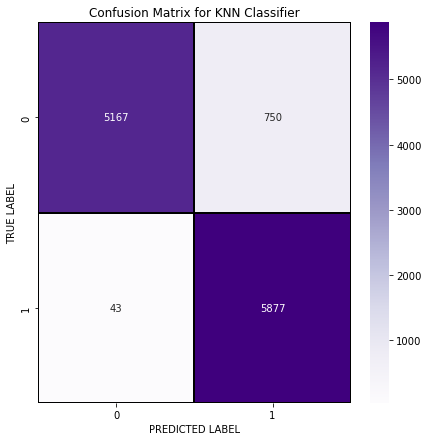

In [235]:
cm = confusion_matrix(y_test, y_pred_knn)
x_axis_labels = ["0","1"]
y_axis_labels = ["0", "1"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

# 3.3)Suport Vector Machine

# a)Linear SVM

In [236]:
from sklearn.svm import SVC


In [237]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [238]:
print("Test Accuracy of Linear svm Classifier: {}%".format(round(svm_linear.score(x_test, y_test)*100, 2)))

Test Accuracy of Linear svm Classifier: 68.39%


In [239]:
y_pred_ls =svm_linear.predict(x_test)
print("Linear svm  Classifier report: \n\n", classification_report(y_test, y_pred_ls))

Linear svm  Classifier report: 

               precision    recall  f1-score   support

           0       0.68      0.69      0.69      5917
           1       0.69      0.68      0.68      5920

    accuracy                           0.68     11837
   macro avg       0.68      0.68      0.68     11837
weighted avg       0.68      0.68      0.68     11837



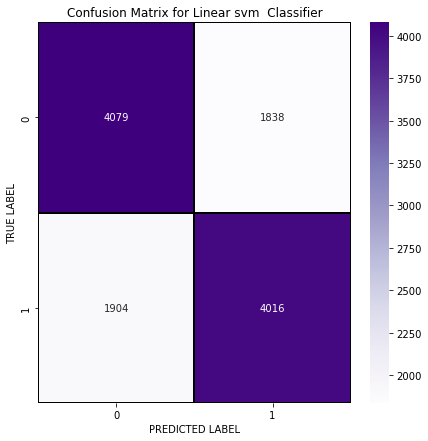

In [240]:
cm = confusion_matrix(y_test, y_pred_ls)
x_axis_labels = ["0", "1"]
y_axis_labels = ["0","1"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Linear svm  Classifier')
plt.show()

# b)Polynomial SVM

In [241]:
from sklearn.svm import SVC
svm_poly = SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [242]:
print("Test Accuracy of Polynomial SVM Classifier: {}%".format(round(svm_poly.score(x_test, y_test)*100, 2)))

Test Accuracy of Polynomial SVM Classifier: 83.27%


In [243]:
y_pred_ps =svm_poly.predict(x_test)
print("Polynomial SVM Classifier report: \n\n", classification_report(y_test, y_pred_ps))

Polynomial SVM Classifier report: 

               precision    recall  f1-score   support

           0       0.85      0.81      0.83      5917
           1       0.82      0.86      0.84      5920

    accuracy                           0.83     11837
   macro avg       0.83      0.83      0.83     11837
weighted avg       0.83      0.83      0.83     11837



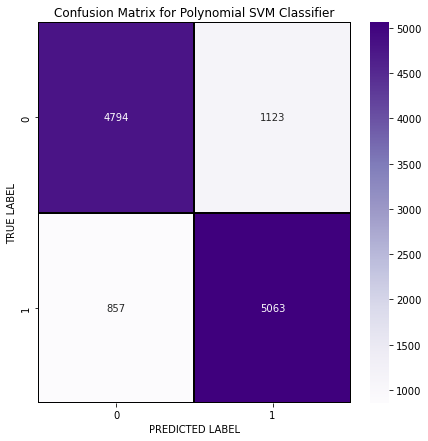

In [244]:
cm = confusion_matrix(y_test, y_pred_ps)
x_axis_labels = ["0", "1"]
y_axis_labels = ["0", "1"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Polynomial SVM Classifier')
plt.show()

# c)Radial SVM

In [245]:
from sklearn.svm import SVC


In [246]:
svm_radial = SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)

SVC()

In [247]:
print("Test Accuracy of Radial svm Classifier: {}%".format(round(svm_radial.score(x_test, y_test)*100, 2)))

Test Accuracy of Radial svm Classifier: 83.05%


In [248]:
y_pred_rs =svm_radial.predict(x_test)
print("Radial SVM Classifier report: \n\n", classification_report(y_test, y_pred_rs))

Radial SVM Classifier report: 

               precision    recall  f1-score   support

           0       0.85      0.81      0.83      5917
           1       0.82      0.85      0.83      5920

    accuracy                           0.83     11837
   macro avg       0.83      0.83      0.83     11837
weighted avg       0.83      0.83      0.83     11837



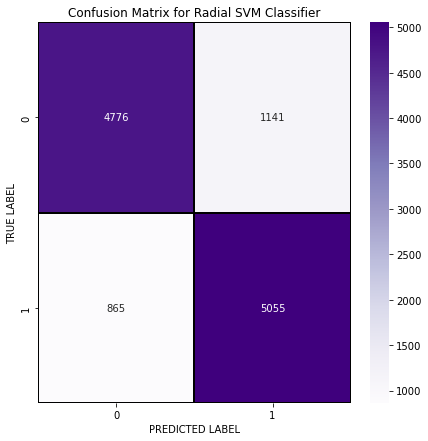

In [249]:
cm = confusion_matrix(y_test, y_pred_rs)
x_axis_labels = ["0", "1"]
y_axis_labels = ["0", "1"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Radial SVM Classifier')
plt.show()

# 3.4)Decision Tree Classifier

In [250]:
from sklearn.tree import DecisionTreeClassifier
dt_model =  DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [251]:
print("Test Accuracy of Decision tree Classifier: {}%".format(round(dt_model.score(x_test, y_test)*100, 2)))

Test Accuracy of Decision tree Classifier: 99.19%


In [252]:
y_pred_dt =dt_model.predict(x_test)
print(" Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))

 Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5917
           1       0.99      0.99      0.99      5920

    accuracy                           0.99     11837
   macro avg       0.99      0.99      0.99     11837
weighted avg       0.99      0.99      0.99     11837



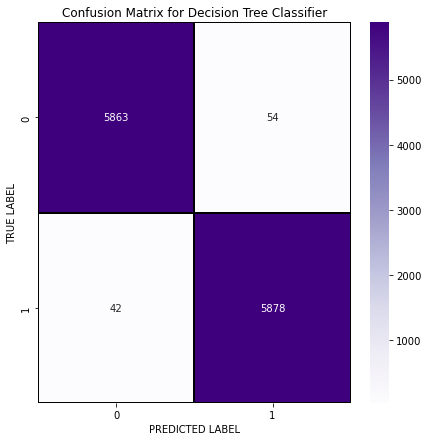

In [253]:
cm = confusion_matrix(y_test, y_pred_dt)
x_axis_labels = ["0", "1"]
y_axis_labels = ["0", "1"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [254]:
pd.DataFrame(index = x.columns, data = dt_model.feature_importances_, 
             columns=['Feature Importance']).sort_values('Feature Importance', ascending = False)

Feature Importance
Age                                 0.136007
MonthlyIncome                       0.079582
Income_YearsComp                    0.060739
DistanceFromHome                    0.054979
PercentSalaryHike                   0.047143
TotalSatisfaction_mean              0.045261
OverTime                            0.039847
EducationField                      0.037487
Employee Source                     0.035722
Stability                           0.035564
BusinessTravel                      0.034352
StockOptionLevel                    0.032407
Department                          0.031289
TotalWorkingYears                   0.030049
TrainingTimesLastYear               0.028045
Education                           0.027122
YearsInCurrentRole                  0.026435
JobRole                             0.026263
JobSatisfaction                     0.026081
YearsSinceLastPromotion             0.022088
EnvironmentSatisfaction             0.020204
YearsWithCurrManager                0.019325
YearsAtCompany                      0.017638
RelationshipSatisfaction            0.016823
MaritalStatus                       0.015987
Fidelity                            0.015941
WorkLifeBalance                     0.012990
JobInvolvement                      0.011016
JobLevel                            0.008069
NumCompaniesWorked                  0.004236
PerformanceRating                   0.001311

# 3.5)Random Forest Classifier

In [255]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [256]:
print("Test Accuracy of Random Forest Classifier: {}%".format(round(rfc.score(x_test, y_test)*100, 2)))

Test Accuracy of Random Forest Classifier: 99.73%


In [257]:
y_pred_rf = rfc.predict(x_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5917
           1       1.00      1.00      1.00      5920

    accuracy                           1.00     11837
   macro avg       1.00      1.00      1.00     11837
weighted avg       1.00      1.00      1.00     11837



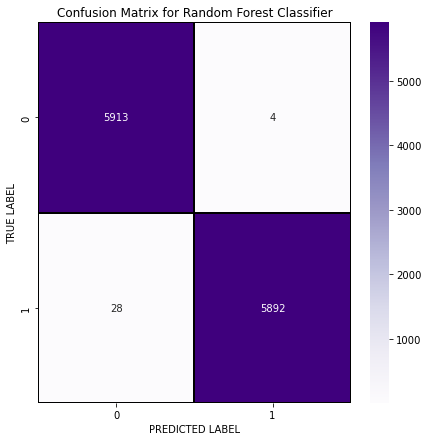

In [258]:
cm = confusion_matrix(y_test, y_pred_rf)
x_axis_labels = ["0", "1"]
y_axis_labels = ["0", "1"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [259]:
pd.DataFrame(index = x.columns, data = rfc.feature_importances_, 
             columns=['Feature Importance']).sort_values('Feature Importance', ascending = False)

Feature Importance
Age                                 0.110620
DistanceFromHome                    0.061003
MonthlyIncome                       0.060699
Income_YearsComp                    0.052251
TotalSatisfaction_mean              0.045173
TotalWorkingYears                   0.040012
Stability                           0.039947
PercentSalaryHike                   0.038351
OverTime                            0.034150
Employee Source                     0.030569
Education                           0.029806
StockOptionLevel                    0.029277
YearsWithCurrManager                0.029144
JobRole                             0.028864
YearsAtCompany                      0.028563
TrainingTimesLastYear               0.027515
YearsInCurrentRole                  0.026156
EnvironmentSatisfaction             0.026045
BusinessTravel                      0.025710
EducationField                      0.025524
YearsSinceLastPromotion             0.025054
JobSatisfaction                     0.023999
Fidelity                            0.023245
Department                          0.021681
RelationshipSatisfaction            0.021495
MaritalStatus                       0.019875
JobInvolvement                      0.017859
JobLevel                            0.017559
WorkLifeBalance                     0.017275
NumCompaniesWorked                  0.015943
PerformanceRating                   0.006636

# 3.6)Gradient Boosting Classifier

In [260]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [261]:
print("Test Accuracy of Gradient Boosting Classifier: {}%".format(round(gbc.score(x_test, y_test)*100, 2)))

Test Accuracy of Gradient Boosting Classifier: 84.77%


In [262]:
y_pred_gbc = gbc.predict(x_test)
print("Gradient Boosting Classifier report: \n\n", classification_report(y_test, y_pred_gbc))

Gradient Boosting Classifier report: 

               precision    recall  f1-score   support

           0       0.83      0.87      0.85      5917
           1       0.86      0.83      0.84      5920

    accuracy                           0.85     11837
   macro avg       0.85      0.85      0.85     11837
weighted avg       0.85      0.85      0.85     11837



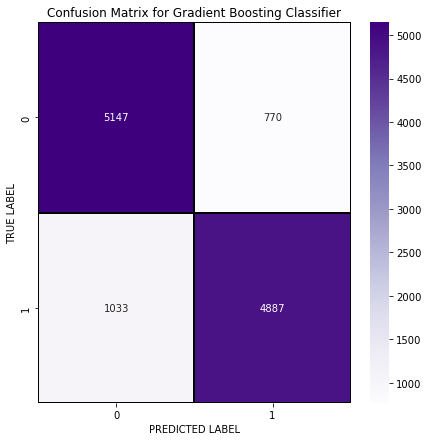

In [263]:
cm = confusion_matrix(y_test, y_pred_gbc)
x_axis_labels = ["0", "1"]
y_axis_labels = ["0", "1"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# 3.7)Extra Gradient Boosting Classifier

In [264]:
import xgboost as xgb

In [265]:
from xgboost import XGBClassifier

In [266]:
xgbc = XGBClassifier()
xgbc.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [267]:
print("Test Accuracy of Extra gradiant boosting Classifier: {}%".format(round(xgbc.score(x_test, y_test)*100, 2)))

Test Accuracy of Extra gradiant boosting Classifier: 99.81%


In [268]:
y_pred_eg = xgbc.predict(x_test)
print("Extra gradiant boosting Classifier report: \n\n", classification_report(y_test, y_pred_eg))

Extra gradiant boosting Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5917
           1       1.00      1.00      1.00      5920

    accuracy                           1.00     11837
   macro avg       1.00      1.00      1.00     11837
weighted avg       1.00      1.00      1.00     11837



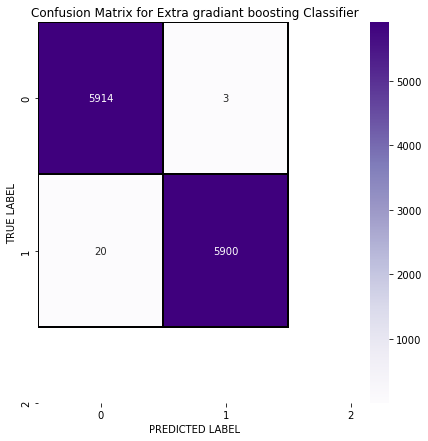

In [269]:
cm = confusion_matrix(y_test, y_pred_eg)
x_axis_labels = ["0", "1","2"]
y_axis_labels = ["0", "1","2"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Extra gradiant boosting Classifier')
plt.show()

# 3.8)Naive Bayes Classifier

In [270]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)

print("Test Accuracy of Naive Bayes Classification: {}%".format(round(nb.score(x_test, y_test)*100, 2)))

Test Accuracy of Naive Bayes Classification: 63.23%


In [271]:
y_pred_nb = nb.predict(x_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_nb))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.64      0.60      0.62      5917
           1       0.62      0.67      0.64      5920

    accuracy                           0.63     11837
   macro avg       0.63      0.63      0.63     11837
weighted avg       0.63      0.63      0.63     11837



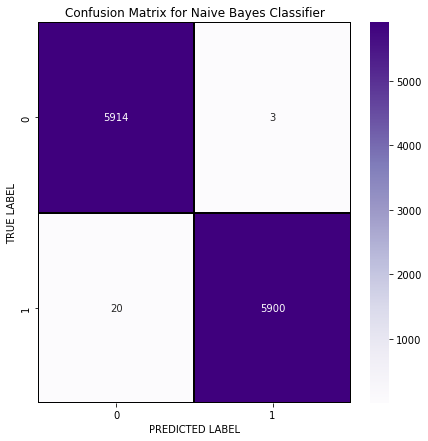

In [272]:
cm = confusion_matrix(y_test, y_pred_eg)
x_axis_labels = ["0", "1"]
y_axis_labels = ["0","1",]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

# Random forest regressor

In [273]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [274]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1000, num = 3)]
# Number of features to consider at every split
max_features = ['sqrt']
max_depth = []
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True],
 'max_depth': [None],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1],
 'min_samples_split': [2],
 'n_estimators': [500, 750, 1000]}


In [275]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [2],
                                        'n_estimators': [500, 750, 1000]},
                   random_state=42, verbose=2)

In [276]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [277]:
rf = RandomForestClassifier(random_state = 42,n_estimators= 750,max_features='sqrt')

In [278]:
model = rf.fit(x_train,y_train)
predictions = model.predict(x_test)
print("Test Accuracy of RandomForest regressor : {}%".format(round(rf.score(x_test, y_test)*100, 2)))


Test Accuracy of RandomForest regressor : 99.8%


In [279]:

print("Random Forest regressor report: \n\n", classification_report(y_test,predictions))

Random Forest regressor report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5917
           1       1.00      1.00      1.00      5920

    accuracy                           1.00     11837
   macro avg       1.00      1.00      1.00     11837
weighted avg       1.00      1.00      1.00     11837



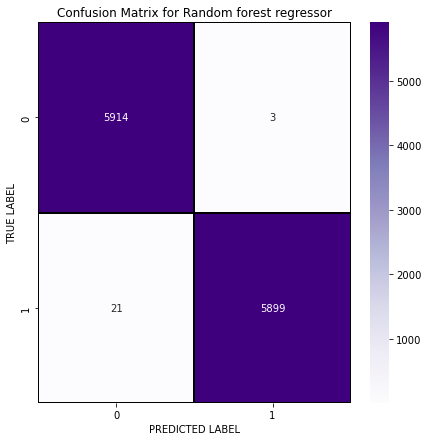

In [280]:
cm = confusion_matrix(y_test, predictions)
x_axis_labels = ["0", "1"]
y_axis_labels = ["0","1",]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random forest regressor')
plt.show()

In [281]:
pd.DataFrame(index = x.columns, data = rf.feature_importances_, 
             columns=['Feature Importance']).sort_values('Feature Importance', ascending = False)

Feature Importance
Age                                 0.107445
DistanceFromHome                    0.061429
MonthlyIncome                       0.061388
Income_YearsComp                    0.053230
TotalSatisfaction_mean              0.045877
TotalWorkingYears                   0.040775
PercentSalaryHike                   0.039489
Stability                           0.039327
OverTime                            0.033169
Employee Source                     0.031840
Education                           0.029534
StockOptionLevel                    0.028993
YearsWithCurrManager                0.028516
YearsAtCompany                      0.028420
JobRole                             0.027579
TrainingTimesLastYear               0.027142
YearsInCurrentRole                  0.026265
BusinessTravel                      0.025966
EnvironmentSatisfaction             0.025587
EducationField                      0.025561
YearsSinceLastPromotion             0.024999
JobSatisfaction                     0.023684
Fidelity                            0.023573
Department                          0.021802
RelationshipSatisfaction            0.021225
MaritalStatus                       0.019373
JobInvolvement                      0.018266
WorkLifeBalance                     0.017434
JobLevel                            0.017073
NumCompaniesWorked                  0.016218
PerformanceRating                   0.008819

In [282]:
pd.DataFrame(index = x.columns, data = rf.feature_importances_, 
             columns=['Feature Importance']).sort_values('Feature Importance', ascending = False)

Feature Importance
Age                                 0.107445
DistanceFromHome                    0.061429
MonthlyIncome                       0.061388
Income_YearsComp                    0.053230
TotalSatisfaction_mean              0.045877
TotalWorkingYears                   0.040775
PercentSalaryHike                   0.039489
Stability                           0.039327
OverTime                            0.033169
Employee Source                     0.031840
Education                           0.029534
StockOptionLevel                    0.028993
YearsWithCurrManager                0.028516
YearsAtCompany                      0.028420
JobRole                             0.027579
TrainingTimesLastYear               0.027142
YearsInCurrentRole                  0.026265
BusinessTravel                      0.025966
EnvironmentSatisfaction             0.025587
EducationField                      0.025561
YearsSinceLastPromotion             0.024999
JobSatisfaction                     0.023684
Fidelity                            0.023573
Department                          0.021802
RelationshipSatisfaction            0.021225
MaritalStatus                       0.019373
JobInvolvement                      0.018266
WorkLifeBalance                     0.017434
JobLevel                            0.017073
NumCompaniesWorked                  0.016218
PerformanceRating                   0.008819

In [283]:
pd.DataFrame(index = x.columns, data = dt_model.feature_importances_, 
             columns=['Feature Importance']).sort_values('Feature Importance', ascending = False)

Feature Importance
Age                                 0.136007
MonthlyIncome                       0.079582
Income_YearsComp                    0.060739
DistanceFromHome                    0.054979
PercentSalaryHike                   0.047143
TotalSatisfaction_mean              0.045261
OverTime                            0.039847
EducationField                      0.037487
Employee Source                     0.035722
Stability                           0.035564
BusinessTravel                      0.034352
StockOptionLevel                    0.032407
Department                          0.031289
TotalWorkingYears                   0.030049
TrainingTimesLastYear               0.028045
Education                           0.027122
YearsInCurrentRole                  0.026435
JobRole                             0.026263
JobSatisfaction                     0.026081
YearsSinceLastPromotion             0.022088
EnvironmentSatisfaction             0.020204
YearsWithCurrManager                0.019325
YearsAtCompany                      0.017638
RelationshipSatisfaction            0.016823
MaritalStatus                       0.015987
Fidelity                            0.015941
WorkLifeBalance                     0.012990
JobInvolvement                      0.011016
JobLevel                            0.008069
NumCompaniesWorked                  0.004236
PerformanceRating                   0.001311

In [284]:
models = pd.DataFrame({
    'Model' : ["K Nearest Neighbourhood","Linear SVM","Polynomial SVM","Radial SVM","Decision Tree Classifier", 'Random Forest Classifier', 
               "Gradient Boosting","Extra Gradient Boostig Classifier","Naive Bayes Classifier","Logistic Regression classifier"],

    'Score' : [best_score*100,svm_linear.score(x_test, y_test)*100,svm_poly.score(x_test, y_test)*100,svm_radial.score(x_test, y_test)*100,dt_model.score(x_test, y_test)*100,rfc.score(x_test,y_test)*100, 
               gbc.score(x_test,y_test)*100,xgbc.score(x_test,y_test)*100,nb.score(x_test, y_test)*100,logit_model.score(x_test, y_test)*100]
    })

models.sort_values(by = 'Score', ascending = False)

Model       Score
0            K Nearest Neighbourhood  100.000000
7  Extra Gradient Boostig Classifier   99.805694
5           Random Forest Classifier   99.729661
4           Decision Tree Classifier   99.188984
6                  Gradient Boosting   84.768100
2                     Polynomial SVM   83.272789
3                         Radial SVM   83.053138
9     Logistic Regression classifier   68.463293
1                         Linear SVM   68.387260
8             Naive Bayes Classifier   63.233928

In [285]:
import plotly.express as px
models = models.sort_values(by=['Score'])
px.bar(data_frame = models, x = 'Score', y = 'Model', orientation='h', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')

In [286]:
import pickle

In [287]:
pickle.dump(rfc, open('model.pkl', 'wb'))#Save the model

In [288]:
pickled_model = pickle.load(open('model.pkl', 'rb'))#load the model
pickled_model.predict(x_test)

array([1, 1, 0, ..., 1, 0, 1])